In [2]:
# import modules
%run -i '/nfs/see-fs-02_users/earlacoa/wrf-analysis/misc/modules_python3.py'
%matplotlib inline

### GBD2019

In [58]:
# COPD
# IHD
# stroke (ischemic and hemorrhagic)
# Diabetes mellitus type 2
# lower respiratory infections
# Tracheal, bronchus, and lung cancer

# LCC for mean and upper is 2.4 ugm-3, for lower is 5.8 ugm-3
lcc_mean = 2.4+0.1 # plus 0.1 so risk = 1.0 inclusive of lcc
lcc_lower = 5.8+0.1 # plus 0.1 so risk = 1.0 inclusive of lcc
lcc_upper = 2.4+0.1 # plus 0.1 so risk = 1.0 inclusive of lcc

In [56]:
df = pd.read_excel('/nfs/a68/earlacoa/health/GBD2019/GBD2019_TPM2.5.XLSX', header=2)
df.drop(df.index[[0]], inplace=True)
df.drop(df.columns[[2, 3]], axis=1, inplace=True)
df.rename(columns={'Unnamed: 0': 'cause'}, inplace=True)
df.rename(columns={'Unnamed: 1': 'pm25'}, inplace=True)
df.cause.unique()

array(['Lower respiratory infections',
       'Tracheal, bronchus, and lung cancer', 'Ischaemic heart disease',
       'Stroke', 'Chronic obstructive pulmonary disease',
       'Diabetes mellitus type 2'], dtype=object)

In [99]:
df_gbd2019_lri = df.loc[df['cause'] == 'Lower respiratory infections'].copy()
df_gbd2019_lri.drop(df_gbd2019_lri.columns[[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]], axis=1, inplace=True)
df_gbd2019_lri['pm25'] = df_gbd2019_lri['pm25'].str.extract('(\d+)').astype(float)
risks = df_gbd2019_lri['All ages'].str.split("\n", n=2, expand=True)
df_gbd2019_lri['mean'] = risks[0].astype(float)
risks = risks[1].str.split(" ", n=2, expand=True)
df_gbd2019_lri['lower'] = risks[0].str.extract('(\d+\.\d+)').astype(float)
df_gbd2019_lri['upper'] = risks[2].str.extract('(\d+\.\d+)').astype(float)
df_gbd2019_lri.drop(df_gbd2019_lri.columns[[0, 2]], axis=1, inplace=True)
df_gbd2019_lri

,pm25,mean,lower,upper
1,600.0,2.189,1.989,3.122
2,500.0,2.143,1.974,3.030
3,400.0,2.098,1.963,2.966
4,300.0,2.052,1.931,2.864
5,200.0,1.909,1.747,2.498
6,150.0,1.751,1.594,2.241
7,130.0,1.680,1.523,2.118
8,110.0,1.607,1.454,1.998
9,90.0,1.533,1.378,1.863
10,70.0,1.453,1.299,1.719


In [100]:
df_gbd2019_copd = df.loc[df['cause'] == 'Chronic obstructive pulmonary disease'].copy()
df_gbd2019_copd.drop(df_gbd2019_copd.columns[[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]], axis=1, inplace=True)
df_gbd2019_copd['pm25'] = df_gbd2019_copd['pm25'].str.extract('(\d+)').astype(float)
risks = df_gbd2019_copd['All ages'].str.split("\n", n=2, expand=True)
df_gbd2019_copd['mean'] = risks[0].astype(float)
risks = risks[1].str.split(" ", n=2, expand=True)
df_gbd2019_copd['lower'] = risks[0].str.extract('(\d+\.\d+)').astype(float)
df_gbd2019_copd['upper'] = risks[2].str.extract('(\d+\.\d+)').astype(float)
df_gbd2019_copd.drop(df_gbd2019_copd.columns[[0, 2]], axis=1, inplace=True)
df_gbd2019_copd

,pm25,mean,lower,upper
73,600.0,5.603,4.362,6.101
74,500.0,4.946,3.857,5.306
75,400.0,4.289,3.325,4.523
76,300.0,3.632,2.798,3.720
77,200.0,2.975,2.257,3.017
78,150.0,2.646,1.975,2.680
79,130.0,2.481,1.861,2.505
80,110.0,2.261,1.743,2.298
81,90.0,2.032,1.619,2.092
82,70.0,1.802,1.493,1.884


In [101]:
df_gbd2019_diab = df.loc[df['cause'] == 'Diabetes mellitus type 2'].copy()
df_gbd2019_diab.drop(df_gbd2019_diab.columns[[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]], axis=1, inplace=True)
df_gbd2019_diab['pm25'] = df_gbd2019_diab['pm25'].str.extract('(\d+)').astype(float)
risks = df_gbd2019_diab['All ages'].str.split("\n", n=2, expand=True)
df_gbd2019_diab['mean'] = risks[0].astype(float)
risks = risks[1].str.split(" ", n=2, expand=True)
df_gbd2019_diab['lower'] = risks[0].str.extract('(\d+\.\d+)').astype(float)
df_gbd2019_diab['upper'] = risks[2].str.extract('(\d+\.\d+)').astype(float)
df_gbd2019_diab.drop(df_gbd2019_diab.columns[[0, 2]], axis=1, inplace=True)
df_gbd2019_diab

,pm25,mean,lower,upper
91,600.0,1.577,1.321,2.134
92,500.0,1.577,1.321,2.016
93,400.0,1.577,1.321,1.897
94,300.0,1.577,1.321,1.788
95,200.0,1.577,1.320,1.686
96,150.0,1.577,1.314,1.633
97,130.0,1.577,1.314,1.614
98,110.0,1.577,1.314,1.604
99,90.0,1.577,1.314,1.593
100,70.0,1.576,1.313,1.579


In [102]:
df_gbd2019_lc = df.loc[df['cause'] == 'Tracheal, bronchus, and lung cancer'].copy()
df_gbd2019_lc.drop(df_gbd2019_lc.columns[[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]], axis=1, inplace=True)
df_gbd2019_lc['pm25'] = df_gbd2019_lc['pm25'].str.extract('(\d+)').astype(float)
risks = df_gbd2019_lc['All ages'].str.split("\n", n=2, expand=True)
df_gbd2019_lc['mean'] = risks[0].astype(float)
risks = risks[1].str.split(" ", n=2, expand=True)
df_gbd2019_lc['lower'] = risks[0].str.extract('(\d+\.\d+)').astype(float)
df_gbd2019_lc['upper'] = risks[2].str.extract('(\d+\.\d+)').astype(float)
df_gbd2019_lc.drop(df_gbd2019_lc.columns[[0, 2]], axis=1, inplace=True)
df_gbd2019_lc

,pm25,mean,lower,upper
19,600.0,1.574,1.451,2.421
20,500.0,1.574,1.451,2.275
21,400.0,1.574,1.449,2.114
22,300.0,1.574,1.445,1.961
23,200.0,1.574,1.435,1.869
24,150.0,1.574,1.422,1.842
25,130.0,1.574,1.418,1.834
26,110.0,1.560,1.411,1.811
27,90.0,1.527,1.400,1.767
28,70.0,1.482,1.369,1.692


In [185]:
df_gbd2019_str = df.loc[df['cause'] == 'Stroke'].copy()
df_gbd2019_str.drop(df_gbd2019_str.columns[[2]], axis=1, inplace=True)
df_gbd2019_str['pm25'] = df_gbd2019_str['pm25'].str.extract('(\d+)').astype(float)
ages = list(df_gbd2019_str.columns[2:])
for age in ages:
    risks = df_gbd2019_str[age].str.split("\n", n=2, expand=True)
    df_gbd2019_str[f'mean_{age}'] = risks[0].astype(float)
    risks = risks[1].str.split(" ", n=2, expand=True)
    df_gbd2019_str[f'lower_{age}'] = risks[0].str.extract('(\d+\.\d+)').astype(float)
    df_gbd2019_str[f'upper_{age}'] = risks[2].str.extract('(\d+\.\d+)').astype(float)
    

df_gbd2019_str.drop(df_gbd2019_str.columns[[0, 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]], axis=1, inplace=True)
df_gbd2019_str.columns = ['pm25', 'mean_25_29', 'lower_25_29', 'upper_25_29', 'mean_30_34', 'lower_30_34', 'upper_30_34', 'mean_35_39', 'lower_35_39', 'upper_35_39', 'mean_40_44', 'lower_40_44', 'upper_40_44', 'mean_45_49', 'lower_45_49', 'upper_45_49', 'mean_50_54', 'lower_50_54', 'upper_50_54', 'mean_55_59', 'lower_55_59', 'upper_55_59', 'mean_60_64', 'lower_60_64', 'upper_60_64', 'mean_65_69', 'lower_65_69', 'upper_65_69', 'mean_70_74', 'lower_70_74', 'upper_70_74', 'mean_75_79', 'lower_75_79', 'upper_75_79', 'mean_80_84', 'lower_80_84', 'upper_80_84', 'mean_85_89', 'lower_85_89', 'upper_85_89', 'mean_90_94', 'lower_90_94', 'upper_90_94', 'mean_95up', 'lower_95up', 'upper_95up']
df_gbd2019_str

,pm25,mean_25_29,lower_25_29,upper_25_29,mean_30_34,lower_30_34,upper_30_34,mean_35_39,lower_35_39,upper_35_39,...,upper_80_84,mean_85_89,lower_85_89,upper_85_89,mean_90_94,lower_90_94,upper_90_94,mean_95up,lower_95up,upper_95up
55,600.0,3.612,2.651,4.682,3.135,2.521,4.377,3.237,2.334,4.015,...,2.338,1.419,1.354,2.112,1.845,1.283,1.939,1.540,1.209,1.710
56,500.0,3.612,2.645,4.530,3.091,2.517,4.221,3.237,2.330,3.886,...,2.177,1.419,1.352,1.984,1.733,1.283,1.819,1.477,1.209,1.617
57,400.0,3.612,2.633,4.427,3.047,2.517,4.083,3.237,2.330,3.776,...,2.022,1.419,1.352,1.850,1.622,1.279,1.708,1.414,1.208,1.523
58,300.0,3.612,2.612,4.325,3.004,2.517,4.018,3.237,2.324,3.672,...,1.873,1.419,1.352,1.705,1.510,1.277,1.591,1.351,1.207,1.434
59,200.0,3.612,2.602,4.252,2.960,2.514,3.953,3.237,2.290,3.588,...,1.731,1.419,1.348,1.588,1.399,1.271,1.476,1.288,1.201,1.349
60,150.0,3.612,2.600,4.216,2.938,2.499,3.911,3.237,2.283,3.577,...,1.684,1.419,1.341,1.545,1.343,1.265,1.433,1.256,1.195,1.312
61,130.0,3.612,2.585,4.216,2.929,2.495,3.904,3.237,2.283,3.567,...,1.675,1.419,1.334,1.531,1.321,1.260,1.416,1.244,1.192,1.299
62,110.0,3.612,2.575,4.206,2.920,2.495,3.904,3.237,2.276,3.564,...,1.666,1.419,1.327,1.523,1.299,1.254,1.408,1.231,1.189,1.289
63,90.0,3.598,2.539,4.141,2.867,2.469,3.842,3.237,2.273,3.525,...,1.663,1.419,1.316,1.515,1.276,1.245,1.398,1.219,1.180,1.281
64,70.0,3.324,2.396,3.827,2.596,2.309,3.501,3.158,2.148,3.258,...,1.607,1.368,1.295,1.482,1.254,1.233,1.375,1.206,1.167,1.268


In [186]:
df_gbd2019_ihd = df.loc[df['cause'] == 'Ischaemic heart disease'].copy()
df_gbd2019_ihd.drop(df_gbd2019_ihd.columns[[2]], axis=1, inplace=True)
df_gbd2019_ihd['pm25'] = df_gbd2019_ihd['pm25'].str.extract('(\d+)').astype(float)
ages = list(df_gbd2019_ihd.columns[2:])
for age in ages:
    risks = df_gbd2019_ihd[age].str.split("\n", n=2, expand=True)
    df_gbd2019_ihd[f'mean_{age}'] = risks[0].astype(float)
    risks = risks[1].str.split(" ", n=2, expand=True)
    df_gbd2019_ihd[f'lower_{age}'] = risks[0].str.extract('(\d+\.\d+)').astype(float)
    df_gbd2019_ihd[f'upper_{age}'] = risks[2].str.extract('(\d+\.\d+)').astype(float)
    

df_gbd2019_ihd.drop(df_gbd2019_ihd.columns[[0, 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]], axis=1, inplace=True)
df_gbd2019_ihd.columns = ['pm25', 'mean_25_29', 'lower_25_29', 'upper_25_29', 'mean_30_34', 'lower_30_34', 'upper_30_34', 'mean_35_39', 'lower_35_39', 'upper_35_39', 'mean_40_44', 'lower_40_44', 'upper_40_44', 'mean_45_49', 'lower_45_49', 'upper_45_49', 'mean_50_54', 'lower_50_54', 'upper_50_54', 'mean_55_59', 'lower_55_59', 'upper_55_59', 'mean_60_64', 'lower_60_64', 'upper_60_64', 'mean_65_69', 'lower_65_69', 'upper_65_69', 'mean_70_74', 'lower_70_74', 'upper_70_74', 'mean_75_79', 'lower_75_79', 'upper_75_79', 'mean_80_84', 'lower_80_84', 'upper_80_84', 'mean_85_89', 'lower_85_89', 'upper_85_89', 'mean_90_94', 'lower_90_94', 'upper_90_94', 'mean_95up', 'lower_95up', 'upper_95up']
df_gbd2019_ihd

,pm25,mean_25_29,lower_25_29,upper_25_29,mean_30_34,lower_30_34,upper_30_34,mean_35_39,lower_35_39,upper_35_39,...,upper_80_84,mean_85_89,lower_85_89,upper_85_89,mean_90_94,lower_90_94,upper_90_94,mean_95up,lower_95up,upper_95up
37,600.0,3.180,2.200,3.830,2.104,2.038,3.626,2.189,1.979,3.379,...,2.128,1.531,1.252,2.028,1.640,1.193,1.790,1.314,1.144,1.561
38,500.0,3.032,2.200,3.677,2.069,2.038,3.497,2.189,1.972,3.234,...,1.983,1.492,1.252,1.894,1.564,1.192,1.685,1.279,1.144,1.493
39,400.0,2.884,2.187,3.550,2.035,2.030,3.346,2.189,1.969,3.091,...,1.834,1.453,1.252,1.758,1.488,1.192,1.584,1.244,1.144,1.422
40,300.0,2.736,2.156,3.395,2.000,2.020,3.213,2.189,1.960,2.985,...,1.704,1.414,1.251,1.623,1.413,1.192,1.480,1.210,1.144,1.348
41,200.0,2.588,2.139,3.325,1.966,2.011,3.134,2.189,1.937,2.897,...,1.568,1.375,1.246,1.492,1.337,1.192,1.380,1.175,1.144,1.274
42,150.0,2.514,2.134,3.276,1.949,2.011,3.095,2.189,1.933,2.866,...,1.521,1.355,1.246,1.437,1.299,1.192,1.337,1.157,1.144,1.246
43,130.0,2.485,2.132,3.262,1.942,2.004,3.079,2.189,1.930,2.864,...,1.509,1.347,1.243,1.422,1.284,1.192,1.324,1.150,1.143,1.237
44,110.0,2.455,2.116,3.253,1.935,1.999,3.068,2.189,1.930,2.860,...,1.500,1.340,1.239,1.408,1.269,1.190,1.316,1.143,1.142,1.228
45,90.0,2.411,2.110,3.237,1.919,1.994,3.026,2.127,1.920,2.819,...,1.488,1.325,1.236,1.396,1.251,1.186,1.306,1.136,1.138,1.220
46,70.0,2.217,2.012,3.070,1.782,1.944,2.885,1.976,1.850,2.673,...,1.459,1.291,1.219,1.370,1.218,1.172,1.285,1.124,1.129,1.207


In [105]:
# functions

# linear
def regression_linear(x, a, b):
    return (a * x) + b

# linear (coefficient as linear, x is raised to a power)
def regression_linear_x_power(x, a, b, c, d):
    y = (a * ((x - d + 0j)**b)) + c
    # include + 0j to allow for negative numbers to be raised by fractional power
    return np.real(y) # take only the real part of the complex number
    # to unbound use bounds of -np.inf and no.inf 
    # a = unbound
    # b = unbound
    # c = 1
    # d = minux LCC
    
# linear (coefficient as linear, x is raised to a power, with an extra x)
def regression_linear_x_power_with_x(x, a, b, c, d, e):
    y = (a * ((x-d + 0j)**e)) + (b * x) + c
    # include + 0j to allow for negative numbers to be raised by fractional power
    return np.real(y) # take only the real part of the complex number
    # to unbound use bounds of -np.inf and no.inf 
    # a = unbound
    # b = unbound
    # c = 1
    # d = minux LCC
    # e = unbound
    
# piecewise linear
# y = ax + b(x>c)

# nonlinear - exponential
def regression_nonlinear_exp(x, a, b, c, d):
    return a - b * np.exp(c * (x - d))**2
    # a = max risk
    # a - b = 1
    # c bigger is more linear, smaller is more non-linear, always negative
    # d = minux LCC
    
# IER
# Burnet et al., (2014)
def regression_nonlinear_ier(x, a, b, c, d):
    y = 1 + a * (1 - np.exp(-b * (x - d + 0j)**c))
    # include + 0j to allow for negative numbers to be raised by fractional power
    return np.real(y) # take only the real part of the complex number
    # to unbound use bounds of -np.inf and no.inf 
    # a = max risk - 1
    # b = ratio of the RR at low-to-high exposures
    # c = to predict risk over a very large range of concentrations
    # d = lcc
    # c bigger is more linear, smaller is more non-linear

# GEMM
# Burnett et al., (2018) PNAS
# partial - 15 cohort
def regression_nonlinear_gemm_15(x, theta, f, w, mu, tau, r):
    f = np.log(x + 1)
    w = 1 / (1 + np.exp(-1 * (x - mu)/(tau * r)))
    rr = np.exp(theta * f * w)
    return rr
    # x is the pm2.5 concentration i.e. the predictor variable
    # rr is relative risk
    # w is a logistic weighting function
    # mu is the shape of c
    # tau is the curvature in c
    # r is the range in pollutant concentrations. bounds = 

# GEMM
# Burnett et al., (2018) PNAS
# full - 41 cohorts
def regression_nonlinear_gemm(x, theta, f, w, mu, tau, r, alpha):
    f = np.log(1 + x / alpha)
    w = 1 / (1 + np.exp(-1 * (x - mu)/(tau * r)))
    rr = np.exp(theta * f * w)
    return rr
    # x is the pm2.5 concentration i.e. the predictor variable
    # rr is relative risk
    # w is a logistic weighting function
    # mu is the shape of c
    # tau is the curvature in c. bounds = 0.1-0.6
    # r is the range in pollutant concentrations. bounds = 
    # alpha controls the curvative in rr, with less curvature for larger rr. bounds = 1-9    

In [112]:
from scipy.optimize import curve_fit

<ipython-input-105-18266b3fcd1a>:44: RuntimeWarning: overflow encountered in exp
  y = 1 + a * (1 - np.exp(-b * (x - d + 0j)**c))
<ipython-input-105-18266b3fcd1a>:44: RuntimeWarning: invalid value encountered in multiply
  y = 1 + a * (1 - np.exp(-b * (x - d + 0j)**c))
<ipython-input-105-18266b3fcd1a>:44: RuntimeWarning: overflow encountered in exp
  y = 1 + a * (1 - np.exp(-b * (x - d + 0j)**c))
<ipython-input-105-18266b3fcd1a>:44: RuntimeWarning: invalid value encountered in multiply
  y = 1 + a * (1 - np.exp(-b * (x - d + 0j)**c))


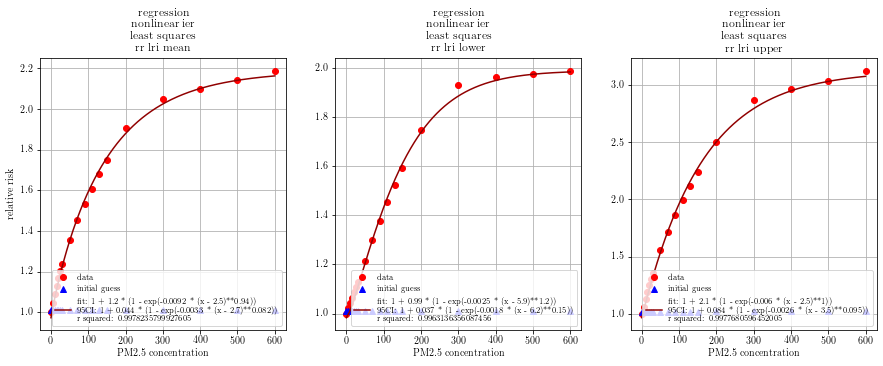

In [113]:
# regression_nonlinear_ier

pm25 = df_gbd2019_lri['pm25'].values
pm25_0p1 = np.linspace(min(pm25), max(pm25), 6000) # max PM2.5 risk level = 600 ugm-3, at 0.1 ugm-3 spacing = 6000 points

fig1 = plt.figure(1, figsize=(15,5))

rr_lri_mean = df_gbd2019_lri['mean'].values
initialGuess = [np.nanmax(rr_lri_mean)-1, 0.01, 0.01, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_lri_mean, initialGuess,
                      bounds=((np.nanmax(rr_lri_mean)-1.0000000001, -np.inf, -np.inf, lcc_mean-0.0000000001),
                              (np.nanmax(rr_lri_mean)-1, np.inf, np.inf, lcc_mean)))
residuals = rr_lri_mean - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_lri_mean - np.mean(rr_lri_mean))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_lri_mean_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
ax=fig1.add_subplot(1,3,1)
ax.plot(pm25, rr_lri_mean, linestyle='', marker='o', color='r', label="data")
ax.plot(pm25, guess, linestyle='', marker='^', color='b', label="initial guess")
ax.plot(pm25_0p1, rr_lri_mean_0p1, linestyle='-', color='#900000', label="fit: 1 + {0:0.2g} * (1 - exp(-{1:0.2g} * (x - {3:0.2g})**{2:0.2g}))".format(*popt) + "\n95CI: 1 + {0:0.2g} * (1 - exp(-{1:0.2g} * (x - {3:0.2g})**{2:0.2g}))".format(*p_two_sd) + "\nr squared: " + str(r_squared))
ax.set_ylabel("relative risk")
ax.set_xlabel("PM2.5 concentration")
ax.legend(loc='best', fontsize=8)
ax.grid()
ax.set_title("regression\nnonlinear ier\nleast squares\nrr lri mean")

rr_lri_lower = df_gbd2019_lri['lower'].values
initialGuess = [np.nanmax(rr_lri_lower)-1, 0.01, 0.01, lcc_lower] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_lri_lower, initialGuess,
                      bounds=((np.nanmax(rr_lri_lower)-1.0000000001, -np.inf, -np.inf, lcc_lower-0.0000000001),
                              (np.nanmax(rr_lri_lower)-1, np.inf, np.inf, lcc_lower)))
residuals = rr_lri_lower - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_lri_lower - np.mean(rr_lri_lower))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_lri_lower_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
ax=fig1.add_subplot(1,3,2)
ax.plot(pm25, rr_lri_lower, linestyle='', marker='o', color='r', label="data")
ax.plot(pm25, guess, linestyle='', marker='^', color='b', label="initial guess")
ax.plot(pm25_0p1, rr_lri_lower_0p1, linestyle='-', color='#900000', label="fit: 1 + {0:0.2g} * (1 - exp(-{1:0.2g} * (x - {3:0.2g})**{2:0.2g}))".format(*popt) + "\n95CI: 1 + {0:0.2g} * (1 - exp(-{1:0.2g} * (x - {3:0.2g})**{2:0.2g}))".format(*p_two_sd) + "\nr squared: " + str(r_squared))
ax.set_xlabel("PM2.5 concentration")
ax.legend(loc='best', fontsize=8)
ax.grid()
ax.set_title("regression\nnonlinear ier\nleast squares\nrr lri lower")

rr_lri_upper = df_gbd2019_lri['upper'].values
initialGuess = [np.nanmax(rr_lri_upper)-1, 0.01, 0.01, lcc_upper] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_lri_upper, initialGuess,
                      bounds=((np.nanmax(rr_lri_upper)-1.0000000001, -np.inf, -np.inf, lcc_upper-0.0000000001),
                              (np.nanmax(rr_lri_upper)-1, np.inf, np.inf, lcc_upper)))
residuals = rr_lri_upper - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_lri_upper - np.mean(rr_lri_upper))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_lri_upper_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
ax=fig1.add_subplot(1,3,3)
ax.plot(pm25, rr_lri_upper, linestyle='', marker='o', color='r', label="data")
ax.plot(pm25, guess, linestyle='', marker='^', color='b', label="initial guess")
ax.plot(pm25_0p1, rr_lri_upper_0p1, linestyle='-', color='#900000', label="fit: 1 + {0:0.2g} * (1 - exp(-{1:0.2g} * (x - {3:0.2g})**{2:0.2g}))".format(*popt) + "\n95CI: 1 + {0:0.2g} * (1 - exp(-{1:0.2g} * (x - {3:0.2g})**{2:0.2g}))".format(*p_two_sd) + "\nr squared: " + str(r_squared))
ax.set_xlabel("PM2.5 concentration")
ax.legend(loc='best', fontsize=8)
ax.grid()
ax.set_title("regression\nnonlinear ier\nleast squares\nrr lri upper")
plt.show()

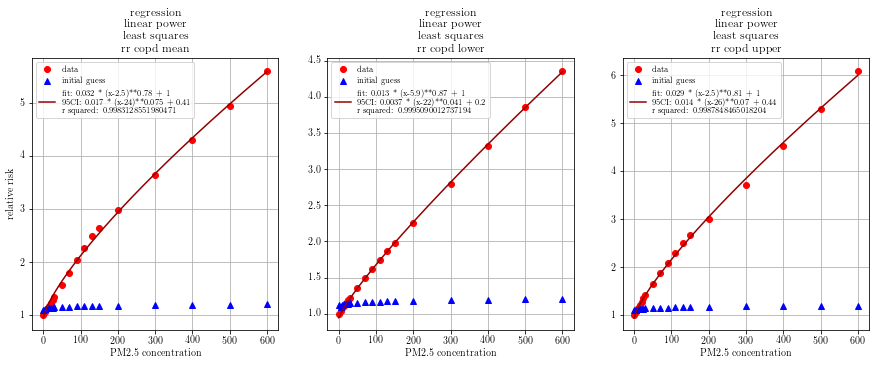

In [117]:
# regression_linear_x_power

pm25 = df_gbd2019_copd['pm25'].values
pm25_0p1 = np.linspace(min(pm25), max(pm25), 6000) # max PM2.5 risk level = 600 ugm-3, at 0.1 ugm-3 spacing = 6000 points

fig1 = plt.figure(1, figsize=(15,5))

rr_copd_mean = df_gbd2019_copd['mean'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_mean] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_copd_mean, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_mean-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_mean))) # use -np.inf and np.inf to not bound certain parameters
rr_copd_mean_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_copd_mean - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_copd_mean - np.mean(rr_copd_mean))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
ax=fig1.add_subplot(1,3,1)
ax.plot(pm25, rr_copd_mean, linestyle='', marker='o', color='r', label="data")
ax.plot(pm25, guess, linestyle='', marker='^', color='b', label="initial guess")
ax.plot(pm25_0p1, rr_copd_mean_0p1, linestyle='-', color='#900000', label="fit: {0:0.2g} * (x-{3:0.2g})**{1:0.2g} + {2:0.2g}".format(*popt) + "\n95CI: {0:0.2g} * (x-{3:0.2g})**{1:0.2g} + {2:0.2g}".format(*p_two_sd) + "\nr squared: " + str(r_squared))
ax.set_ylabel("relative risk")
ax.set_xlabel("PM2.5 concentration")
ax.grid()
ax.set_title("regression\nlinear power\nleast squares\nrr copd mean")
ax.legend(loc='best', fontsize=8)

rr_copd_lower = df_gbd2019_copd['lower'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_lower] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_copd_lower, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_lower-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_lower))) # use -np.inf and np.inf to not bound certain parameters
rr_copd_lower_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_copd_lower - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_copd_lower - np.mean(rr_copd_lower))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
ax=fig1.add_subplot(1,3,2)
ax.plot(pm25, rr_copd_lower, linestyle='', marker='o', color='r', label="data")
ax.plot(pm25, guess, linestyle='', marker='^', color='b', label="initial guess")
ax.plot(pm25_0p1, rr_copd_lower_0p1, linestyle='-', color='#900000',label="fit: {0:0.2g} * (x-{3:0.2g})**{1:0.2g} + {2:0.2g}".format(*popt) + "\n95CI: {0:0.2g} * (x-{3:0.2g})**{1:0.2g} + {2:0.2g}".format(*p_two_sd) + "\nr squared: " + str(r_squared))
ax.set_xlabel("PM2.5 concentration")
ax.grid()
ax.set_title("regression\nlinear power\nleast squares\nrr copd lower")
ax.legend(loc='best', fontsize=8)

rr_copd_upper = df_gbd2019_copd['upper'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_upper] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_copd_upper, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_upper-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_upper))) # use -np.inf and np.inf to not bound certain parameters
rr_copd_upper_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_copd_upper - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_copd_upper - np.mean(rr_copd_upper))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
ax=fig1.add_subplot(1,3,3)
ax.plot(pm25, rr_copd_upper, linestyle='', marker='o', color='r', label="data")
ax.plot(pm25, guess, linestyle='', marker='^', color='b', label="initial guess")
ax.plot(pm25_0p1, rr_copd_upper_0p1, linestyle='-', color='#900000', label="fit: {0:0.2g} * (x-{3:0.2g})**{1:0.2g} + {2:0.2g}".format(*popt) + "\n95CI: {0:0.2g} * (x-{3:0.2g})**{1:0.2g} + {2:0.2g}".format(*p_two_sd) + "\nr squared: " + str(r_squared))
ax.set_xlabel("PM2.5 concentration")
ax.grid()
ax.set_title("regression\nlinear power\nleast squares\nrr copd upper")
ax.legend(loc='best', fontsize=8)

plt.show()

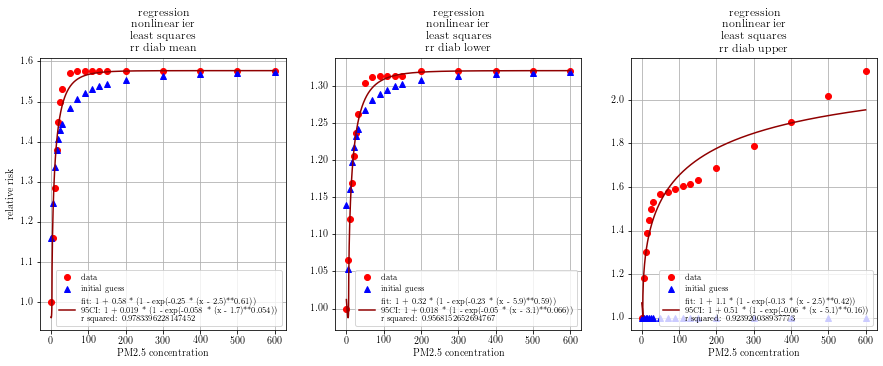

In [161]:
# regression_nonlinear_ier

pm25 = df_gbd2019_diab['pm25'].values
pm25_0p1 = np.linspace(min(pm25), max(pm25), 6000) # max PM2.5 risk level = 600 ugm-3, at 0.1 ugm-3 spacing = 6000 points

fig1 = plt.figure(1, figsize=(15,5))

rr_diab_mean = df_gbd2019_diab['mean'].values
initialGuess = [np.nanmax(rr_diab_mean)-1, 0.39, 0.4, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_diab_mean, initialGuess,
                      bounds=((np.nanmax(rr_diab_mean)-1.0000000001, 0.2, 0.4, lcc_mean-0.0000000001),
                              (np.nanmax(rr_diab_mean)-1, 0.4, 0.8, lcc_mean)))
residuals = rr_diab_mean - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_diab_mean - np.mean(rr_diab_mean))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_diab_mean_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
ax=fig1.add_subplot(1,3,1)
ax.plot(pm25, rr_diab_mean, linestyle='', marker='o', color='r', label="data")
ax.plot(pm25, guess, linestyle='', marker='^', color='b', label="initial guess")
ax.plot(pm25_0p1, rr_diab_mean_0p1, linestyle='-', color='#900000', label="fit: 1 + {0:0.2g} * (1 - exp(-{1:0.2g} * (x - {3:0.2g})**{2:0.2g}))".format(*popt) + "\n95CI: 1 + {0:0.2g} * (1 - exp(-{1:0.2g} * (x - {3:0.2g})**{2:0.2g}))".format(*p_two_sd) + "\nr squared: " + str(r_squared))
ax.set_ylabel("relative risk")
ax.set_xlabel("PM2.5 concentration")
ax.legend(loc='best', fontsize=8)
ax.grid()
ax.set_title("regression\nnonlinear ier\nleast squares\nrr diab mean")

rr_diab_lower = df_gbd2019_diab['lower'].values
initialGuess = [np.nanmax(rr_diab_lower)-1, 0.395, 0.4, lcc_lower] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_diab_lower, initialGuess, 
                      bounds=((np.nanmax(rr_diab_lower)-1.0000000001, 0.2, 0.4, lcc_lower-0.0000000001),
                              (np.nanmax(rr_diab_lower)-1, 0.4, 0.8, lcc_lower)))
residuals = rr_diab_lower - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_diab_lower - np.mean(rr_diab_lower))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_diab_lower_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
ax=fig1.add_subplot(1,3,2)
ax.plot(pm25, rr_diab_lower, linestyle='', marker='o', color='r', label="data")
ax.plot(pm25, guess, linestyle='', marker='^', color='b', label="initial guess")
ax.plot(pm25_0p1, rr_diab_lower_0p1, linestyle='-', color='#900000', label="fit: 1 + {0:0.2g} * (1 - exp(-{1:0.2g} * (x - {3:0.2g})**{2:0.2g}))".format(*popt) + "\n95CI: 1 + {0:0.2g} * (1 - exp(-{1:0.2g} * (x - {3:0.2g})**{2:0.2g}))".format(*p_two_sd) + "\nr squared: " + str(r_squared))
ax.set_xlabel("PM2.5 concentration")
ax.legend(loc='best', fontsize=8)
ax.grid()
ax.set_title("regression\nnonlinear ier\nleast squares\nrr diab lower")

rr_diab_upper = df_gbd2019_diab['upper'].values
initialGuess = [np.nanmax(rr_diab_upper)-1, 0., 0, lcc_upper] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_diab_upper, initialGuess, 
                      bounds=((np.nanmax(rr_diab_upper)-1.0000000001, -np.inf, -np.inf, lcc_upper-0.0000000001),
                              (np.nanmax(rr_diab_upper)-1, np.inf, np.inf, lcc_upper)))
residuals = rr_diab_upper - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_diab_upper - np.mean(rr_diab_upper))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_diab_upper_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
ax=fig1.add_subplot(1,3,3)
ax.plot(pm25, rr_diab_upper, linestyle='', marker='o', color='r', label="data")
ax.plot(pm25, guess, linestyle='', marker='^', color='b', label="initial guess")
ax.plot(pm25_0p1, rr_diab_upper_0p1, linestyle='-', color='#900000', label="fit: 1 + {0:0.2g} * (1 - exp(-{1:0.2g} * (x - {3:0.2g})**{2:0.2g}))".format(*popt) + "\n95CI: 1 + {0:0.2g} * (1 - exp(-{1:0.2g} * (x - {3:0.2g})**{2:0.2g}))".format(*p_two_sd) + "\nr squared: " + str(r_squared))
ax.set_xlabel("PM2.5 concentration")
ax.legend(loc='best', fontsize=8)
ax.grid()
ax.set_title("regression\nnonlinear ier\nleast squares\nrr diab upper")
plt.show()

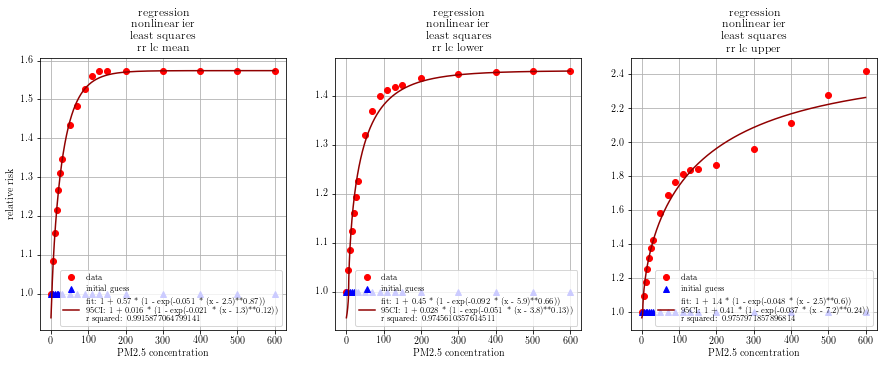

In [213]:
# regression_nonlinear_ier

pm25 = df_gbd2019_lc['pm25'].values
pm25_0p1 = np.linspace(min(pm25), max(pm25), 6000) # max PM2.5 risk level = 600 ugm-3, at 0.1 ugm-3 spacing = 6000 points

fig1 = plt.figure(1, figsize=(15,5))

rr_lc_mean = df_gbd2019_lc['mean'].values
initialGuess = [np.nanmax(rr_lc_mean)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_lc_mean, initialGuess,
                      bounds=((np.nanmax(rr_lc_mean)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_lc_mean)-1, 3, 3, lcc_mean)))
residuals = rr_lc_mean - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_lc_mean - np.mean(rr_lc_mean))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_lc_mean_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
ax=fig1.add_subplot(1,3,1)
ax.plot(pm25, rr_lc_mean, linestyle='', marker='o', color='r', label="data")
ax.plot(pm25, guess, linestyle='', marker='^', color='b', label="initial guess")
ax.plot(pm25_0p1, rr_lc_mean_0p1, linestyle='-', color='#900000', label="fit: 1 + {0:0.2g} * (1 - exp(-{1:0.2g} * (x - {3:0.2g})**{2:0.2g}))".format(*popt) + "\n95CI: 1 + {0:0.2g} * (1 - exp(-{1:0.2g} * (x - {3:0.2g})**{2:0.2g}))".format(*p_two_sd) + "\nr squared: " + str(r_squared))
ax.set_ylabel("relative risk")
ax.set_xlabel("PM2.5 concentration")
ax.legend(loc='best', fontsize=8)
ax.grid()
ax.set_title("regression\nnonlinear ier\nleast squares\nrr lc mean")

rr_lc_lower = df_gbd2019_lc['lower'].values
initialGuess = [np.nanmax(rr_lc_lower)-1, 0, 0, lcc_lower] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_lc_lower, initialGuess, 
                      bounds=((np.nanmax(rr_lc_lower)-1.0000000001, 0, 0, lcc_lower-0.0000000001),
                              (np.nanmax(rr_lc_lower)-1, 3, 3, lcc_lower)))
residuals = rr_lc_lower - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_lc_lower - np.mean(rr_lc_lower))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_lc_lower_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
ax=fig1.add_subplot(1,3,2)
ax.plot(pm25, rr_lc_lower, linestyle='', marker='o', color='r', label="data")
ax.plot(pm25, guess, linestyle='', marker='^', color='b', label="initial guess")
ax.plot(pm25_0p1, rr_lc_lower_0p1, linestyle='-', color='#900000', label="fit: 1 + {0:0.2g} * (1 - exp(-{1:0.2g} * (x - {3:0.2g})**{2:0.2g}))".format(*popt) + "\n95CI: 1 + {0:0.2g} * (1 - exp(-{1:0.2g} * (x - {3:0.2g})**{2:0.2g}))".format(*p_two_sd) + "\nr squared: " + str(r_squared))
ax.set_xlabel("PM2.5 concentration")
ax.legend(loc='best', fontsize=8)
ax.grid()
ax.set_title("regression\nnonlinear ier\nleast squares\nrr lc lower")

rr_lc_upper = df_gbd2019_lc['upper'].values
initialGuess = [np.nanmax(rr_lc_upper)-1, 0., 0, lcc_upper] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_lc_upper, initialGuess, 
                      bounds=((np.nanmax(rr_lc_upper)-1.0000000001, 0, 0, lcc_upper-0.0000000001),
                              (np.nanmax(rr_lc_upper)-1, 3, 3, lcc_upper)))
residuals = rr_lc_upper - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_lc_upper - np.mean(rr_lc_upper))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_lc_upper_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
ax=fig1.add_subplot(1,3,3)
ax.plot(pm25, rr_lc_upper, linestyle='', marker='o', color='r', label="data")
ax.plot(pm25, guess, linestyle='', marker='^', color='b', label="initial guess")
ax.plot(pm25_0p1, rr_lc_upper_0p1, linestyle='-', color='#900000', label="fit: 1 + {0:0.2g} * (1 - exp(-{1:0.2g} * (x - {3:0.2g})**{2:0.2g}))".format(*popt) + "\n95CI: 1 + {0:0.2g} * (1 - exp(-{1:0.2g} * (x - {3:0.2g})**{2:0.2g}))".format(*p_two_sd) + "\nr squared: " + str(r_squared))
ax.set_xlabel("PM2.5 concentration")
ax.legend(loc='best', fontsize=8)
ax.grid()
ax.set_title("regression\nnonlinear ier\nleast squares\nrr lc upper")
plt.show()

<ipython-input-246-4cbbcd1d8d00>:651: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=fig1.add_subplot(1,3,1)


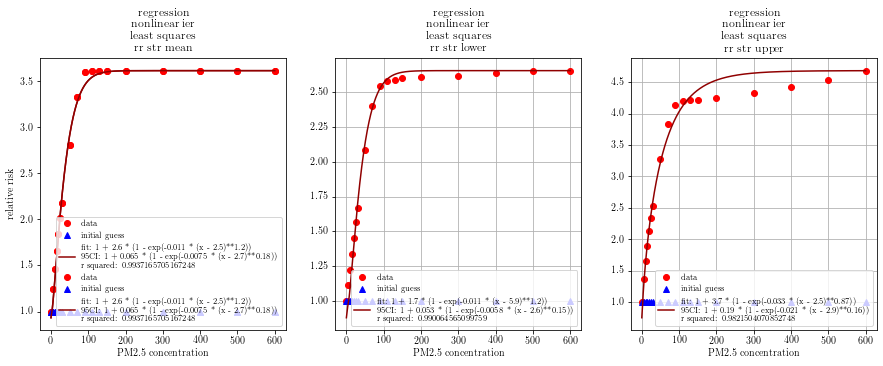

In [246]:
# regression_nonlinear_ier

pm25 = df_gbd2019_str['pm25'].values
pm25_0p1 = np.linspace(min(pm25), max(pm25), 6000) # max PM2.5 risk level = 600 ugm-3, at 0.1 ugm-3 spacing = 6000 points

rr_str_mean_25_29 = df_gbd2019_str['mean_25_29'].values
initialGuess = [np.nanmax(rr_str_mean_25_29)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_str_mean_25_29, initialGuess,
                      bounds=((np.nanmax(rr_str_mean_25_29)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_str_mean_25_29)-1, 3, 3, lcc_mean)))
rr_str_mean_25_29_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_str_mean_25_29 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_mean_25_29 - np.mean(rr_str_mean_25_29))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_str_lower_25_29 = df_gbd2019_str['lower_25_29'].values
initialGuess = [np.nanmax(rr_str_lower_25_29)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_str_lower_25_29, initialGuess,
                      bounds=((np.nanmax(rr_str_lower_25_29)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_str_lower_25_29)-1, 3, 3, lcc_mean)))
rr_str_lower_25_29_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_str_lower_25_29 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_lower_25_29 - np.mean(rr_str_lower_25_29))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_str_upper_25_29 = df_gbd2019_str['upper_25_29'].values
initialGuess = [np.nanmax(rr_str_upper_25_29)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_str_upper_25_29, initialGuess,
                      bounds=((np.nanmax(rr_str_upper_25_29)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_str_upper_25_29)-1, 3, 3, lcc_mean)))
rr_str_upper_25_29_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_str_upper_25_29 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_upper_25_29 - np.mean(rr_str_upper_25_29))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_str_mean_30_34 = df_gbd2019_str['mean_30_34'].values
initialGuess = [np.nanmax(rr_str_mean_30_34)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_str_mean_30_34, initialGuess,
                      bounds=((np.nanmax(rr_str_mean_30_34)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_str_mean_30_34)-1, 3, 3, lcc_mean)))
rr_str_mean_30_34_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_str_mean_30_34 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_mean_30_34 - np.mean(rr_str_mean_30_34))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_str_lower_30_34 = df_gbd2019_str['lower_30_34'].values
initialGuess = [np.nanmax(rr_str_lower_30_34)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_str_lower_30_34, initialGuess,
                      bounds=((np.nanmax(rr_str_lower_30_34)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_str_lower_30_34)-1, 3, 3, lcc_mean)))
rr_str_lower_30_34_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_str_lower_30_34 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_lower_30_34 - np.mean(rr_str_lower_30_34))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_str_upper_30_34 = df_gbd2019_str['upper_30_34'].values
initialGuess = [np.nanmax(rr_str_upper_30_34)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_str_upper_30_34, initialGuess,
                      bounds=((np.nanmax(rr_str_upper_30_34)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_str_upper_30_34)-1, 3, 3, lcc_mean)))
rr_str_upper_30_34_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_str_upper_30_34 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_upper_30_34 - np.mean(rr_str_upper_30_34))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_str_mean_35_39 = df_gbd2019_str['mean_35_39'].values
initialGuess = [np.nanmax(rr_str_mean_35_39)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_str_mean_35_39, initialGuess,
                      bounds=((np.nanmax(rr_str_mean_35_39)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_str_mean_35_39)-1, 3, 3, lcc_mean)))
rr_str_mean_35_39_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_str_mean_35_39 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_mean_35_39 - np.mean(rr_str_mean_35_39))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_str_lower_35_39 = df_gbd2019_str['lower_35_39'].values
initialGuess = [np.nanmax(rr_str_lower_35_39)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_str_lower_35_39, initialGuess,
                      bounds=((np.nanmax(rr_str_lower_35_39)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_str_lower_35_39)-1, 3, 3, lcc_mean)))
rr_str_lower_35_39_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_str_lower_35_39 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_lower_35_39 - np.mean(rr_str_lower_35_39))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_str_upper_35_39 = df_gbd2019_str['upper_35_39'].values
initialGuess = [np.nanmax(rr_str_upper_35_39)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_str_upper_35_39, initialGuess,
                      bounds=((np.nanmax(rr_str_upper_35_39)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_str_upper_35_39)-1, 3, 3, lcc_mean)))
rr_str_upper_35_39_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_str_upper_35_39 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_upper_35_39 - np.mean(rr_str_upper_35_39))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_str_mean_40_44 = df_gbd2019_str['mean_40_44'].values
initialGuess = [np.nanmax(rr_str_mean_40_44)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_str_mean_40_44, initialGuess,
                      bounds=((np.nanmax(rr_str_mean_40_44)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_str_mean_40_44)-1, 3, 3, lcc_mean)))
rr_str_mean_40_44_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_str_mean_40_44 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_mean_40_44 - np.mean(rr_str_mean_40_44))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_str_lower_40_44 = df_gbd2019_str['lower_40_44'].values
initialGuess = [np.nanmax(rr_str_lower_40_44)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_str_lower_40_44, initialGuess,
                      bounds=((np.nanmax(rr_str_lower_40_44)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_str_lower_40_44)-1, 3, 3, lcc_mean)))
rr_str_lower_40_44_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_str_lower_40_44 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_lower_40_44 - np.mean(rr_str_lower_40_44))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_str_upper_40_44 = df_gbd2019_str['upper_40_44'].values
initialGuess = [np.nanmax(rr_str_upper_40_44)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_str_upper_40_44, initialGuess,
                      bounds=((np.nanmax(rr_str_upper_40_44)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_str_upper_40_44)-1, 3, 3, lcc_mean)))
rr_str_upper_40_44_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_str_upper_40_44 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_upper_40_44 - np.mean(rr_str_upper_40_44))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_str_mean_45_49 = df_gbd2019_str['mean_45_49'].values
initialGuess = [np.nanmax(rr_str_mean_45_49)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_str_mean_45_49, initialGuess,
                      bounds=((np.nanmax(rr_str_mean_45_49)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_str_mean_45_49)-1, 3, 3, lcc_mean)))
rr_str_mean_45_49_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_str_mean_45_49 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_mean_45_49 - np.mean(rr_str_mean_45_49))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_str_lower_45_49 = df_gbd2019_str['lower_45_49'].values
initialGuess = [np.nanmax(rr_str_lower_45_49)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_str_lower_45_49, initialGuess,
                      bounds=((np.nanmax(rr_str_lower_45_49)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_str_lower_45_49)-1, 3, 3, lcc_mean)))
rr_str_lower_45_49_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_str_lower_45_49 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_lower_45_49 - np.mean(rr_str_lower_45_49))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_str_upper_45_49 = df_gbd2019_str['upper_45_49'].values
initialGuess = [np.nanmax(rr_str_upper_45_49)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_str_upper_45_49, initialGuess,
                      bounds=((np.nanmax(rr_str_upper_45_49)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_str_upper_45_49)-1, 3, 3, lcc_mean)))
rr_str_upper_45_49_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_str_upper_45_49 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_upper_45_49 - np.mean(rr_str_upper_45_49))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_str_mean_50_54 = df_gbd2019_str['mean_50_54'].values
initialGuess = [np.nanmax(rr_str_mean_50_54)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_str_mean_50_54, initialGuess,
                      bounds=((np.nanmax(rr_str_mean_50_54)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_str_mean_50_54)-1, 3, 3, lcc_mean)))
rr_str_mean_50_54_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_str_mean_50_54 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_mean_50_54 - np.mean(rr_str_mean_50_54))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_str_lower_50_54 = df_gbd2019_str['lower_50_54'].values
initialGuess = [np.nanmax(rr_str_lower_50_54)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_str_lower_50_54, initialGuess,
                      bounds=((np.nanmax(rr_str_lower_50_54)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_str_lower_50_54)-1, 3, 3, lcc_mean)))
rr_str_lower_50_54_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_str_lower_50_54 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_lower_50_54 - np.mean(rr_str_lower_50_54))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_str_upper_50_54 = df_gbd2019_str['upper_50_54'].values
initialGuess = [np.nanmax(rr_str_upper_50_54)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_str_upper_50_54, initialGuess,
                      bounds=((np.nanmax(rr_str_upper_50_54)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_str_upper_50_54)-1, 3, 3, lcc_mean)))
rr_str_upper_50_54_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_str_upper_50_54 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_upper_50_54 - np.mean(rr_str_upper_50_54))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_str_mean_55_59 = df_gbd2019_str['mean_55_59'].values
initialGuess = [np.nanmax(rr_str_mean_55_59)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_str_mean_55_59, initialGuess,
                      bounds=((np.nanmax(rr_str_mean_55_59)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_str_mean_55_59)-1, 3, 3, lcc_mean)))
rr_str_mean_55_59_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_str_mean_55_59 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_mean_55_59 - np.mean(rr_str_mean_55_59))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_str_lower_55_59 = df_gbd2019_str['lower_55_59'].values
initialGuess = [np.nanmax(rr_str_lower_55_59)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_str_lower_55_59, initialGuess,
                      bounds=((np.nanmax(rr_str_lower_55_59)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_str_lower_55_59)-1, 3, 3, lcc_mean)))
rr_str_lower_55_59_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_str_lower_55_59 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_lower_55_59 - np.mean(rr_str_lower_55_59))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_str_upper_55_59 = df_gbd2019_str['upper_55_59'].values
initialGuess = [np.nanmax(rr_str_upper_55_59)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_str_upper_55_59, initialGuess,
                      bounds=((np.nanmax(rr_str_upper_55_59)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_str_upper_55_59)-1, 3, 3, lcc_mean)))
rr_str_upper_55_59_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_str_upper_55_59 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_upper_55_59 - np.mean(rr_str_upper_55_59))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_str_mean_60_64 = df_gbd2019_str['mean_60_64'].values
initialGuess = [np.nanmax(rr_str_mean_60_64)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_str_mean_60_64, initialGuess,
                      bounds=((np.nanmax(rr_str_mean_60_64)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_str_mean_60_64)-1, 3, 3, lcc_mean)))
rr_str_mean_60_64_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_str_mean_60_64 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_mean_60_64 - np.mean(rr_str_mean_60_64))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_str_lower_60_64 = df_gbd2019_str['lower_60_64'].values
initialGuess = [np.nanmax(rr_str_lower_60_64)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_str_lower_60_64, initialGuess,
                      bounds=((np.nanmax(rr_str_lower_60_64)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_str_lower_60_64)-1, 3, 3, lcc_mean)))
rr_str_lower_60_64_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_str_lower_60_64 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_lower_60_64 - np.mean(rr_str_lower_60_64))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_str_upper_60_64 = df_gbd2019_str['upper_60_64'].values
initialGuess = [np.nanmax(rr_str_upper_60_64)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_str_upper_60_64, initialGuess,
                      bounds=((np.nanmax(rr_str_upper_60_64)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_str_upper_60_64)-1, 3, 3, lcc_mean)))
rr_str_upper_60_64_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_str_upper_60_64 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_upper_60_64 - np.mean(rr_str_upper_60_64))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_str_mean_65_69 = df_gbd2019_str['mean_65_69'].values
initialGuess = [np.nanmax(rr_str_mean_65_69)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_str_mean_65_69, initialGuess,
                      bounds=((np.nanmax(rr_str_mean_65_69)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_str_mean_65_69)-1, 3, 3, lcc_mean)))
rr_str_mean_65_69_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_str_mean_65_69 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_mean_65_69 - np.mean(rr_str_mean_65_69))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_str_lower_65_69 = df_gbd2019_str['lower_65_69'].values
initialGuess = [np.nanmax(rr_str_lower_65_69)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_str_lower_65_69, initialGuess,
                      bounds=((np.nanmax(rr_str_lower_65_69)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_str_lower_65_69)-1, 3, 3, lcc_mean)))
rr_str_lower_65_69_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_str_lower_65_69 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_lower_65_69 - np.mean(rr_str_lower_65_69))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_str_upper_65_69 = df_gbd2019_str['upper_65_69'].values
initialGuess = [np.nanmax(rr_str_upper_65_69)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_str_upper_65_69, initialGuess,
                      bounds=((np.nanmax(rr_str_upper_65_69)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_str_upper_65_69)-1, 3, 3, lcc_mean)))
rr_str_upper_65_69_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_str_upper_65_69 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_upper_65_69 - np.mean(rr_str_upper_65_69))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_str_mean_70_74 = df_gbd2019_str['mean_70_74'].values
initialGuess = [np.nanmax(rr_str_mean_70_74)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_str_mean_70_74, initialGuess,
                      bounds=((np.nanmax(rr_str_mean_70_74)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_str_mean_70_74)-1, 3, 3, lcc_mean)))
rr_str_mean_70_74_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_str_mean_70_74 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_mean_70_74 - np.mean(rr_str_mean_70_74))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_str_lower_70_74 = df_gbd2019_str['lower_70_74'].values
initialGuess = [np.nanmax(rr_str_lower_70_74)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_str_lower_70_74, initialGuess,
                      bounds=((np.nanmax(rr_str_lower_70_74)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_str_lower_70_74)-1, 3, 3, lcc_mean)))
rr_str_lower_70_74_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_str_lower_70_74 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_lower_70_74 - np.mean(rr_str_lower_70_74))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_str_upper_70_74 = df_gbd2019_str['upper_70_74'].values
initialGuess = [np.nanmax(rr_str_upper_70_74)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_str_upper_70_74, initialGuess,
                      bounds=((np.nanmax(rr_str_upper_70_74)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_str_upper_70_74)-1, 3, 3, lcc_mean)))
rr_str_upper_70_74_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_str_upper_70_74 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_upper_70_74 - np.mean(rr_str_upper_70_74))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_str_mean_75_79 = df_gbd2019_str['mean_75_79'].values
initialGuess = [np.nanmax(rr_str_mean_75_79)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_str_mean_75_79, initialGuess,
                      bounds=((np.nanmax(rr_str_mean_75_79)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_str_mean_75_79)-1, 3, 3, lcc_mean)))
rr_str_mean_75_79_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_str_mean_75_79 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_mean_75_79 - np.mean(rr_str_mean_75_79))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_str_lower_75_79 = df_gbd2019_str['lower_75_79'].values
initialGuess = [np.nanmax(rr_str_lower_75_79)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_str_lower_75_79, initialGuess,
                      bounds=((np.nanmax(rr_str_lower_75_79)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_str_lower_75_79)-1, 3, 3, lcc_mean)))
rr_str_lower_75_79_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_str_lower_75_79 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_lower_75_79 - np.mean(rr_str_lower_75_79))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_str_upper_75_79 = df_gbd2019_str['upper_75_79'].values
initialGuess = [np.nanmax(rr_str_upper_75_79)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_str_upper_75_79, initialGuess,
                      bounds=((np.nanmax(rr_str_upper_75_79)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_str_upper_75_79)-1, 3, 3, lcc_mean)))
rr_str_upper_75_79_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_str_upper_75_79 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_upper_75_79 - np.mean(rr_str_upper_75_79))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_str_mean_80_84 = df_gbd2019_str['mean_80_84'].values
initialGuess = [np.nanmax(rr_str_mean_80_84)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_str_mean_80_84, initialGuess,
                      bounds=((np.nanmax(rr_str_mean_80_84)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_str_mean_80_84)-1, 3, 3, lcc_mean)))
rr_str_mean_80_84_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_str_mean_80_84 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_mean_80_84 - np.mean(rr_str_mean_80_84))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_str_lower_80_84 = df_gbd2019_str['lower_80_84'].values
initialGuess = [np.nanmax(rr_str_lower_80_84)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_str_lower_80_84, initialGuess,
                      bounds=((np.nanmax(rr_str_lower_80_84)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_str_lower_80_84)-1, 3, 3, lcc_mean)))
rr_str_lower_80_84_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_str_lower_80_84 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_lower_80_84 - np.mean(rr_str_lower_80_84))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_str_upper_80_84 = df_gbd2019_str['upper_80_84'].values
initialGuess = [np.nanmax(rr_str_upper_80_84)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_str_upper_80_84, initialGuess,
                      bounds=((np.nanmax(rr_str_upper_80_84)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_str_upper_80_84)-1, 3, 3, lcc_mean)))
rr_str_upper_80_84_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_str_upper_80_84 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_upper_80_84 - np.mean(rr_str_upper_80_84))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_str_mean_85_89 = df_gbd2019_str['mean_85_89'].values
initialGuess = [np.nanmax(rr_str_mean_85_89)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_str_mean_85_89, initialGuess,
                      bounds=((np.nanmax(rr_str_mean_85_89)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_str_mean_85_89)-1, 3, 3, lcc_mean)))
rr_str_mean_85_89_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_str_mean_85_89 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_mean_85_89 - np.mean(rr_str_mean_85_89))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_str_lower_85_89 = df_gbd2019_str['lower_85_89'].values
initialGuess = [np.nanmax(rr_str_lower_85_89)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_str_lower_85_89, initialGuess,
                      bounds=((np.nanmax(rr_str_lower_85_89)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_str_lower_85_89)-1, 3, 3, lcc_mean)))
rr_str_lower_85_89_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_str_lower_85_89 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_lower_85_89 - np.mean(rr_str_lower_85_89))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_str_upper_85_89 = df_gbd2019_str['upper_85_89'].values
initialGuess = [np.nanmax(rr_str_upper_85_89)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_str_upper_85_89, initialGuess,
                      bounds=((np.nanmax(rr_str_upper_85_89)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_str_upper_85_89)-1, 3, 3, lcc_mean)))
rr_str_upper_85_89_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_str_upper_85_89 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_upper_85_89 - np.mean(rr_str_upper_85_89))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_str_mean_90_94 = df_gbd2019_str['mean_90_94'].values
initialGuess = [np.nanmax(rr_str_mean_90_94)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_str_mean_90_94, initialGuess,
                      bounds=((np.nanmax(rr_str_mean_90_94)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_str_mean_90_94)-1, 3, 3, lcc_mean)))
rr_str_mean_90_94_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_str_mean_90_94 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_mean_90_94 - np.mean(rr_str_mean_90_94))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_str_lower_90_94 = df_gbd2019_str['lower_90_94'].values
initialGuess = [np.nanmax(rr_str_lower_90_94)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_str_lower_90_94, initialGuess,
                      bounds=((np.nanmax(rr_str_lower_90_94)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_str_lower_90_94)-1, 3, 3, lcc_mean)))
rr_str_lower_90_94_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_str_lower_90_94 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_lower_90_94 - np.mean(rr_str_lower_90_94))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_str_upper_90_94 = df_gbd2019_str['upper_90_94'].values
initialGuess = [np.nanmax(rr_str_upper_90_94)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_str_upper_90_94, initialGuess,
                      bounds=((np.nanmax(rr_str_upper_90_94)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_str_upper_90_94)-1, 3, 3, lcc_mean)))
rr_str_upper_90_94_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_str_upper_90_94 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_upper_90_94 - np.mean(rr_str_upper_90_94))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_str_mean_95up = df_gbd2019_str['mean_95up'].values
initialGuess = [np.nanmax(rr_str_mean_95up)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_str_mean_95up, initialGuess,
                      bounds=((np.nanmax(rr_str_mean_95up)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_str_mean_95up)-1, 3, 3, lcc_mean)))
rr_str_mean_95up_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_str_mean_95up - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_mean_95up - np.mean(rr_str_mean_95up))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_str_lower_95up = df_gbd2019_str['lower_95up'].values
initialGuess = [np.nanmax(rr_str_lower_95up)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_str_lower_95up, initialGuess,
                      bounds=((np.nanmax(rr_str_lower_95up)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_str_lower_95up)-1, 3, 3, lcc_mean)))
rr_str_lower_95up_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_str_lower_95up - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_lower_95up - np.mean(rr_str_lower_95up))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_str_upper_95up = df_gbd2019_str['upper_95up'].values
initialGuess = [np.nanmax(rr_str_upper_95up)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_str_upper_95up, initialGuess,
                      bounds=((np.nanmax(rr_str_upper_95up)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_str_upper_95up)-1, 3, 3, lcc_mean)))
rr_str_upper_95up_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_str_upper_95up - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_upper_95up - np.mean(rr_str_upper_95up))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

fig1 = plt.figure(1, figsize=(15,5))

rr_str_mean_25_29 = df_gbd2019_str['mean_25_29'].values
initialGuess = [np.nanmax(rr_str_mean_25_29)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_str_mean_25_29, initialGuess,
                      bounds=((np.nanmax(rr_str_mean_25_29)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_str_mean_25_29)-1, 3, 3, lcc_mean)))
residuals = rr_str_mean_25_29 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_mean_25_29 - np.mean(rr_str_mean_25_29))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_str_mean_25_29_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
ax=fig1.add_subplot(1,3,1)
ax.plot(pm25, rr_str_mean_25_29, linestyle='', marker='o', color='r', label="data")
ax.plot(pm25, guess, linestyle='', marker='^', color='b', label="initial guess")
ax.plot(pm25_0p1, rr_str_mean_25_29_0p1, linestyle='-', color='#900000', label="fit: 1 + {0:0.2g} * (1 - exp(-{1:0.2g} * (x - {3:0.2g})**{2:0.2g}))".format(*popt) + "\n95CI: 1 + {0:0.2g} * (1 - exp(-{1:0.2g} * (x - {3:0.2g})**{2:0.2g}))".format(*p_two_sd) + "\nr squared: " + str(r_squared))
ax.set_ylabel("relative risk")
ax.set_xlabel("PM2.5 concentration")
ax.legend(loc='best', fontsize=8)
ax.grid()
ax.set_title("regression\nnonlinear ier\nleast squares\nrr str mean")

rr_str_lower_25_29 = df_gbd2019_str['lower_25_29'].values
initialGuess = [np.nanmax(rr_str_lower_25_29)-1, 0, 0, lcc_lower] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_str_lower_25_29, initialGuess, 
                      bounds=((np.nanmax(rr_str_lower_25_29)-1.0000000001, 0, 0, lcc_lower-0.0000000001),
                              (np.nanmax(rr_str_lower_25_29)-1, 3, 3, lcc_lower)))
residuals = rr_str_lower_25_29 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_lower_25_29 - np.mean(rr_str_lower_25_29))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_str_lower_25_29_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
ax=fig1.add_subplot(1,3,2)
ax.plot(pm25, rr_str_lower_25_29, linestyle='', marker='o', color='r', label="data")
ax.plot(pm25, guess, linestyle='', marker='^', color='b', label="initial guess")
ax.plot(pm25_0p1, rr_str_lower_25_29_0p1, linestyle='-', color='#900000', label="fit: 1 + {0:0.2g} * (1 - exp(-{1:0.2g} * (x - {3:0.2g})**{2:0.2g}))".format(*popt) + "\n95CI: 1 + {0:0.2g} * (1 - exp(-{1:0.2g} * (x - {3:0.2g})**{2:0.2g}))".format(*p_two_sd) + "\nr squared: " + str(r_squared))
ax.set_xlabel("PM2.5 concentration")
ax.legend(loc='best', fontsize=8)
ax.grid()
ax.set_title("regression\nnonlinear ier\nleast squares\nrr str lower")

rr_str_upper_25_29 = df_gbd2019_str['upper_25_29'].values
initialGuess = [np.nanmax(rr_str_upper_25_29)-1, 0., 0, lcc_upper] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_str_upper_25_29, initialGuess, 
                      bounds=((np.nanmax(rr_str_upper_25_29)-1.0000000001, 0, 0, lcc_upper-0.0000000001),
                              (np.nanmax(rr_str_upper_25_29)-1, 3, 3, lcc_upper)))
residuals = rr_str_upper_25_29 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_upper_25_29 - np.mean(rr_str_upper_25_29))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_str_upper_25_29_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
ax=fig1.add_subplot(1,3,3)
ax.plot(pm25, rr_str_upper_25_29, linestyle='', marker='o', color='r', label="data")
ax.plot(pm25, guess, linestyle='', marker='^', color='b', label="initial guess")
ax.plot(pm25_0p1, rr_str_upper_25_29_0p1, linestyle='-', color='#900000', label="fit: 1 + {0:0.2g} * (1 - exp(-{1:0.2g} * (x - {3:0.2g})**{2:0.2g}))".format(*popt) + "\n95CI: 1 + {0:0.2g} * (1 - exp(-{1:0.2g} * (x - {3:0.2g})**{2:0.2g}))".format(*p_two_sd) + "\nr squared: " + str(r_squared))
ax.set_xlabel("PM2.5 concentration")
ax.legend(loc='best', fontsize=8)
ax.grid()
ax.set_title("regression\nnonlinear ier\nleast squares\nrr str upper")
plt.show()

<ipython-input-248-8ef399ecf45e>:651: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=fig1.add_subplot(1,3,1)


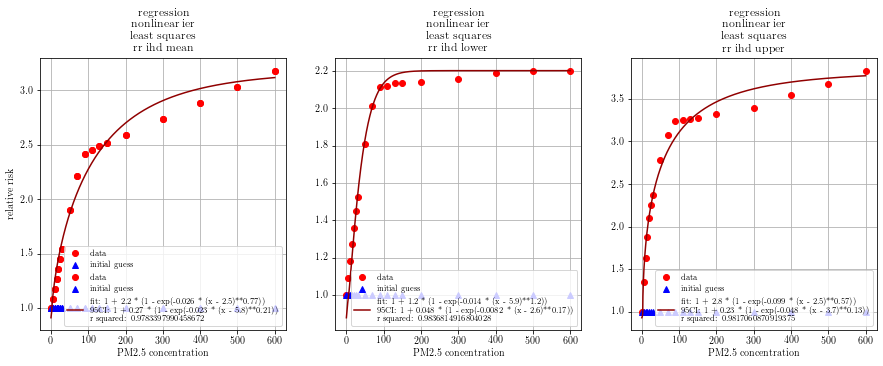

In [248]:
# regression_nonlinear_ier

pm25 = df_gbd2019_ihd['pm25'].values
pm25_0p1 = np.linspace(min(pm25), max(pm25), 6000) # max PM2.5 risk level = 600 ugm-3, at 0.1 ugm-3 spacing = 6000 points

rr_ihd_mean_25_29 = df_gbd2019_ihd['mean_25_29'].values
initialGuess = [np.nanmax(rr_ihd_mean_25_29)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_ihd_mean_25_29, initialGuess,
                      bounds=((np.nanmax(rr_ihd_mean_25_29)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_ihd_mean_25_29)-1, 3, 3, lcc_mean)))
rr_ihd_mean_25_29_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_mean_25_29 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_mean_25_29 - np.mean(rr_ihd_mean_25_29))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_ihd_lower_25_29 = df_gbd2019_ihd['lower_25_29'].values
initialGuess = [np.nanmax(rr_ihd_lower_25_29)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_ihd_lower_25_29, initialGuess,
                      bounds=((np.nanmax(rr_ihd_lower_25_29)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_ihd_lower_25_29)-1, 3, 3, lcc_mean)))
rr_ihd_lower_25_29_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_lower_25_29 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_lower_25_29 - np.mean(rr_ihd_lower_25_29))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_ihd_upper_25_29 = df_gbd2019_ihd['upper_25_29'].values
initialGuess = [np.nanmax(rr_ihd_upper_25_29)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_ihd_upper_25_29, initialGuess,
                      bounds=((np.nanmax(rr_ihd_upper_25_29)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_ihd_upper_25_29)-1, 3, 3, lcc_mean)))
rr_ihd_upper_25_29_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_upper_25_29 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_upper_25_29 - np.mean(rr_ihd_upper_25_29))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_ihd_mean_30_34 = df_gbd2019_ihd['mean_30_34'].values
initialGuess = [np.nanmax(rr_ihd_mean_30_34)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_ihd_mean_30_34, initialGuess,
                      bounds=((np.nanmax(rr_ihd_mean_30_34)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_ihd_mean_30_34)-1, 3, 3, lcc_mean)))
rr_ihd_mean_30_34_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_mean_30_34 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_mean_30_34 - np.mean(rr_ihd_mean_30_34))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_ihd_lower_30_34 = df_gbd2019_ihd['lower_30_34'].values
initialGuess = [np.nanmax(rr_ihd_lower_30_34)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_ihd_lower_30_34, initialGuess,
                      bounds=((np.nanmax(rr_ihd_lower_30_34)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_ihd_lower_30_34)-1, 3, 3, lcc_mean)))
rr_ihd_lower_30_34_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_lower_30_34 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_lower_30_34 - np.mean(rr_ihd_lower_30_34))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_ihd_upper_30_34 = df_gbd2019_ihd['upper_30_34'].values
initialGuess = [np.nanmax(rr_ihd_upper_30_34)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_ihd_upper_30_34, initialGuess,
                      bounds=((np.nanmax(rr_ihd_upper_30_34)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_ihd_upper_30_34)-1, 3, 3, lcc_mean)))
rr_ihd_upper_30_34_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_upper_30_34 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_upper_30_34 - np.mean(rr_ihd_upper_30_34))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_ihd_mean_35_39 = df_gbd2019_ihd['mean_35_39'].values
initialGuess = [np.nanmax(rr_ihd_mean_35_39)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_ihd_mean_35_39, initialGuess,
                      bounds=((np.nanmax(rr_ihd_mean_35_39)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_ihd_mean_35_39)-1, 3, 3, lcc_mean)))
rr_ihd_mean_35_39_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_mean_35_39 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_mean_35_39 - np.mean(rr_ihd_mean_35_39))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_ihd_lower_35_39 = df_gbd2019_ihd['lower_35_39'].values
initialGuess = [np.nanmax(rr_ihd_lower_35_39)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_ihd_lower_35_39, initialGuess,
                      bounds=((np.nanmax(rr_ihd_lower_35_39)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_ihd_lower_35_39)-1, 3, 3, lcc_mean)))
rr_ihd_lower_35_39_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_lower_35_39 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_lower_35_39 - np.mean(rr_ihd_lower_35_39))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_ihd_upper_35_39 = df_gbd2019_ihd['upper_35_39'].values
initialGuess = [np.nanmax(rr_ihd_upper_35_39)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_ihd_upper_35_39, initialGuess,
                      bounds=((np.nanmax(rr_ihd_upper_35_39)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_ihd_upper_35_39)-1, 3, 3, lcc_mean)))
rr_ihd_upper_35_39_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_upper_35_39 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_upper_35_39 - np.mean(rr_ihd_upper_35_39))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_ihd_mean_40_44 = df_gbd2019_ihd['mean_40_44'].values
initialGuess = [np.nanmax(rr_ihd_mean_40_44)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_ihd_mean_40_44, initialGuess,
                      bounds=((np.nanmax(rr_ihd_mean_40_44)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_ihd_mean_40_44)-1, 3, 3, lcc_mean)))
rr_ihd_mean_40_44_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_mean_40_44 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_mean_40_44 - np.mean(rr_ihd_mean_40_44))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_ihd_lower_40_44 = df_gbd2019_ihd['lower_40_44'].values
initialGuess = [np.nanmax(rr_ihd_lower_40_44)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_ihd_lower_40_44, initialGuess,
                      bounds=((np.nanmax(rr_ihd_lower_40_44)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_ihd_lower_40_44)-1, 3, 3, lcc_mean)))
rr_ihd_lower_40_44_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_lower_40_44 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_lower_40_44 - np.mean(rr_ihd_lower_40_44))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_ihd_upper_40_44 = df_gbd2019_ihd['upper_40_44'].values
initialGuess = [np.nanmax(rr_ihd_upper_40_44)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_ihd_upper_40_44, initialGuess,
                      bounds=((np.nanmax(rr_ihd_upper_40_44)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_ihd_upper_40_44)-1, 3, 3, lcc_mean)))
rr_ihd_upper_40_44_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_upper_40_44 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_upper_40_44 - np.mean(rr_ihd_upper_40_44))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_ihd_mean_45_49 = df_gbd2019_ihd['mean_45_49'].values
initialGuess = [np.nanmax(rr_ihd_mean_45_49)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_ihd_mean_45_49, initialGuess,
                      bounds=((np.nanmax(rr_ihd_mean_45_49)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_ihd_mean_45_49)-1, 3, 3, lcc_mean)))
rr_ihd_mean_45_49_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_mean_45_49 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_mean_45_49 - np.mean(rr_ihd_mean_45_49))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_ihd_lower_45_49 = df_gbd2019_ihd['lower_45_49'].values
initialGuess = [np.nanmax(rr_ihd_lower_45_49)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_ihd_lower_45_49, initialGuess,
                      bounds=((np.nanmax(rr_ihd_lower_45_49)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_ihd_lower_45_49)-1, 3, 3, lcc_mean)))
rr_ihd_lower_45_49_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_lower_45_49 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_lower_45_49 - np.mean(rr_ihd_lower_45_49))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_ihd_upper_45_49 = df_gbd2019_ihd['upper_45_49'].values
initialGuess = [np.nanmax(rr_ihd_upper_45_49)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_ihd_upper_45_49, initialGuess,
                      bounds=((np.nanmax(rr_ihd_upper_45_49)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_ihd_upper_45_49)-1, 3, 3, lcc_mean)))
rr_ihd_upper_45_49_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_upper_45_49 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_upper_45_49 - np.mean(rr_ihd_upper_45_49))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_ihd_mean_50_54 = df_gbd2019_ihd['mean_50_54'].values
initialGuess = [np.nanmax(rr_ihd_mean_50_54)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_ihd_mean_50_54, initialGuess,
                      bounds=((np.nanmax(rr_ihd_mean_50_54)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_ihd_mean_50_54)-1, 3, 3, lcc_mean)))
rr_ihd_mean_50_54_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_mean_50_54 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_mean_50_54 - np.mean(rr_ihd_mean_50_54))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_ihd_lower_50_54 = df_gbd2019_ihd['lower_50_54'].values
initialGuess = [np.nanmax(rr_ihd_lower_50_54)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_ihd_lower_50_54, initialGuess,
                      bounds=((np.nanmax(rr_ihd_lower_50_54)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_ihd_lower_50_54)-1, 3, 3, lcc_mean)))
rr_ihd_lower_50_54_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_lower_50_54 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_lower_50_54 - np.mean(rr_ihd_lower_50_54))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_ihd_upper_50_54 = df_gbd2019_ihd['upper_50_54'].values
initialGuess = [np.nanmax(rr_ihd_upper_50_54)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_ihd_upper_50_54, initialGuess,
                      bounds=((np.nanmax(rr_ihd_upper_50_54)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_ihd_upper_50_54)-1, 3, 3, lcc_mean)))
rr_ihd_upper_50_54_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_upper_50_54 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_upper_50_54 - np.mean(rr_ihd_upper_50_54))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_ihd_mean_55_59 = df_gbd2019_ihd['mean_55_59'].values
initialGuess = [np.nanmax(rr_ihd_mean_55_59)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_ihd_mean_55_59, initialGuess,
                      bounds=((np.nanmax(rr_ihd_mean_55_59)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_ihd_mean_55_59)-1, 3, 3, lcc_mean)))
rr_ihd_mean_55_59_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_mean_55_59 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_mean_55_59 - np.mean(rr_ihd_mean_55_59))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_ihd_lower_55_59 = df_gbd2019_ihd['lower_55_59'].values
initialGuess = [np.nanmax(rr_ihd_lower_55_59)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_ihd_lower_55_59, initialGuess,
                      bounds=((np.nanmax(rr_ihd_lower_55_59)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_ihd_lower_55_59)-1, 3, 3, lcc_mean)))
rr_ihd_lower_55_59_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_lower_55_59 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_lower_55_59 - np.mean(rr_ihd_lower_55_59))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_ihd_upper_55_59 = df_gbd2019_ihd['upper_55_59'].values
initialGuess = [np.nanmax(rr_ihd_upper_55_59)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_ihd_upper_55_59, initialGuess,
                      bounds=((np.nanmax(rr_ihd_upper_55_59)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_ihd_upper_55_59)-1, 3, 3, lcc_mean)))
rr_ihd_upper_55_59_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_upper_55_59 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_upper_55_59 - np.mean(rr_ihd_upper_55_59))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_ihd_mean_60_64 = df_gbd2019_ihd['mean_60_64'].values
initialGuess = [np.nanmax(rr_ihd_mean_60_64)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_ihd_mean_60_64, initialGuess,
                      bounds=((np.nanmax(rr_ihd_mean_60_64)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_ihd_mean_60_64)-1, 3, 3, lcc_mean)))
rr_ihd_mean_60_64_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_mean_60_64 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_mean_60_64 - np.mean(rr_ihd_mean_60_64))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_ihd_lower_60_64 = df_gbd2019_ihd['lower_60_64'].values
initialGuess = [np.nanmax(rr_ihd_lower_60_64)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_ihd_lower_60_64, initialGuess,
                      bounds=((np.nanmax(rr_ihd_lower_60_64)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_ihd_lower_60_64)-1, 3, 3, lcc_mean)))
rr_ihd_lower_60_64_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_lower_60_64 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_lower_60_64 - np.mean(rr_ihd_lower_60_64))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_ihd_upper_60_64 = df_gbd2019_ihd['upper_60_64'].values
initialGuess = [np.nanmax(rr_ihd_upper_60_64)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_ihd_upper_60_64, initialGuess,
                      bounds=((np.nanmax(rr_ihd_upper_60_64)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_ihd_upper_60_64)-1, 3, 3, lcc_mean)))
rr_ihd_upper_60_64_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_upper_60_64 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_upper_60_64 - np.mean(rr_ihd_upper_60_64))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_ihd_mean_65_69 = df_gbd2019_ihd['mean_65_69'].values
initialGuess = [np.nanmax(rr_ihd_mean_65_69)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_ihd_mean_65_69, initialGuess,
                      bounds=((np.nanmax(rr_ihd_mean_65_69)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_ihd_mean_65_69)-1, 3, 3, lcc_mean)))
rr_ihd_mean_65_69_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_mean_65_69 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_mean_65_69 - np.mean(rr_ihd_mean_65_69))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_ihd_lower_65_69 = df_gbd2019_ihd['lower_65_69'].values
initialGuess = [np.nanmax(rr_ihd_lower_65_69)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_ihd_lower_65_69, initialGuess,
                      bounds=((np.nanmax(rr_ihd_lower_65_69)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_ihd_lower_65_69)-1, 3, 3, lcc_mean)))
rr_ihd_lower_65_69_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_lower_65_69 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_lower_65_69 - np.mean(rr_ihd_lower_65_69))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_ihd_upper_65_69 = df_gbd2019_ihd['upper_65_69'].values
initialGuess = [np.nanmax(rr_ihd_upper_65_69)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_ihd_upper_65_69, initialGuess,
                      bounds=((np.nanmax(rr_ihd_upper_65_69)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_ihd_upper_65_69)-1, 3, 3, lcc_mean)))
rr_ihd_upper_65_69_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_upper_65_69 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_upper_65_69 - np.mean(rr_ihd_upper_65_69))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_ihd_mean_70_74 = df_gbd2019_ihd['mean_70_74'].values
initialGuess = [np.nanmax(rr_ihd_mean_70_74)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_ihd_mean_70_74, initialGuess,
                      bounds=((np.nanmax(rr_ihd_mean_70_74)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_ihd_mean_70_74)-1, 3, 3, lcc_mean)))
rr_ihd_mean_70_74_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_mean_70_74 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_mean_70_74 - np.mean(rr_ihd_mean_70_74))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_ihd_lower_70_74 = df_gbd2019_ihd['lower_70_74'].values
initialGuess = [np.nanmax(rr_ihd_lower_70_74)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_ihd_lower_70_74, initialGuess,
                      bounds=((np.nanmax(rr_ihd_lower_70_74)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_ihd_lower_70_74)-1, 3, 3, lcc_mean)))
rr_ihd_lower_70_74_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_lower_70_74 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_lower_70_74 - np.mean(rr_ihd_lower_70_74))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_ihd_upper_70_74 = df_gbd2019_ihd['upper_70_74'].values
initialGuess = [np.nanmax(rr_ihd_upper_70_74)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_ihd_upper_70_74, initialGuess,
                      bounds=((np.nanmax(rr_ihd_upper_70_74)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_ihd_upper_70_74)-1, 3, 3, lcc_mean)))
rr_ihd_upper_70_74_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_upper_70_74 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_upper_70_74 - np.mean(rr_ihd_upper_70_74))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_ihd_mean_75_79 = df_gbd2019_ihd['mean_75_79'].values
initialGuess = [np.nanmax(rr_ihd_mean_75_79)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_ihd_mean_75_79, initialGuess,
                      bounds=((np.nanmax(rr_ihd_mean_75_79)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_ihd_mean_75_79)-1, 3, 3, lcc_mean)))
rr_ihd_mean_75_79_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_mean_75_79 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_mean_75_79 - np.mean(rr_ihd_mean_75_79))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_ihd_lower_75_79 = df_gbd2019_ihd['lower_75_79'].values
initialGuess = [np.nanmax(rr_ihd_lower_75_79)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_ihd_lower_75_79, initialGuess,
                      bounds=((np.nanmax(rr_ihd_lower_75_79)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_ihd_lower_75_79)-1, 3, 3, lcc_mean)))
rr_ihd_lower_75_79_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_lower_75_79 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_lower_75_79 - np.mean(rr_ihd_lower_75_79))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_ihd_upper_75_79 = df_gbd2019_ihd['upper_75_79'].values
initialGuess = [np.nanmax(rr_ihd_upper_75_79)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_ihd_upper_75_79, initialGuess,
                      bounds=((np.nanmax(rr_ihd_upper_75_79)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_ihd_upper_75_79)-1, 3, 3, lcc_mean)))
rr_ihd_upper_75_79_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_upper_75_79 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_upper_75_79 - np.mean(rr_ihd_upper_75_79))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_ihd_mean_80_84 = df_gbd2019_ihd['mean_80_84'].values
initialGuess = [np.nanmax(rr_ihd_mean_80_84)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_ihd_mean_80_84, initialGuess,
                      bounds=((np.nanmax(rr_ihd_mean_80_84)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_ihd_mean_80_84)-1, 3, 3, lcc_mean)))
rr_ihd_mean_80_84_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_mean_80_84 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_mean_80_84 - np.mean(rr_ihd_mean_80_84))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_ihd_lower_80_84 = df_gbd2019_ihd['lower_80_84'].values
initialGuess = [np.nanmax(rr_ihd_lower_80_84)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_ihd_lower_80_84, initialGuess,
                      bounds=((np.nanmax(rr_ihd_lower_80_84)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_ihd_lower_80_84)-1, 3, 3, lcc_mean)))
rr_ihd_lower_80_84_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_lower_80_84 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_lower_80_84 - np.mean(rr_ihd_lower_80_84))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_ihd_upper_80_84 = df_gbd2019_ihd['upper_80_84'].values
initialGuess = [np.nanmax(rr_ihd_upper_80_84)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_ihd_upper_80_84, initialGuess,
                      bounds=((np.nanmax(rr_ihd_upper_80_84)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_ihd_upper_80_84)-1, 3, 3, lcc_mean)))
rr_ihd_upper_80_84_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_upper_80_84 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_upper_80_84 - np.mean(rr_ihd_upper_80_84))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_ihd_mean_85_89 = df_gbd2019_ihd['mean_85_89'].values
initialGuess = [np.nanmax(rr_ihd_mean_85_89)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_ihd_mean_85_89, initialGuess,
                      bounds=((np.nanmax(rr_ihd_mean_85_89)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_ihd_mean_85_89)-1, 3, 3, lcc_mean)))
rr_ihd_mean_85_89_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_mean_85_89 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_mean_85_89 - np.mean(rr_ihd_mean_85_89))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_ihd_lower_85_89 = df_gbd2019_ihd['lower_85_89'].values
initialGuess = [np.nanmax(rr_ihd_lower_85_89)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_ihd_lower_85_89, initialGuess,
                      bounds=((np.nanmax(rr_ihd_lower_85_89)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_ihd_lower_85_89)-1, 3, 3, lcc_mean)))
rr_ihd_lower_85_89_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_lower_85_89 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_lower_85_89 - np.mean(rr_ihd_lower_85_89))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_ihd_upper_85_89 = df_gbd2019_ihd['upper_85_89'].values
initialGuess = [np.nanmax(rr_ihd_upper_85_89)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_ihd_upper_85_89, initialGuess,
                      bounds=((np.nanmax(rr_ihd_upper_85_89)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_ihd_upper_85_89)-1, 3, 3, lcc_mean)))
rr_ihd_upper_85_89_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_upper_85_89 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_upper_85_89 - np.mean(rr_ihd_upper_85_89))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_ihd_mean_90_94 = df_gbd2019_ihd['mean_90_94'].values
initialGuess = [np.nanmax(rr_ihd_mean_90_94)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_ihd_mean_90_94, initialGuess,
                      bounds=((np.nanmax(rr_ihd_mean_90_94)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_ihd_mean_90_94)-1, 3, 3, lcc_mean)))
rr_ihd_mean_90_94_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_mean_90_94 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_mean_90_94 - np.mean(rr_ihd_mean_90_94))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_ihd_lower_90_94 = df_gbd2019_ihd['lower_90_94'].values
initialGuess = [np.nanmax(rr_ihd_lower_90_94)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_ihd_lower_90_94, initialGuess,
                      bounds=((np.nanmax(rr_ihd_lower_90_94)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_ihd_lower_90_94)-1, 3, 3, lcc_mean)))
rr_ihd_lower_90_94_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_lower_90_94 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_lower_90_94 - np.mean(rr_ihd_lower_90_94))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_ihd_upper_90_94 = df_gbd2019_ihd['upper_90_94'].values
initialGuess = [np.nanmax(rr_ihd_upper_90_94)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_ihd_upper_90_94, initialGuess,
                      bounds=((np.nanmax(rr_ihd_upper_90_94)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_ihd_upper_90_94)-1, 3, 3, lcc_mean)))
rr_ihd_upper_90_94_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_upper_90_94 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_upper_90_94 - np.mean(rr_ihd_upper_90_94))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_ihd_mean_95up = df_gbd2019_ihd['mean_95up'].values
initialGuess = [np.nanmax(rr_ihd_mean_95up)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_ihd_mean_95up, initialGuess,
                      bounds=((np.nanmax(rr_ihd_mean_95up)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_ihd_mean_95up)-1, 3, 3, lcc_mean)))
rr_ihd_mean_95up_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_mean_95up - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_mean_95up - np.mean(rr_ihd_mean_95up))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_ihd_lower_95up = df_gbd2019_ihd['lower_95up'].values
initialGuess = [np.nanmax(rr_ihd_lower_95up)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_ihd_lower_95up, initialGuess,
                      bounds=((np.nanmax(rr_ihd_lower_95up)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_ihd_lower_95up)-1, 3, 3, lcc_mean)))
rr_ihd_lower_95up_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_lower_95up - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_lower_95up - np.mean(rr_ihd_lower_95up))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_ihd_upper_95up = df_gbd2019_ihd['upper_95up'].values
initialGuess = [np.nanmax(rr_ihd_upper_95up)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_ihd_upper_95up, initialGuess,
                      bounds=((np.nanmax(rr_ihd_upper_95up)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_ihd_upper_95up)-1, 3, 3, lcc_mean)))
rr_ihd_upper_95up_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_upper_95up - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_upper_95up - np.mean(rr_ihd_upper_95up))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

fig1 = plt.figure(1, figsize=(15,5))

rr_ihd_mean_25_29 = df_gbd2019_ihd['mean_25_29'].values
initialGuess = [np.nanmax(rr_ihd_mean_25_29)-1, 0, 0, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_ihd_mean_25_29, initialGuess,
                      bounds=((np.nanmax(rr_ihd_mean_25_29)-1.0000000001, 0, 0, lcc_mean-0.0000000001),
                              (np.nanmax(rr_ihd_mean_25_29)-1, 3, 3, lcc_mean)))
residuals = rr_ihd_mean_25_29 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_mean_25_29 - np.mean(rr_ihd_mean_25_29))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_ihd_mean_25_29_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
ax=fig1.add_subplot(1,3,1)
ax.plot(pm25, rr_ihd_mean_25_29, linestyle='', marker='o', color='r', label="data")
ax.plot(pm25, guess, linestyle='', marker='^', color='b', label="initial guess")
ax.plot(pm25_0p1, rr_ihd_mean_25_29_0p1, linestyle='-', color='#900000', label="fit: 1 + {0:0.2g} * (1 - exp(-{1:0.2g} * (x - {3:0.2g})**{2:0.2g}))".format(*popt) + "\n95CI: 1 + {0:0.2g} * (1 - exp(-{1:0.2g} * (x - {3:0.2g})**{2:0.2g}))".format(*p_two_sd) + "\nr squared: " + str(r_squared))
ax.set_ylabel("relative risk")
ax.set_xlabel("PM2.5 concentration")
ax.legend(loc='best', fontsize=8)
ax.grid()
ax.set_title("regression\nnonlinear ier\nleast squares\nrr ihd mean")

rr_ihd_lower_25_29 = df_gbd2019_ihd['lower_25_29'].values
initialGuess = [np.nanmax(rr_ihd_lower_25_29)-1, 0, 0, lcc_lower] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_ihd_lower_25_29, initialGuess, 
                      bounds=((np.nanmax(rr_ihd_lower_25_29)-1.0000000001, 0, 0, lcc_lower-0.0000000001),
                              (np.nanmax(rr_ihd_lower_25_29)-1, 3, 3, lcc_lower)))
residuals = rr_ihd_lower_25_29 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_lower_25_29 - np.mean(rr_ihd_lower_25_29))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_ihd_lower_25_29_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
ax=fig1.add_subplot(1,3,2)
ax.plot(pm25, rr_ihd_lower_25_29, linestyle='', marker='o', color='r', label="data")
ax.plot(pm25, guess, linestyle='', marker='^', color='b', label="initial guess")
ax.plot(pm25_0p1, rr_ihd_lower_25_29_0p1, linestyle='-', color='#900000', label="fit: 1 + {0:0.2g} * (1 - exp(-{1:0.2g} * (x - {3:0.2g})**{2:0.2g}))".format(*popt) + "\n95CI: 1 + {0:0.2g} * (1 - exp(-{1:0.2g} * (x - {3:0.2g})**{2:0.2g}))".format(*p_two_sd) + "\nr squared: " + str(r_squared))
ax.set_xlabel("PM2.5 concentration")
ax.legend(loc='best', fontsize=8)
ax.grid()
ax.set_title("regression\nnonlinear ier\nleast squares\nrr ihd lower")

rr_ihd_upper_25_29 = df_gbd2019_ihd['upper_25_29'].values
initialGuess = [np.nanmax(rr_ihd_upper_25_29)-1, 0., 0, lcc_upper] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_ihd_upper_25_29, initialGuess, 
                      bounds=((np.nanmax(rr_ihd_upper_25_29)-1.0000000001, 0, 0, lcc_upper-0.0000000001),
                              (np.nanmax(rr_ihd_upper_25_29)-1, 3, 3, lcc_upper)))
residuals = rr_ihd_upper_25_29 - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_upper_25_29 - np.mean(rr_ihd_upper_25_29))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_ihd_upper_25_29_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
ax=fig1.add_subplot(1,3,3)
ax.plot(pm25, rr_ihd_upper_25_29, linestyle='', marker='o', color='r', label="data")
ax.plot(pm25, guess, linestyle='', marker='^', color='b', label="initial guess")
ax.plot(pm25_0p1, rr_ihd_upper_25_29_0p1, linestyle='-', color='#900000', label="fit: 1 + {0:0.2g} * (1 - exp(-{1:0.2g} * (x - {3:0.2g})**{2:0.2g}))".format(*popt) + "\n95CI: 1 + {0:0.2g} * (1 - exp(-{1:0.2g} * (x - {3:0.2g})**{2:0.2g}))".format(*p_two_sd) + "\nr squared: " + str(r_squared))
ax.set_xlabel("PM2.5 concentration")
ax.legend(loc='best', fontsize=8)
ax.grid()
ax.set_title("regression\nnonlinear ier\nleast squares\nrr ihd upper")
plt.show()

In [249]:
df_ier = pd.concat([pd.DataFrame(np.round(pm25_0p1, 2)),
                    pd.DataFrame(rr_lri_mean_0p1), pd.DataFrame(rr_lri_lower_0p1), pd.DataFrame(rr_lri_upper_0p1), 
                    pd.DataFrame(rr_lc_mean_0p1), pd.DataFrame(rr_lc_lower_0p1), pd.DataFrame(rr_lc_upper_0p1),
                   pd.DataFrame(rr_copd_mean_0p1), pd.DataFrame(rr_copd_lower_0p1), pd.DataFrame(rr_copd_upper_0p1),
                   pd.DataFrame(rr_diab_mean_0p1), pd.DataFrame(rr_diab_lower_0p1), pd.DataFrame(rr_diab_upper_0p1),
                   pd.DataFrame(rr_ihd_mean_25_29_0p1), pd.DataFrame(rr_ihd_lower_25_29_0p1), pd.DataFrame(rr_ihd_upper_25_29_0p1), pd.DataFrame(rr_ihd_mean_30_34_0p1), pd.DataFrame(rr_ihd_lower_30_34_0p1), pd.DataFrame(rr_ihd_upper_30_34_0p1), pd.DataFrame(rr_ihd_mean_35_39_0p1), pd.DataFrame(rr_ihd_lower_35_39_0p1), pd.DataFrame(rr_ihd_upper_35_39_0p1), pd.DataFrame(rr_ihd_mean_40_44_0p1), pd.DataFrame(rr_ihd_lower_40_44_0p1), pd.DataFrame(rr_ihd_upper_40_44_0p1), pd.DataFrame(rr_ihd_mean_45_49_0p1), pd.DataFrame(rr_ihd_lower_45_49_0p1), pd.DataFrame(rr_ihd_upper_45_49_0p1), pd.DataFrame(rr_ihd_mean_50_54_0p1), pd.DataFrame(rr_ihd_lower_50_54_0p1), pd.DataFrame(rr_ihd_upper_50_54_0p1), pd.DataFrame(rr_ihd_mean_55_59_0p1), pd.DataFrame(rr_ihd_lower_55_59_0p1), pd.DataFrame(rr_ihd_upper_55_59_0p1), pd.DataFrame(rr_ihd_mean_60_64_0p1), pd.DataFrame(rr_ihd_lower_60_64_0p1), pd.DataFrame(rr_ihd_upper_60_64_0p1), pd.DataFrame(rr_ihd_mean_65_69_0p1), pd.DataFrame(rr_ihd_lower_65_69_0p1), pd.DataFrame(rr_ihd_upper_65_69_0p1), pd.DataFrame(rr_ihd_mean_70_74_0p1), pd.DataFrame(rr_ihd_lower_70_74_0p1), pd.DataFrame(rr_ihd_upper_70_74_0p1), pd.DataFrame(rr_ihd_mean_75_79_0p1), pd.DataFrame(rr_ihd_lower_75_79_0p1), pd.DataFrame(rr_ihd_upper_75_79_0p1), pd.DataFrame(rr_ihd_mean_80_84_0p1), pd.DataFrame(rr_ihd_lower_80_84_0p1), pd.DataFrame(rr_ihd_upper_80_84_0p1), pd.DataFrame(rr_ihd_mean_85_89_0p1), pd.DataFrame(rr_ihd_lower_85_89_0p1), pd.DataFrame(rr_ihd_upper_85_89_0p1), pd.DataFrame(rr_ihd_mean_90_94_0p1), pd.DataFrame(rr_ihd_lower_90_94_0p1), pd.DataFrame(rr_ihd_upper_90_94_0p1), pd.DataFrame(rr_ihd_mean_95up_0p1), pd.DataFrame(rr_ihd_lower_95up_0p1), pd.DataFrame(rr_ihd_upper_95up_0p1),
                   pd.DataFrame(rr_str_mean_25_29_0p1), pd.DataFrame(rr_str_lower_25_29_0p1), pd.DataFrame(rr_str_upper_25_29_0p1), pd.DataFrame(rr_str_mean_30_34_0p1), pd.DataFrame(rr_str_lower_30_34_0p1), pd.DataFrame(rr_str_upper_30_34_0p1), pd.DataFrame(rr_str_mean_35_39_0p1), pd.DataFrame(rr_str_lower_35_39_0p1), pd.DataFrame(rr_str_upper_35_39_0p1), pd.DataFrame(rr_str_mean_40_44_0p1), pd.DataFrame(rr_str_lower_40_44_0p1), pd.DataFrame(rr_str_upper_40_44_0p1), pd.DataFrame(rr_str_mean_45_49_0p1), pd.DataFrame(rr_str_lower_45_49_0p1), pd.DataFrame(rr_str_upper_45_49_0p1), pd.DataFrame(rr_str_mean_50_54_0p1), pd.DataFrame(rr_str_lower_50_54_0p1), pd.DataFrame(rr_str_upper_50_54_0p1), pd.DataFrame(rr_str_mean_55_59_0p1), pd.DataFrame(rr_str_lower_55_59_0p1), pd.DataFrame(rr_str_upper_55_59_0p1), pd.DataFrame(rr_str_mean_60_64_0p1), pd.DataFrame(rr_str_lower_60_64_0p1), pd.DataFrame(rr_str_upper_60_64_0p1), pd.DataFrame(rr_str_mean_65_69_0p1), pd.DataFrame(rr_str_lower_65_69_0p1), pd.DataFrame(rr_str_upper_65_69_0p1), pd.DataFrame(rr_str_mean_70_74_0p1), pd.DataFrame(rr_str_lower_70_74_0p1), pd.DataFrame(rr_str_upper_70_74_0p1), pd.DataFrame(rr_str_mean_75_79_0p1), pd.DataFrame(rr_str_lower_75_79_0p1), pd.DataFrame(rr_str_upper_75_79_0p1), pd.DataFrame(rr_str_mean_80_84_0p1), pd.DataFrame(rr_str_lower_80_84_0p1), pd.DataFrame(rr_str_upper_80_84_0p1), pd.DataFrame(rr_str_mean_85_89_0p1), pd.DataFrame(rr_str_lower_85_89_0p1), pd.DataFrame(rr_str_upper_85_89_0p1), pd.DataFrame(rr_str_mean_90_94_0p1), pd.DataFrame(rr_str_lower_90_94_0p1), pd.DataFrame(rr_str_upper_90_94_0p1), pd.DataFrame(rr_str_mean_95up_0p1), pd.DataFrame(rr_str_lower_95up_0p1), pd.DataFrame(rr_str_upper_95up_0p1)],
                   axis=1)
df_ier.columns = ['pm25',
                  'rr_lri_mean', 'rr_lri_lower', 'rr_lri_upper',
                  'rr_lc_mean', 'rr_lc_lower', 'rr_lc_upper',
                  'rr_copd_mean', 'rr_copd_lower', 'rr_copd_upper',
                  'rr_diab_mean', 'rr_diab_lower', 'rr_diab_upper',
                  'rr_ihd_mean_25_29', 'rr_ihd_lower_25_29', 'rr_ihd_upper_25_29', 'rr_ihd_mean_30_34', 'rr_ihd_lower_30_34', 'rr_ihd_upper_30_34', 'rr_ihd_mean_35_39', 'rr_ihd_lower_35_39', 'rr_ihd_upper_35_39', 'rr_ihd_mean_40_44', 'rr_ihd_lower_40_44', 'rr_ihd_upper_40_44', 'rr_ihd_mean_45_49', 'rr_ihd_lower_45_49', 'rr_ihd_upper_45_49', 'rr_ihd_mean_50_54', 'rr_ihd_lower_50_54', 'rr_ihd_upper_50_54', 'rr_ihd_mean_55_59', 'rr_ihd_lower_55_59', 'rr_ihd_upper_55_59', 'rr_ihd_mean_60_64', 'rr_ihd_lower_60_64', 'rr_ihd_upper_60_64', 'rr_ihd_mean_65_69', 'rr_ihd_lower_65_69', 'rr_ihd_upper_65_69', 'rr_ihd_mean_70_74', 'rr_ihd_lower_70_74', 'rr_ihd_upper_70_74', 'rr_ihd_mean_75_79', 'rr_ihd_lower_75_79', 'rr_ihd_upper_75_79', 'rr_ihd_mean_80_84', 'rr_ihd_lower_80_84', 'rr_ihd_upper_80_84', 'rr_ihd_mean_85_89', 'rr_ihd_lower_85_89', 'rr_ihd_upper_85_89', 'rr_ihd_mean_90_94', 'rr_ihd_lower_90_94', 'rr_ihd_upper_90_94', 'rr_ihd_mean_95up', 'rr_ihd_lower_95up', 'rr_ihd_upper_95up',
                  'rr_str_mean_25_29', 'rr_str_lower_25_29', 'rr_str_upper_25_29', 'rr_str_mean_30_34', 'rr_str_lower_30_34', 'rr_str_upper_30_34', 'rr_str_mean_35_39', 'rr_str_lower_35_39', 'rr_str_upper_35_39', 'rr_str_mean_40_44', 'rr_str_lower_40_44', 'rr_str_upper_40_44', 'rr_str_mean_45_49', 'rr_str_lower_45_49', 'rr_str_upper_45_49', 'rr_str_mean_50_54', 'rr_str_lower_50_54', 'rr_str_upper_50_54', 'rr_str_mean_55_59', 'rr_str_lower_55_59', 'rr_str_upper_55_59', 'rr_str_mean_60_64', 'rr_str_lower_60_64', 'rr_str_upper_60_64', 'rr_str_mean_65_69', 'rr_str_lower_65_69', 'rr_str_upper_65_69', 'rr_str_mean_70_74', 'rr_str_lower_70_74', 'rr_str_upper_70_74', 'rr_str_mean_75_79', 'rr_str_lower_75_79', 'rr_str_upper_75_79', 'rr_str_mean_80_84', 'rr_str_lower_80_84', 'rr_str_upper_80_84', 'rr_str_mean_85_89', 'rr_str_lower_85_89', 'rr_str_upper_85_89', 'rr_str_mean_90_94', 'rr_str_lower_90_94', 'rr_str_upper_90_94', 'rr_str_mean_95up', 'rr_str_lower_95up', 'rr_str_upper_95up']
# for copd/ihd/str the regression values between 0-2.4 and 0-5.8 increase again so need to set back to 1.0
df_ier.loc[0:24] = 1.0 # replace first 25 rows with risk of 1.0 - for mean and upper
df_ier.loc[0:58, df_ier.columns.str.contains('lower')] = 1.0 # replace first 58 rows with risk of 1.0 - for lower
df_ier = df_ier.astype('float') # reset to floats
df_ier['pm25'] = pd.DataFrame(np.round(pm25_0p1, 2)) # replace the pm2.5 values below 1
#df_ier[0:61]
df_ier

,pm25,rr_lri_mean,rr_lri_lower,rr_lri_upper,rr_lc_mean,rr_lc_lower,rr_lc_upper,rr_copd_mean,rr_copd_lower,rr_copd_upper,...,rr_str_upper_80_84,rr_str_mean_85_89,rr_str_lower_85_89,rr_str_upper_85_89,rr_str_mean_90_94,rr_str_lower_90_94,rr_str_upper_90_94,rr_str_mean_95up,rr_str_lower_95up,rr_str_upper_95up
0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000,1.000,1.000000,1.000000,1.000,1.000000,1.000000,1.000,1.000000
1,0.1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000,1.000,1.000000,1.000000,1.000,1.000000,1.000000,1.000,1.000000
2,0.2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000,1.000,1.000000,1.000000,1.000,1.000000,1.000000,1.000,1.000000
3,0.3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000,1.000,1.000000,1.000000,1.000,1.000000,1.000000,1.000,1.000000
4,0.4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000,1.000,1.000000,1.000000,1.000,1.000000,1.000000,1.000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,599.6,2.163068,1.983757,3.072205,1.573999,1.450179,2.263055,5.581752,4.343614,6.000039,...,2.152410,1.419,1.354,1.952918,1.720265,1.283,1.798221,1.466773,1.209,1.599122
5996,599.7,2.163083,1.983763,3.072236,1.573999,1.450179,2.263089,5.582349,4.344103,6.000714,...,2.152448,1.419,1.354,1.952951,1.720297,1.283,1.798251,1.466790,1.209,1.599146
5997,599.8,2.163099,1.983768,3.072268,1.573999,1.450180,2.263124,5.582946,4.344592,6.001388,...,2.152485,1.419,1.354,1.952984,1.720330,1.283,1.798281,1.466807,1.209,1.599170
5998,599.9,2.163115,1.983774,3.072299,1.573999,1.450180,2.263159,5.583544,4.345081,6.002063,...,2.152523,1.419,1.354,1.953017,1.720362,1.283,1.798311,1.466825,1.209,1.599194


In [250]:
df_ier.to_csv('/nfs/a68/earlacoa/health/GBD2019/GBD2019_PM2.5_IER.csv')

In [254]:
# IER Lookup Table for PM2.5 and RR
# Read data (starts at 1ug/m3, goes up in 0.1 increments)
rr_gbd2019_file            = '/nfs/a68/earlacoa/health/GBD2019/GBD2019_PM2.5_IER.csv'
rr_gbd2019_data            = np.genfromtxt(rr_gbd2019_file, delimiter=',', skip_header=1)
rr_gbd2019_conc            = rr_gbd2019_data[:,1]
rr_gbd2019_lri_mean        = rr_gbd2019_data[:,2]
rr_gbd2019_lri_lower       = rr_gbd2019_data[:,3]
rr_gbd2019_lri_upper       = rr_gbd2019_data[:,4]
rr_gbd2019_lc_mean         = rr_gbd2019_data[:,5]
rr_gbd2019_lc_lower        = rr_gbd2019_data[:,6]
rr_gbd2019_lc_upper        = rr_gbd2019_data[:,7]
rr_gbd2019_copd_mean       = rr_gbd2019_data[:,8]
rr_gbd2019_copd_lower      = rr_gbd2019_data[:,9]
rr_gbd2019_copd_upper      = rr_gbd2019_data[:,10]
rr_gbd2019_diab_mean       = rr_gbd2019_data[:,11]
rr_gbd2019_diab_lower      = rr_gbd2019_data[:,12]
rr_gbd2019_diab_upper      = rr_gbd2019_data[:,13]
rr_gbd2019_ihd_mean_25_29  = rr_gbd2019_data[:,14]
rr_gbd2019_ihd_lower_25_29 = rr_gbd2019_data[:,15]
rr_gbd2019_ihd_upper_25_29 = rr_gbd2019_data[:,16]
rr_gbd2019_ihd_mean_30_34  = rr_gbd2019_data[:,17]
rr_gbd2019_ihd_lower_30_34 = rr_gbd2019_data[:,18]
rr_gbd2019_ihd_upper_30_34 = rr_gbd2019_data[:,19]
rr_gbd2019_ihd_mean_35_39  = rr_gbd2019_data[:,20]
rr_gbd2019_ihd_lower_35_39 = rr_gbd2019_data[:,21]
rr_gbd2019_ihd_upper_35_39 = rr_gbd2019_data[:,22]
rr_gbd2019_ihd_mean_40_44  = rr_gbd2019_data[:,23]
rr_gbd2019_ihd_lower_40_44 = rr_gbd2019_data[:,24]
rr_gbd2019_ihd_upper_40_44 = rr_gbd2019_data[:,25]
rr_gbd2019_ihd_mean_45_49  = rr_gbd2019_data[:,26]
rr_gbd2019_ihd_lower_45_49 = rr_gbd2019_data[:,27]
rr_gbd2019_ihd_upper_45_49 = rr_gbd2019_data[:,28]
rr_gbd2019_ihd_mean_50_54  = rr_gbd2019_data[:,29]
rr_gbd2019_ihd_lower_50_54 = rr_gbd2019_data[:,30]
rr_gbd2019_ihd_upper_50_54 = rr_gbd2019_data[:,31]
rr_gbd2019_ihd_mean_55_59  = rr_gbd2019_data[:,32]
rr_gbd2019_ihd_lower_55_59 = rr_gbd2019_data[:,33]
rr_gbd2019_ihd_upper_55_59 = rr_gbd2019_data[:,34]
rr_gbd2019_ihd_mean_60_64  = rr_gbd2019_data[:,35]
rr_gbd2019_ihd_lower_60_64 = rr_gbd2019_data[:,36]
rr_gbd2019_ihd_upper_60_64 = rr_gbd2019_data[:,37]
rr_gbd2019_ihd_mean_65_69  = rr_gbd2019_data[:,38]
rr_gbd2019_ihd_lower_65_69 = rr_gbd2019_data[:,39]
rr_gbd2019_ihd_upper_65_69 = rr_gbd2019_data[:,40]
rr_gbd2019_ihd_mean_70_74  = rr_gbd2019_data[:,41]
rr_gbd2019_ihd_lower_70_74 = rr_gbd2019_data[:,42]
rr_gbd2019_ihd_upper_70_74 = rr_gbd2019_data[:,43]
rr_gbd2019_ihd_mean_75_79  = rr_gbd2019_data[:,44]
rr_gbd2019_ihd_lower_75_79 = rr_gbd2019_data[:,45]
rr_gbd2019_ihd_upper_75_79 = rr_gbd2019_data[:,46]
rr_gbd2019_ihd_mean_80_84  = rr_gbd2019_data[:,47]
rr_gbd2019_ihd_lower_80_84 = rr_gbd2019_data[:,48]
rr_gbd2019_ihd_upper_80_84 = rr_gbd2019_data[:,49]
rr_gbd2019_ihd_mean_85_89  = rr_gbd2019_data[:,50]
rr_gbd2019_ihd_lower_85_89 = rr_gbd2019_data[:,51]
rr_gbd2019_ihd_upper_85_89 = rr_gbd2019_data[:,52]
rr_gbd2019_ihd_mean_90_94  = rr_gbd2019_data[:,53]
rr_gbd2019_ihd_lower_90_94 = rr_gbd2019_data[:,54]
rr_gbd2019_ihd_upper_90_94 = rr_gbd2019_data[:,55]
rr_gbd2019_ihd_mean_95up   = rr_gbd2019_data[:,56]
rr_gbd2019_ihd_lower_95up  = rr_gbd2019_data[:,57]
rr_gbd2019_ihd_upper_95up  = rr_gbd2019_data[:,58]
rr_gbd2019_str_mean_25_29  = rr_gbd2019_data[:,59]
rr_gbd2019_str_lower_25_29 = rr_gbd2019_data[:,60]
rr_gbd2019_str_upper_25_29 = rr_gbd2019_data[:,61]
rr_gbd2019_str_mean_30_34  = rr_gbd2019_data[:,62]
rr_gbd2019_str_lower_30_34 = rr_gbd2019_data[:,63]
rr_gbd2019_str_upper_30_34 = rr_gbd2019_data[:,64]
rr_gbd2019_str_mean_35_39  = rr_gbd2019_data[:,65]
rr_gbd2019_str_lower_35_39 = rr_gbd2019_data[:,66]
rr_gbd2019_str_upper_35_39 = rr_gbd2019_data[:,67]
rr_gbd2019_str_mean_40_44  = rr_gbd2019_data[:,68]
rr_gbd2019_str_lower_40_44 = rr_gbd2019_data[:,69]
rr_gbd2019_str_upper_40_44 = rr_gbd2019_data[:,70]
rr_gbd2019_str_mean_45_49  = rr_gbd2019_data[:,71]
rr_gbd2019_str_lower_45_49 = rr_gbd2019_data[:,72]
rr_gbd2019_str_upper_45_49 = rr_gbd2019_data[:,73]
rr_gbd2019_str_mean_50_54  = rr_gbd2019_data[:,74]
rr_gbd2019_str_lower_50_54 = rr_gbd2019_data[:,75]
rr_gbd2019_str_upper_50_54 = rr_gbd2019_data[:,76]
rr_gbd2019_str_mean_55_59  = rr_gbd2019_data[:,77]
rr_gbd2019_str_lower_55_59 = rr_gbd2019_data[:,78]
rr_gbd2019_str_upper_55_59 = rr_gbd2019_data[:,79]
rr_gbd2019_str_mean_60_64  = rr_gbd2019_data[:,80]
rr_gbd2019_str_lower_60_64 = rr_gbd2019_data[:,81]
rr_gbd2019_str_upper_60_64 = rr_gbd2019_data[:,82]
rr_gbd2019_str_mean_65_69  = rr_gbd2019_data[:,83]
rr_gbd2019_str_lower_65_69 = rr_gbd2019_data[:,84]
rr_gbd2019_str_upper_65_69 = rr_gbd2019_data[:,85]
rr_gbd2019_str_mean_70_74  = rr_gbd2019_data[:,86]
rr_gbd2019_str_lower_70_74 = rr_gbd2019_data[:,87]
rr_gbd2019_str_upper_70_74 = rr_gbd2019_data[:,88]
rr_gbd2019_str_mean_75_79  = rr_gbd2019_data[:,89]
rr_gbd2019_str_lower_75_79 = rr_gbd2019_data[:,90]
rr_gbd2019_str_upper_75_79 = rr_gbd2019_data[:,91]
rr_gbd2019_str_mean_80_84  = rr_gbd2019_data[:,92]
rr_gbd2019_str_lower_80_84 = rr_gbd2019_data[:,93]
rr_gbd2019_str_upper_80_84 = rr_gbd2019_data[:,94]
rr_gbd2019_str_mean_85_89  = rr_gbd2019_data[:,95]
rr_gbd2019_str_lower_85_89 = rr_gbd2019_data[:,96]
rr_gbd2019_str_upper_85_89 = rr_gbd2019_data[:,97]
rr_gbd2019_str_mean_90_94  = rr_gbd2019_data[:,98]
rr_gbd2019_str_lower_90_94 = rr_gbd2019_data[:,99]
rr_gbd2019_str_upper_90_94 = rr_gbd2019_data[:,100]
rr_gbd2019_str_mean_95up   = rr_gbd2019_data[:,101]
rr_gbd2019_str_lower_95up  = rr_gbd2019_data[:,102]
rr_gbd2019_str_upper_95up  = rr_gbd2019_data[:,103]

In [271]:
np.savez_compressed('/nfs/a68/earlacoa/health/GBD2019/GBD2019_PM2.5_IER.npz', rr_gbd2019_conc=rr_gbd2019_conc, rr_gbd2019_diab_mean=rr_gbd2019_diab_mean, rr_gbd2019_diab_lower=rr_gbd2019_diab_lower, rr_gbd2019_diab_upper=rr_gbd2019_diab_upper, rr_gbd2019_copd_mean=rr_gbd2019_copd_mean, rr_gbd2019_copd_lower=rr_gbd2019_copd_lower, rr_gbd2019_copd_upper=rr_gbd2019_copd_upper, rr_gbd2019_lri_mean=rr_gbd2019_lri_mean, rr_gbd2019_lri_lower=rr_gbd2019_lri_lower, rr_gbd2019_lri_upper=rr_gbd2019_lri_upper, rr_gbd2019_lc_mean=rr_gbd2019_lc_mean, rr_gbd2019_lc_lower=rr_gbd2019_lc_lower, rr_gbd2019_lc_upper=rr_gbd2019_lc_upper, rr_gbd2019_str_mean_25_29=rr_gbd2019_str_mean_25_29, rr_gbd2019_str_lower_25_29=rr_gbd2019_str_lower_25_29, rr_gbd2019_str_upper_25_29=rr_gbd2019_str_upper_25_29, rr_gbd2019_str_mean_30_34=rr_gbd2019_str_mean_30_34, rr_gbd2019_str_lower_30_34=rr_gbd2019_str_lower_30_34, rr_gbd2019_str_upper_30_34=rr_gbd2019_str_upper_30_34, rr_gbd2019_str_mean_35_39=rr_gbd2019_str_mean_35_39, rr_gbd2019_str_lower_35_39=rr_gbd2019_str_lower_35_39, rr_gbd2019_str_upper_35_39=rr_gbd2019_str_upper_35_39, rr_gbd2019_str_mean_40_44=rr_gbd2019_str_mean_40_44, rr_gbd2019_str_lower_40_44=rr_gbd2019_str_lower_40_44, rr_gbd2019_str_upper_40_44=rr_gbd2019_str_upper_40_44, rr_gbd2019_str_mean_45_49=rr_gbd2019_str_mean_45_49, rr_gbd2019_str_lower_45_49=rr_gbd2019_str_lower_45_49, rr_gbd2019_str_upper_45_49=rr_gbd2019_str_upper_45_49, rr_gbd2019_str_mean_50_54=rr_gbd2019_str_mean_50_54, rr_gbd2019_str_lower_50_54=rr_gbd2019_str_lower_50_54, rr_gbd2019_str_upper_50_54=rr_gbd2019_str_upper_50_54, rr_gbd2019_str_mean_55_59=rr_gbd2019_str_mean_55_59, rr_gbd2019_str_lower_55_59=rr_gbd2019_str_lower_55_59, rr_gbd2019_str_upper_55_59=rr_gbd2019_str_upper_55_59, rr_gbd2019_str_mean_60_64=rr_gbd2019_str_mean_60_64, rr_gbd2019_str_lower_60_64=rr_gbd2019_str_lower_60_64, rr_gbd2019_str_upper_60_64=rr_gbd2019_str_upper_60_64, rr_gbd2019_str_mean_65_69=rr_gbd2019_str_mean_65_69, rr_gbd2019_str_lower_65_69=rr_gbd2019_str_lower_65_69, rr_gbd2019_str_upper_65_69=rr_gbd2019_str_upper_65_69, rr_gbd2019_str_mean_70_74=rr_gbd2019_str_mean_70_74, rr_gbd2019_str_lower_70_74=rr_gbd2019_str_lower_70_74, rr_gbd2019_str_upper_70_74=rr_gbd2019_str_upper_70_74, rr_gbd2019_str_mean_75_79=rr_gbd2019_str_mean_75_79, rr_gbd2019_str_lower_75_79=rr_gbd2019_str_lower_75_79, rr_gbd2019_str_upper_75_79=rr_gbd2019_str_upper_75_79, rr_gbd2019_str_mean_80_84=rr_gbd2019_str_mean_80_84, rr_gbd2019_str_lower_80_84=rr_gbd2019_str_lower_80_84, rr_gbd2019_str_upper_80_84=rr_gbd2019_str_upper_80_84, rr_gbd2019_str_mean_85_89=rr_gbd2019_str_mean_85_89, rr_gbd2019_str_lower_85_89=rr_gbd2019_str_lower_85_89, rr_gbd2019_str_upper_85_89=rr_gbd2019_str_upper_85_89, rr_gbd2019_str_mean_90_94=rr_gbd2019_str_mean_90_94, rr_gbd2019_str_lower_90_94=rr_gbd2019_str_lower_90_94, rr_gbd2019_str_upper_90_94=rr_gbd2019_str_upper_90_94, rr_gbd2019_str_mean_95up=rr_gbd2019_str_mean_95up, rr_gbd2019_str_lower_95up=rr_gbd2019_str_lower_95up, rr_gbd2019_str_upper_95up=rr_gbd2019_str_upper_95up, rr_gbd2019_ihd_mean_25_29=rr_gbd2019_ihd_mean_25_29, rr_gbd2019_ihd_lower_25_29=rr_gbd2019_ihd_lower_25_29, rr_gbd2019_ihd_upper_25_29=rr_gbd2019_ihd_upper_25_29, rr_gbd2019_ihd_mean_30_34=rr_gbd2019_ihd_mean_30_34, rr_gbd2019_ihd_lower_30_34=rr_gbd2019_ihd_lower_30_34, rr_gbd2019_ihd_upper_30_34=rr_gbd2019_ihd_upper_30_34, rr_gbd2019_ihd_mean_35_39=rr_gbd2019_ihd_mean_35_39, rr_gbd2019_ihd_lower_35_39=rr_gbd2019_ihd_lower_35_39, rr_gbd2019_ihd_upper_35_39=rr_gbd2019_ihd_upper_35_39, rr_gbd2019_ihd_mean_40_44=rr_gbd2019_ihd_mean_40_44, rr_gbd2019_ihd_lower_40_44=rr_gbd2019_ihd_lower_40_44, rr_gbd2019_ihd_upper_40_44=rr_gbd2019_ihd_upper_40_44, rr_gbd2019_ihd_mean_45_49=rr_gbd2019_ihd_mean_45_49, rr_gbd2019_ihd_lower_45_49=rr_gbd2019_ihd_lower_45_49, rr_gbd2019_ihd_upper_45_49=rr_gbd2019_ihd_upper_45_49, rr_gbd2019_ihd_mean_50_54=rr_gbd2019_ihd_mean_50_54, rr_gbd2019_ihd_lower_50_54=rr_gbd2019_ihd_lower_50_54, rr_gbd2019_ihd_upper_50_54=rr_gbd2019_ihd_upper_50_54, rr_gbd2019_ihd_mean_55_59=rr_gbd2019_ihd_mean_55_59, rr_gbd2019_ihd_lower_55_59=rr_gbd2019_ihd_lower_55_59, rr_gbd2019_ihd_upper_55_59=rr_gbd2019_ihd_upper_55_59, rr_gbd2019_ihd_mean_60_64=rr_gbd2019_ihd_mean_60_64, rr_gbd2019_ihd_lower_60_64=rr_gbd2019_ihd_lower_60_64, rr_gbd2019_ihd_upper_60_64=rr_gbd2019_ihd_upper_60_64, rr_gbd2019_ihd_mean_65_69=rr_gbd2019_ihd_mean_65_69, rr_gbd2019_ihd_lower_65_69=rr_gbd2019_ihd_lower_65_69, rr_gbd2019_ihd_upper_65_69=rr_gbd2019_ihd_upper_65_69, rr_gbd2019_ihd_mean_70_74=rr_gbd2019_ihd_mean_70_74, rr_gbd2019_ihd_lower_70_74=rr_gbd2019_ihd_lower_70_74, rr_gbd2019_ihd_upper_70_74=rr_gbd2019_ihd_upper_70_74, rr_gbd2019_ihd_mean_75_79=rr_gbd2019_ihd_mean_75_79, rr_gbd2019_ihd_lower_75_79=rr_gbd2019_ihd_lower_75_79, rr_gbd2019_ihd_upper_75_79=rr_gbd2019_ihd_upper_75_79, rr_gbd2019_ihd_mean_80_84=rr_gbd2019_ihd_mean_80_84, rr_gbd2019_ihd_lower_80_84=rr_gbd2019_ihd_lower_80_84, rr_gbd2019_ihd_upper_80_84=rr_gbd2019_ihd_upper_80_84, rr_gbd2019_ihd_mean_85_89=rr_gbd2019_ihd_mean_85_89, rr_gbd2019_ihd_lower_85_89=rr_gbd2019_ihd_lower_85_89, rr_gbd2019_ihd_upper_85_89=rr_gbd2019_ihd_upper_85_89, rr_gbd2019_ihd_mean_90_94=rr_gbd2019_ihd_mean_90_94, rr_gbd2019_ihd_lower_90_94=rr_gbd2019_ihd_lower_90_94, rr_gbd2019_ihd_upper_90_94=rr_gbd2019_ihd_upper_90_94, rr_gbd2019_ihd_mean_95up=rr_gbd2019_ihd_mean_95up, rr_gbd2019_ihd_lower_95up=rr_gbd2019_ihd_lower_95up, rr_gbd2019_ihd_upper_95up=rr_gbd2019_ihd_upper_95up)

In [272]:
file_gbd2019_ier = np.load('/nfs/a68/earlacoa/health/GBD2019/GBD2019_PM2.5_IER.npz')
dict_gbd2019_ier = dict(zip([key for key in file_gbd2019_ier], [file_gbd2019_ier[key].astype('float32') for key in file_gbd2019_ier]))

In [251]:
file_gbd2017_ier = np.load('/nfs/a68/earlacoa/health/GBD2017/GBD2017_PM2.5_IER.npz')
dict_gbd2017_ier = dict(zip([key for key in file_gbd2017_ier], [file_gbd2017_ier[key].astype('float32') for key in file_gbd2017_ier]))

In [280]:
file_gemm_1 = np.load('/nfs/a68/earlacoa/health/GEMM/GEMM_healthfunction_part1.npz')
file_gemm_2 = np.load('/nfs/a68/earlacoa/health/GEMM/GEMM_healthfunction_part2.npz')
dict_gemm   = dict(zip([key for key in file_gemm_1], [file_gemm_1[key].astype('float32') for key in file_gemm_1]))
dict_gemm_2 = dict(zip([key for key in file_gemm_2], [file_gemm_2[key].astype('float32') for key in file_gemm_2]))
dict_gemm.update(dict_gemm_2)

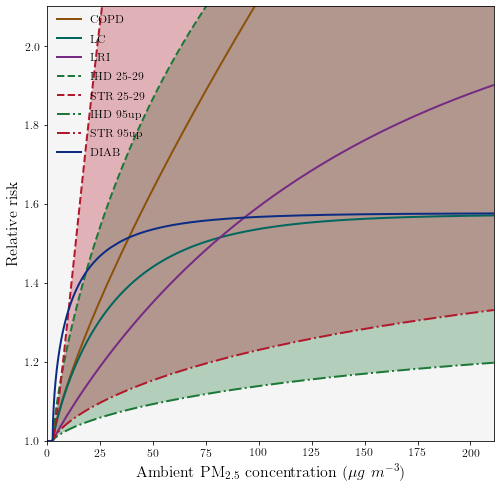

In [273]:
plt.figure(1, figsize=(8,8))
plt.subplot(1,1,1)
ax = plt.gca()
ax.set_facecolor('whitesmoke')
plt.xlabel('Ambient PM$_{2.5}$ concentration $({\mu}g$ $m^{-3})$', fontsize=16)
plt.ylabel('Relative risk', fontsize=16)
ax.set_xlim((0.0, 211.0))
ax.set_ylim((1.0, 2.1))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot(dict_gbd2019_ier['rr_gbd2019_conc'], dict_gbd2019_ier['rr_gbd2019_copd_mean'], color='#8c510a', label='GBD2016 COPD', linewidth=2)
plt.plot(dict_gbd2019_ier['rr_gbd2019_conc'], dict_gbd2019_ier['rr_gbd2019_lc_mean'], color='#01665e', label='GBD2016 LC', linewidth=2)
plt.plot(dict_gbd2019_ier['rr_gbd2019_conc'], dict_gbd2019_ier['rr_gbd2019_lri_mean'], color='#762a83', label='GBD2016 LRI', linewidth=2)
plt.plot(dict_gbd2019_ier['rr_gbd2019_conc'], dict_gbd2019_ier['rr_gbd2019_ihd_mean_25_29'], color='#1b7837', label='GBD2016 IHD', linewidth=2, linestyle='--')
plt.plot(dict_gbd2019_ier['rr_gbd2019_conc'], dict_gbd2019_ier['rr_gbd2019_str_mean_25_29'], color='#b2182b', label='GBD2016 STR', linewidth=2, linestyle='--')
plt.plot(dict_gbd2019_ier['rr_gbd2019_conc'], dict_gbd2019_ier['rr_gbd2019_ihd_mean_95up'], color='#1b7837', label='GBD2016 IHD', linewidth=2, linestyle='-.')
plt.plot(dict_gbd2019_ier['rr_gbd2019_conc'], dict_gbd2019_ier['rr_gbd2019_str_mean_95up'], color='#b2182b', label='GBD2016 STR', linewidth=2, linestyle='-.')
plt.fill_between(dict_gbd2019_ier['rr_gbd2019_conc'], dict_gbd2019_ier['rr_gbd2019_ihd_mean_25_29'], dict_gbd2019_ier['rr_gbd2019_ihd_mean_95up'], alpha=.3, facecolor='#1b7837')
plt.fill_between(dict_gbd2019_ier['rr_gbd2019_conc'], dict_gbd2019_ier['rr_gbd2019_str_mean_25_29'], dict_gbd2019_ier['rr_gbd2019_str_mean_95up'], alpha=.3, facecolor='#b2182b')
plt.plot(dict_gbd2019_ier['rr_gbd2019_conc'], dict_gbd2019_ier['rr_gbd2019_diab_mean'], color='#0c2c84', label='GBD2016 DIAB', linewidth=2)
gbd2019_leg_copd = mlines.Line2D([], [], color='#8c510a', marker='_', markeredgewidth=0, markersize=5, label='COPD', linewidth=2)
gbd2019_leg_lc = mlines.Line2D([], [], color='#01665e', marker='_', markeredgewidth=0, markersize=5, label='LC', linewidth=2)
gbd2019_leg_lri = mlines.Line2D([], [], color='#762a83', marker='_', markeredgewidth=0, markersize=5, label='LRI', linewidth=2)
gbd2019_leg_ihd_25_29 = mlines.Line2D([], [], color='#1b7837', marker='_', markeredgewidth=0, markersize=5, label='IHD 25-29', linewidth=2, linestyle='--')
gbd2019_leg_str_25_29 = mlines.Line2D([], [], color='#b2182b', marker='_', markeredgewidth=0, markersize=5, label='STR 25-29', linewidth=2, linestyle='--')
gbd2019_leg_ihd_95up = mlines.Line2D([], [], color='#1b7837', marker='_', markeredgewidth=0, markersize=5, label='IHD 95up', linewidth=2, linestyle='-.')
gbd2019_leg_str_95up = mlines.Line2D([], [], color='#b2182b', marker='_', markeredgewidth=0, markersize=5, label='STR 95up', linewidth=2, linestyle='-.')
gbd2019_leg_diab = mlines.Line2D([], [], color='#0c2c84', marker='_', markeredgewidth=0, markersize=5, label='DIAB', linewidth=2)
plt.legend(fontsize=12, fancybox=True, loc='upper center', bbox_to_anchor=(0.12, 1.01), ncol=1, frameon=False,
           handles=[gbd2019_leg_copd, gbd2019_leg_lc, gbd2019_leg_lri, gbd2019_leg_ihd_25_29, gbd2019_leg_str_25_29, gbd2019_leg_ihd_95up, gbd2019_leg_str_95up, gbd2019_leg_diab])
#plt.savefig('/nfs/a68/earlacoa/png/gbd2019_risks.png', dpi=700, alpha=True, bbox_inches='tight')
plt.show()

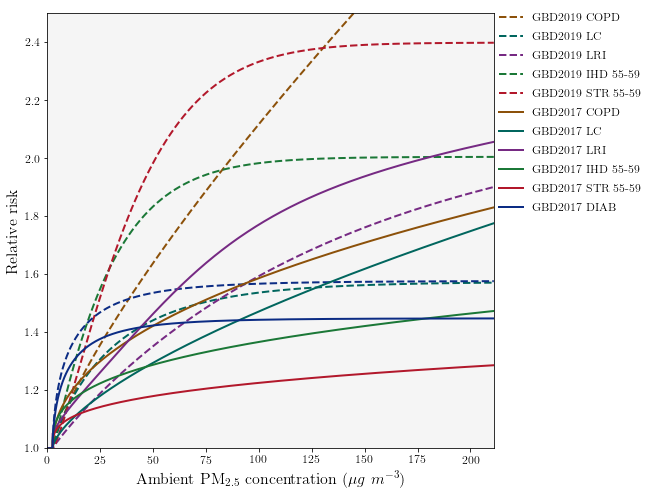

In [278]:
plt.figure(1, figsize=(8,8))
plt.subplot(1,1,1)
ax = plt.gca()
ax.set_facecolor('whitesmoke')
plt.xlabel('Ambient PM$_{2.5}$ concentration $({\mu}g$ $m^{-3})$', fontsize=16)
plt.ylabel('Relative risk', fontsize=16)
ax.set_xlim((0.0, 211.0))
ax.set_ylim((1.0, 2.5))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot(dict_gbd2019_ier['rr_gbd2019_conc'], dict_gbd2019_ier['rr_gbd2019_copd_mean'], color='#8c510a', label='GBD2019 COPD', linestyle='--', linewidth=2)
plt.plot(dict_gbd2019_ier['rr_gbd2019_conc'], dict_gbd2019_ier['rr_gbd2019_lc_mean'], color='#01665e', label='GBD2019 LC', linestyle='--', linewidth=2)
plt.plot(dict_gbd2019_ier['rr_gbd2019_conc'], dict_gbd2019_ier['rr_gbd2019_lri_mean'], color='#762a83', label='GBD2019 LRI', linestyle='--', linewidth=2)
plt.plot(dict_gbd2019_ier['rr_gbd2019_conc'], dict_gbd2019_ier['rr_gbd2019_ihd_mean_55_59'], color='#1b7837', label='GBD2019 IHD', linestyle='--', linewidth=2)
plt.plot(dict_gbd2019_ier['rr_gbd2019_conc'], dict_gbd2019_ier['rr_gbd2019_str_mean_55_59'], color='#b2182b', label='GBD2019 STR', linestyle='--', linewidth=2)
plt.plot(dict_gbd2019_ier['rr_gbd2019_conc'], dict_gbd2019_ier['rr_gbd2019_diab_mean'], color='#0c2c84', label='GBD2019 DIAB', linestyle='--', linewidth=2)
plt.plot(dict_gbd2017_ier['rr_gbd2017_conc'], dict_gbd2017_ier['rr_gbd2017_copd_mean'], color='#8c510a', label='GBD2019 COPD', linewidth=2)
plt.plot(dict_gbd2017_ier['rr_gbd2017_conc'], dict_gbd2017_ier['rr_gbd2017_lc_mean'], color='#01665e', label='GBD2019 LC', linewidth=2)
plt.plot(dict_gbd2017_ier['rr_gbd2017_conc'], dict_gbd2017_ier['rr_gbd2017_lri_mean'], color='#762a83', label='GBD2019 LRI', linewidth=2)
plt.plot(dict_gbd2017_ier['rr_gbd2017_conc'], dict_gbd2017_ier['rr_gbd2017_ihd_mean_55_59'], color='#1b7837', label='GBD2019 IHD', linewidth=2)
plt.plot(dict_gbd2017_ier['rr_gbd2017_conc'], dict_gbd2017_ier['rr_gbd2017_str_mean_55_59'], color='#b2182b', label='GBD2019 STR', linewidth=2)
plt.plot(dict_gbd2017_ier['rr_gbd2017_conc'], dict_gbd2017_ier['rr_gbd2017_diab_mean'], color='#0c2c84', label='GBD2019 DIAB', linewidth=2)
gbd2019_leg_copd = mlines.Line2D([], [], color='#8c510a', linestyle='--', markeredgewidth=0, markersize=5, label='GBD2019 COPD', linewidth=2)
gbd2019_leg_lc = mlines.Line2D([], [], color='#01665e', linestyle='--', markeredgewidth=0, markersize=5, label='GBD2019 LC', linewidth=2)
gbd2019_leg_lri = mlines.Line2D([], [], color='#762a83', linestyle='--', markeredgewidth=0, markersize=5, label='GBD2019 LRI', linewidth=2)
gbd2019_leg_ihd = mlines.Line2D([], [], color='#1b7837', linestyle='--', markeredgewidth=0, markersize=5, label='GBD2019 IHD 55-59', linewidth=2)
gbd2019_leg_str = mlines.Line2D([], [], color='#b2182b', linestyle='--', markeredgewidth=0, markersize=5, label='GBD2019 STR 55-59', linewidth=2)
gbd2017_leg_copd = mlines.Line2D([], [], color='#8c510a', marker='_', markeredgewidth=0, markersize=5, label='GBD2017 COPD', linewidth=2)
gbd2017_leg_lc = mlines.Line2D([], [], color='#01665e', marker='_', markeredgewidth=0, markersize=5, label='GBD2017 LC', linewidth=2)
gbd2017_leg_lri = mlines.Line2D([], [], color='#762a83', marker='_', markeredgewidth=0, markersize=5, label='GBD2017 LRI', linewidth=2)
gbd2017_leg_ihd = mlines.Line2D([], [], color='#1b7837', marker='_', markeredgewidth=0, markersize=5, label='GBD2017 IHD 55-59', linewidth=2)
gbd2017_leg_str = mlines.Line2D([], [], color='#b2182b', marker='_', markeredgewidth=0, markersize=5, label='GBD2017 STR 55-59', linewidth=2)
gbd2017_leg_diab = mlines.Line2D([], [], color='#0c2c84', marker='_', markeredgewidth=0, markersize=5, label='GBD2017 DIAB', linewidth=2)
plt.legend(fontsize=12, fancybox=True, loc='upper center', bbox_to_anchor=(1.17, 1.03), ncol=1, frameon=False,
           handles=[gbd2019_leg_copd, gbd2019_leg_lc, gbd2019_leg_lri, gbd2019_leg_ihd, gbd2019_leg_str, gbd2017_leg_copd, gbd2017_leg_lc, gbd2017_leg_lri, gbd2017_leg_ihd, gbd2017_leg_str, gbd2017_leg_diab])
#plt.savefig('/nfs/a68/earlacoa/png/compare_gbd2017_gbd2019.png', dpi=700, alpha=True, bbox_inches='tight')
plt.show()

### GBD2017

In [866]:
# COPD
# IHD
# stroke (ischemic and hemorrhagic)
# Diabetes mellitus type 2
# lower respiratory infections
# Tracheal, bronchus, and lung cancer

# LCC for mean and upper is 2.4 ugm-3, for lower is 5.8 ugm-3
lcc_mean = 2.4+0.1 # plus 0.1 so risk = 1.0 inclusive of lcc
lcc_lower = 5.8+0.1 # plus 0.1 so risk = 1.0 inclusive of lcc
lcc_upper = 2.4+0.1 # plus 0.1 so risk = 1.0 inclusive of lcc

In [867]:
# use the 5 ugm-3 increment coefficient to create a health function for each 0.1 ugm3 increment
import tabula
df_lri = tabula.read_pdf("/nfs/a68/earlacoa/health/GBD2017/gbd2017-si1.pdf", pages='307',
               pandas_options={'skiprows': 4, 'usecols': [0], 'nrows': 40})
df_lc_part1 = tabula.read_pdf("/nfs/a68/earlacoa/health/GBD2017/gbd2017-si1.pdf", pages='307',
               pandas_options={'skiprows': 44, 'usecols': [0], 'nrows': 40})
df_lc_part2 = tabula.read_pdf("/nfs/a68/earlacoa/health/GBD2017/gbd2017-si1.pdf", pages='308',
               pandas_options={'skiprows': 4, 'usecols': [0], 'nrows': 22})
df_copd_part1 = tabula.read_pdf("/nfs/a68/earlacoa/health/GBD2017/gbd2017-si1.pdf", pages='309',
               pandas_options={'skiprows': 48, 'usecols': [0], 'nrows': 40})
df_copd_part2 = tabula.read_pdf("/nfs/a68/earlacoa/health/GBD2017/gbd2017-si1.pdf", pages='310',
               pandas_options={'skiprows': 4, 'usecols': [0], 'nrows': 26})
df_diab = tabula.read_pdf("/nfs/a68/earlacoa/health/GBD2017/gbd2017-si1.pdf", pages='310',
               pandas_options={'skiprows': 30, 'usecols': [0], 'nrows': 40})
df_ihd_part1 = tabula.read_pdf("/nfs/a68/earlacoa/health/GBD2017/gbd2017-si1.pdf", pages='308',
               pandas_options={'skiprows': 26, 'usecols': [0,1,2,3,4,5,6,7,8,9,10,11], 'nrows': 40})
df_ihd_part2 = tabula.read_pdf("/nfs/a68/earlacoa/health/GBD2017/gbd2017-si1.pdf", pages='309',
               pandas_options={'skiprows': 4, 'usecols': [0,1,2,3,4,5,6,7,8,9,10,11], 'nrows': 4})
df_str = tabula.read_pdf("/nfs/a68/earlacoa/health/GBD2017/gbd2017-si1.pdf", pages='309',
               pandas_options={'skiprows': 8, 'usecols': [0,1,2,3,4,5,6,7,8,9,10,11], 'nrows': 40})

In [868]:
# means are in even numbers
df_lri.columns = ['mean']
df_lri['mean'] = df_lri['mean'].str.replace('Lower respiratory infections' , '')
df_lri['mean'] = df_lri['mean'].str.replace('Both Both' , '')

df_lc_part1.columns = ['mean']
df_lc_part1['mean'] = df_lc_part1['mean'].str.replace('Tracheal, bronchus, and lung cancer' , '')
df_lc_part1['mean'] = df_lc_part1['mean'].str.replace('Both Both' , '')
df_lc_part2.columns = ['mean']
df_lc_part2['mean'] = df_lc_part2['mean'].str.replace('Tracheal, bronchus, and lung cancer' , '')
df_lc_part2['mean'] = df_lc_part2['mean'].str.replace('Both Both' , '')

df_copd_part1.columns = ['mean']
df_copd_part1['mean'] = df_copd_part1['mean'].str.replace('Chronic obstructive pulmonary disease' , '')
df_copd_part1['mean'] = df_copd_part1['mean'].str.replace('Both Both' , '')
df_copd_part2.columns = ['mean']
df_copd_part2['mean'] = df_copd_part2['mean'].str.replace('Chronic obstructive pulmonary disease' , '')
df_copd_part2['mean'] = df_copd_part2['mean'].str.replace('Both Both' , '')

df_diab.columns = ['mean']
df_diab['mean'] = df_diab['mean'].str.replace('Diabetes mellitus type 2' , '')
df_diab['mean'] = df_diab['mean'].str.replace('Both Both' , '')

df_ihd_part1['(1.0 to 1.0)'] = df_ihd_part1['(1.0 to 1.0)'].str.replace('Ischaemic heart disease' , '')
df_ihd_part1['(1.0 to 1.0)'] = df_ihd_part1['(1.0 to 1.0)'].str.replace('Both Both' , '')
df_ihd_part2['Ambient particulate matter pollution (PM2.5)'] = df_ihd_part2['Ambient particulate matter pollution (PM2.5)'].str.replace('Ischaemic heart disease' , '')
df_ihd_part2['Ambient particulate matter pollution (PM2.5)'] = df_ihd_part2['Ambient particulate matter pollution (PM2.5)'].str.replace('Both Both' , '')

df_str['(1.0 to 1.0) (1.0 to 1.0) (1.0 to 1.0) (1.0 to 1.0) (1.0 to 1.0)'] = df_str['(1.0 to 1.0) (1.0 to 1.0) (1.0 to 1.0) (1.0 to 1.0) (1.0 to 1.0)'].str.replace('Stroke' , '')
df_str['(1.0 to 1.0) (1.0 to 1.0) (1.0 to 1.0) (1.0 to 1.0) (1.0 to 1.0)'] = df_str['(1.0 to 1.0) (1.0 to 1.0) (1.0 to 1.0) (1.0 to 1.0) (1.0 to 1.0)'].str.replace('Both Both' , '')

In [869]:
df = df_lri['mean'].str.split(" ", n=2, expand=True)
lri_pm25 = pd.DataFrame(df[1].iloc[::2])
lri_mean = pd.DataFrame(df[0].iloc[::2])
lri_upper = pd.DataFrame(df[2].iloc[1::2])
lri_upper[2] = lri_upper[2].str.replace(')' , '')
lri_lower = pd.DataFrame(df[0].iloc[1::2])
lri_lower[0] = lri_lower[0].str.replace('(' , '')
lri_pm25.reset_index(inplace=True)
lri_mean.reset_index(inplace=True)
lri_lower.reset_index(inplace=True)
lri_upper.reset_index(inplace=True)
lri_pm25.drop(lri_pm25.columns[[0]], axis=1, inplace=True)
lri_mean.drop(lri_mean.columns[[0]], axis=1, inplace=True)
lri_lower.drop(lri_lower.columns[[0]], axis=1, inplace=True)
lri_upper.drop(lri_upper.columns[[0]], axis=1, inplace=True)
df_gbd2017_lri = pd.concat([lri_pm25, lri_mean, lri_lower, lri_upper], axis=1)
df_gbd2017_lri.columns = ['pm25', 'mean', 'lower', 'upper']
df_gbd2017_lri = df_gbd2017_lri.astype('float')
df_gbd2017_lri

,pm25,mean,lower,upper
0,600.0,2.380,1.968,2.776
1,500.0,2.347,1.936,2.735
2,400.0,2.297,1.883,2.687
3,300.0,2.213,1.809,2.615
4,200.0,2.062,1.702,2.440
5,150.0,1.938,1.629,2.281
6,135.0,1.891,1.600,2.209
7,120.0,1.838,1.571,2.129
8,105.0,1.778,1.540,2.050
9,90.0,1.711,1.505,1.945


In [870]:
df = df_lc_part1['mean'].str.split(" ", n=2, expand=True)
lc_part1_pm25 = pd.DataFrame(df[1].iloc[::2])
lc_part1_mean = pd.DataFrame(df[0].iloc[::2])
lc_part1_upper = pd.DataFrame(df[2].iloc[1::2])
lc_part1_upper[2] = lc_part1_upper[2].str.replace(')' , '')
lc_part1_lower = pd.DataFrame(df[0].iloc[1::2])
lc_part1_lower[0] = lc_part1_lower[0].str.replace('(' , '')
lc_part1_pm25.reset_index(inplace=True)
lc_part1_mean.reset_index(inplace=True)
lc_part1_lower.reset_index(inplace=True)
lc_part1_upper.reset_index(inplace=True)
lc_part1_pm25.drop(lc_part1_pm25.columns[[0]], axis=1, inplace=True)
lc_part1_mean.drop(lc_part1_mean.columns[[0]], axis=1, inplace=True)
lc_part1_lower.drop(lc_part1_lower.columns[[0]], axis=1, inplace=True)
lc_part1_upper.drop(lc_part1_upper.columns[[0]], axis=1, inplace=True)
df_gbd2017_lc_part1 = pd.concat([lc_part1_pm25, lc_part1_mean, lc_part1_lower, lc_part1_upper], axis=1)
df_gbd2017_lc_part1.columns = ['pm25', 'mean', 'lower', 'upper']
df_gbd2017_lc_part1 = df_gbd2017_lc_part1.astype('float')

df = df_lc_part2['mean'].str.split(" ", n=2, expand=True)
lc_part2_pm25 = pd.DataFrame(df[1].iloc[::2])
lc_part2_mean = pd.DataFrame(df[0].iloc[::2])
lc_part2_upper = pd.DataFrame(df[2].iloc[1::2])
lc_part2_upper[2] = lc_part2_upper[2].str.replace(')' , '')
lc_part2_lower = pd.DataFrame(df[0].iloc[1::2])
lc_part2_lower[0] = lc_part2_lower[0].str.replace('(' , '')
lc_part2_pm25.reset_index(inplace=True)
lc_part2_mean.reset_index(inplace=True)
lc_part2_lower.reset_index(inplace=True)
lc_part2_upper.reset_index(inplace=True)
lc_part2_pm25.drop(lc_part2_pm25.columns[[0]], axis=1, inplace=True)
lc_part2_mean.drop(lc_part2_mean.columns[[0]], axis=1, inplace=True)
lc_part2_lower.drop(lc_part2_lower.columns[[0]], axis=1, inplace=True)
lc_part2_upper.drop(lc_part2_upper.columns[[0]], axis=1, inplace=True)
df_gbd2017_lc_part2 = pd.concat([lc_part2_pm25, lc_part2_mean, lc_part2_lower, lc_part2_upper], axis=1)
df_gbd2017_lc_part2.columns = ['pm25', 'mean', 'lower', 'upper']
df_gbd2017_lc_part2 = df_gbd2017_lc_part2.astype('float')

df_gbd2017_lc = df_gbd2017_lc_part1.append(df_gbd2017_lc_part2)
df_gbd2017_lc = df_gbd2017_lc.reset_index()
df_gbd2017_lc.drop(df_gbd2017_lc.columns[[0]], axis=1, inplace=True)
df_gbd2017_lc

,pm25,mean,lower,upper
0,600.0,2.541,2.222,2.868
1,500.0,2.369,2.074,2.675
2,400.0,2.185,1.919,2.469
3,300.0,1.982,1.748,2.229
4,200.0,1.753,1.560,1.958
5,150.0,1.622,1.454,1.802
6,135.0,1.580,1.421,1.754
7,120.0,1.536,1.385,1.701
8,105.0,1.490,1.348,1.648
9,90.0,1.442,1.309,1.588


In [871]:
df = df_copd_part1['mean'].str.split(" ", n=2, expand=True)
copd_part1_pm25 = pd.DataFrame(df[1].iloc[::2])
copd_part1_mean = pd.DataFrame(df[0].iloc[::2])
copd_part1_upper = pd.DataFrame(df[2].iloc[1::2])
copd_part1_upper[2] = copd_part1_upper[2].str.replace(')' , '')
copd_part1_lower = pd.DataFrame(df[0].iloc[1::2])
copd_part1_lower[0] = copd_part1_lower[0].str.replace('(' , '')
copd_part1_pm25.reset_index(inplace=True)
copd_part1_mean.reset_index(inplace=True)
copd_part1_lower.reset_index(inplace=True)
copd_part1_upper.reset_index(inplace=True)
copd_part1_pm25.drop(copd_part1_pm25.columns[[0]], axis=1, inplace=True)
copd_part1_mean.drop(copd_part1_mean.columns[[0]], axis=1, inplace=True)
copd_part1_lower.drop(copd_part1_lower.columns[[0]], axis=1, inplace=True)
copd_part1_upper.drop(copd_part1_upper.columns[[0]], axis=1, inplace=True)
df_gbd2017_copd_part1 = pd.concat([copd_part1_pm25, copd_part1_mean, copd_part1_lower, copd_part1_upper], axis=1)
df_gbd2017_copd_part1.columns = ['pm25', 'mean', 'lower', 'upper']
df_gbd2017_copd_part1 = df_gbd2017_copd_part1.astype('float')

df = df_copd_part2['mean'].str.split(" ", n=2, expand=True)
copd_part2_pm25 = pd.DataFrame(df[1].iloc[::2])
copd_part2_mean = pd.DataFrame(df[0].iloc[::2])
copd_part2_upper = pd.DataFrame(df[2].iloc[1::2])
copd_part2_upper[2] = copd_part2_upper[2].str.replace(')' , '')
copd_part2_lower = pd.DataFrame(df[0].iloc[1::2])
copd_part2_lower[0] = copd_part2_lower[0].str.replace('(' , '')
copd_part2_pm25.reset_index(inplace=True)
copd_part2_mean.reset_index(inplace=True)
copd_part2_lower.reset_index(inplace=True)
copd_part2_upper.reset_index(inplace=True)
copd_part2_pm25.drop(copd_part2_pm25.columns[[0]], axis=1, inplace=True)
copd_part2_mean.drop(copd_part2_mean.columns[[0]], axis=1, inplace=True)
copd_part2_lower.drop(copd_part2_lower.columns[[0]], axis=1, inplace=True)
copd_part2_upper.drop(copd_part2_upper.columns[[0]], axis=1, inplace=True)
df_gbd2017_copd_part2 = pd.concat([copd_part2_pm25, copd_part2_mean, copd_part2_lower, copd_part2_upper], axis=1)
df_gbd2017_copd_part2.columns = ['pm25', 'mean', 'lower', 'upper']
df_gbd2017_copd_part2 = df_gbd2017_copd_part2.astype('float')

df_gbd2017_copd = df_gbd2017_copd_part1.append(df_gbd2017_copd_part2)
df_gbd2017_copd = df_gbd2017_copd.reset_index()
df_gbd2017_copd.drop(df_gbd2017_copd.columns[[0]], axis=1, inplace=True)
df_gbd2017_copd

,pm25,mean,lower,upper
0,600.0,2.335,1.956,2.701
1,500.0,2.231,1.864,2.585
2,400.0,2.114,1.767,2.447
3,300.0,1.979,1.653,2.292
4,200.0,1.815,1.520,2.099
5,150.0,1.714,1.441,1.976
6,135.0,1.681,1.415,1.940
7,120.0,1.645,1.388,1.899
8,105.0,1.606,1.359,1.854
9,90.0,1.564,1.328,1.804


In [872]:
df = df_diab['mean'].str.split(" ", n=2, expand=True)
diab_pm25 = pd.DataFrame(df[1].iloc[::2])
diab_mean = pd.DataFrame(df[0].iloc[::2])
diab_upper = pd.DataFrame(df[2].iloc[1::2])
diab_upper[2] = diab_upper[2].str.replace(')' , '')
diab_lower = pd.DataFrame(df[0].iloc[1::2])
diab_lower[0] = diab_lower[0].str.replace('(' , '')
diab_pm25.reset_index(inplace=True)
diab_mean.reset_index(inplace=True)
diab_lower.reset_index(inplace=True)
diab_upper.reset_index(inplace=True)
diab_pm25.drop(diab_pm25.columns[[0]], axis=1, inplace=True)
diab_mean.drop(diab_mean.columns[[0]], axis=1, inplace=True)
diab_lower.drop(diab_lower.columns[[0]], axis=1, inplace=True)
diab_upper.drop(diab_upper.columns[[0]], axis=1, inplace=True)
df_gbd2017_diab = pd.concat([diab_pm25, diab_mean, diab_lower, diab_upper], axis=1)
df_gbd2017_diab.columns = ['pm25', 'mean', 'lower', 'upper']
df_gbd2017_diab = df_gbd2017_diab.astype('float')
df_gbd2017_diab

,pm25,mean,lower,upper
0,600.0,1.448,1.330,1.545
1,500.0,1.447,1.324,1.545
2,400.0,1.446,1.317,1.545
3,300.0,1.445,1.306,1.545
4,200.0,1.443,1.292,1.545
5,150.0,1.441,1.281,1.545
6,135.0,1.440,1.276,1.545
7,120.0,1.439,1.272,1.544
8,105.0,1.438,1.266,1.538
9,90.0,1.436,1.260,1.533


In [873]:
df = df_ihd_part1['(1.0 to 1.0)'].str.split(" ", n=40, expand=True)
ihd_part1_pm25 = pd.DataFrame(df[1].iloc[::2])
ihd_part1_mean_25_29 = pd.DataFrame(df[4].iloc[::2])
ihd_part1_mean_30_34 = pd.DataFrame(df[5].iloc[::2])
ihd_part1_mean_35_39 = pd.DataFrame(df[6].iloc[::2])
ihd_part1_mean_40_44 = pd.DataFrame(df[7].iloc[::2])
ihd_part1_mean_45_49 = pd.DataFrame(df[8].iloc[::2])
ihd_part1_mean_95up = pd.DataFrame(df[0].iloc[::2])
ihd_part1_upper_25_29 = pd.DataFrame(df[2].iloc[1::2])
ihd_part1_upper_25_29[2] = ihd_part1_upper_25_29[2].str.replace(')' , '')
ihd_part1_lower_25_29 = pd.DataFrame(df[0].iloc[1::2])
ihd_part1_lower_25_29[0] = ihd_part1_lower_25_29[0].str.replace('(' , '')
ihd_part1_upper_30_34 = pd.DataFrame(df[5].iloc[1::2])
ihd_part1_upper_30_34[5] = ihd_part1_upper_30_34[5].str.replace(')' , '')
ihd_part1_lower_30_34 = pd.DataFrame(df[3].iloc[1::2])
ihd_part1_lower_30_34[3] = ihd_part1_lower_30_34[3].str.replace('(' , '')
ihd_part1_upper_35_39 = pd.DataFrame(df[8].iloc[1::2])
ihd_part1_upper_35_39[8] = ihd_part1_upper_35_39[8].str.replace(')' , '')
ihd_part1_lower_35_39 = pd.DataFrame(df[6].iloc[1::2])
ihd_part1_lower_35_39[6] = ihd_part1_lower_35_39[6].str.replace('(' , '')
ihd_part1_upper_40_44 = pd.DataFrame(df[11].iloc[1::2])
ihd_part1_upper_40_44[11] = ihd_part1_upper_40_44[11].str.replace(')' , '')
ihd_part1_lower_40_44 = pd.DataFrame(df[9].iloc[1::2])
ihd_part1_lower_40_44[9] = ihd_part1_lower_40_44[9].str.replace('(' , '')
ihd_part1_upper_45_49 = pd.DataFrame(df[14].iloc[1::2])
ihd_part1_upper_45_49[14] = ihd_part1_upper_45_49[14].str.replace(')' , '')
ihd_part1_lower_45_49 = pd.DataFrame(df[12].iloc[1::2])
ihd_part1_lower_45_49[12] = ihd_part1_lower_45_49[12].str.replace('(' , '')
df = df_ihd_part1['Unnamed: 1'].str.split(" ", n=40, expand=True)
ihd_part1_mean_50_54 = pd.DataFrame(df[0].iloc[::2])
ihd_part1_upper_50_54 = pd.DataFrame(df[2].iloc[1::2])
ihd_part1_upper_50_54[2] = ihd_part1_upper_50_54[2].str.replace(')' , '')
ihd_part1_lower_50_54 = pd.DataFrame(df[0].iloc[1::2])
ihd_part1_lower_50_54[0] = ihd_part1_lower_50_54[0].str.replace('(' , '')
df = df_ihd_part1['Unnamed: 2'].str.split(" ", n=40, expand=True)
ihd_part1_mean_55_59 = pd.DataFrame(df[0].iloc[::2])
ihd_part1_upper_55_59 = pd.DataFrame(df[2].iloc[1::2])
ihd_part1_upper_55_59[2] = ihd_part1_upper_55_59[2].str.replace(')' , '')
ihd_part1_lower_55_59 = pd.DataFrame(df[0].iloc[1::2])
ihd_part1_lower_55_59[0] = ihd_part1_lower_55_59[0].str.replace('(' , '')
df = df_ihd_part1['Unnamed: 3'].str.split(" ", n=40, expand=True)
ihd_part1_upper_60_64 = pd.DataFrame(df[2].iloc[1::2])
ihd_part1_upper_60_64[2] = ihd_part1_upper_60_64[2].str.replace(')' , '')
ihd_part1_lower_60_64 = pd.DataFrame(df[0].iloc[1::2])
ihd_part1_lower_60_64[0] = ihd_part1_lower_60_64[0].str.replace('(' , '')
df = df_ihd_part1['Unnamed: 4']
ihd_part1_mean_60_64 = pd.DataFrame(df.iloc[::2])
df = df_ihd_part1['Unnamed: 5'].str.split(" ", n=40, expand=True)
ihd_part1_mean_65_69 = pd.DataFrame(df[0].iloc[::2])
ihd_part1_upper_65_69 = pd.DataFrame(df[2].iloc[1::2])
ihd_part1_upper_65_69[2] = ihd_part1_upper_65_69[2].str.replace(')' , '')
ihd_part1_lower_65_69 = pd.DataFrame(df[0].iloc[1::2])
ihd_part1_lower_65_69[0] = ihd_part1_lower_65_69[0].str.replace('(' , '')
df = df_ihd_part1['Unnamed: 6'].str.split(" ", n=40, expand=True)
ihd_part1_mean_70_74 = pd.DataFrame(df[0].iloc[::2])
ihd_part1_upper_70_74 = pd.DataFrame(df[2].iloc[1::2])
ihd_part1_upper_70_74[2] = ihd_part1_upper_70_74[2].str.replace(')' , '')
ihd_part1_lower_70_74 = pd.DataFrame(df[0].iloc[1::2])
ihd_part1_lower_70_74[0] = ihd_part1_lower_70_74[0].str.replace('(' , '')
df = df_ihd_part1['Unnamed: 7'].str.split(" ", n=40, expand=True)
ihd_part1_mean_75_79 = pd.DataFrame(df[0].iloc[::2])
ihd_part1_upper_75_79 = pd.DataFrame(df[2].iloc[1::2])
ihd_part1_upper_75_79[2] = ihd_part1_upper_75_79[2].str.replace(')' , '')
ihd_part1_lower_75_79 = pd.DataFrame(df[0].iloc[1::2])
ihd_part1_lower_75_79[0] = ihd_part1_lower_75_79[0].str.replace('(' , '')
df = df_ihd_part1['Unnamed: 8'].str.split(" ", n=40, expand=True)
ihd_part1_mean_80_84 = pd.DataFrame(df[0].iloc[::2])
ihd_part1_upper_80_84 = pd.DataFrame(df[2].iloc[1::2])
ihd_part1_upper_80_84[2] = ihd_part1_upper_80_84[2].str.replace(')' , '')
ihd_part1_lower_80_84 = pd.DataFrame(df[0].iloc[1::2])
ihd_part1_lower_80_84[0] = ihd_part1_lower_80_84[0].str.replace('(' , '')
df = df_ihd_part1['Unnamed: 9'].str.split(" ", n=40, expand=True)
ihd_part1_mean_85_89 = pd.DataFrame(df[0].iloc[::2])
ihd_part1_upper_85_89 = pd.DataFrame(df[2].iloc[1::2])
ihd_part1_upper_85_89[2] = ihd_part1_upper_85_89[2].str.replace(')' , '')
ihd_part1_lower_85_89 = pd.DataFrame(df[0].iloc[1::2])
ihd_part1_lower_85_89[0] = ihd_part1_lower_85_89[0].str.replace('(' , '')
df = df_ihd_part1['Unnamed: 10'].str.split(" ", n=40, expand=True)
ihd_part1_mean_90_94 = pd.DataFrame(df[0].iloc[::2])
ihd_part1_upper_90_94 = pd.DataFrame(df[2].iloc[1::2])
ihd_part1_upper_90_94[2] = ihd_part1_upper_90_94[2].str.replace(')' , '')
ihd_part1_lower_90_94 = pd.DataFrame(df[0].iloc[1::2])
ihd_part1_lower_90_94[0] = ihd_part1_lower_90_94[0].str.replace('(' , '')
df = df_ihd_part1['Unnamed: 11'].str.split(" ", n=40, expand=True)
ihd_part1_upper_95up = pd.DataFrame(df[2].iloc[1::2])
ihd_part1_upper_95up[2] = ihd_part1_upper_95up[2].str.replace(')' , '')
ihd_part1_lower_95up = pd.DataFrame(df[0].iloc[1::2])
ihd_part1_lower_95up[0] = ihd_part1_lower_95up[0].str.replace('(' , '')
ihd_part1_pm25.reset_index(inplace=True)
ihd_part1_mean_25_29.reset_index(inplace=True)
ihd_part1_lower_25_29.reset_index(inplace=True)
ihd_part1_upper_25_29.reset_index(inplace=True)
ihd_part1_mean_30_34.reset_index(inplace=True)
ihd_part1_lower_30_34.reset_index(inplace=True)
ihd_part1_upper_30_34.reset_index(inplace=True)
ihd_part1_mean_35_39.reset_index(inplace=True)
ihd_part1_lower_35_39.reset_index(inplace=True)
ihd_part1_upper_35_39.reset_index(inplace=True)
ihd_part1_mean_40_44.reset_index(inplace=True)
ihd_part1_lower_40_44.reset_index(inplace=True)
ihd_part1_upper_40_44.reset_index(inplace=True)
ihd_part1_mean_45_49.reset_index(inplace=True)
ihd_part1_lower_45_49.reset_index(inplace=True)
ihd_part1_upper_45_49.reset_index(inplace=True)
ihd_part1_mean_50_54.reset_index(inplace=True)
ihd_part1_lower_50_54.reset_index(inplace=True)
ihd_part1_upper_50_54.reset_index(inplace=True)
ihd_part1_mean_55_59.reset_index(inplace=True)
ihd_part1_lower_55_59.reset_index(inplace=True)
ihd_part1_upper_55_59.reset_index(inplace=True)
ihd_part1_mean_60_64.reset_index(inplace=True)
ihd_part1_lower_60_64.reset_index(inplace=True)
ihd_part1_upper_60_64.reset_index(inplace=True)
ihd_part1_mean_65_69.reset_index(inplace=True)
ihd_part1_lower_65_69.reset_index(inplace=True)
ihd_part1_upper_65_69.reset_index(inplace=True)
ihd_part1_mean_70_74.reset_index(inplace=True)
ihd_part1_lower_70_74.reset_index(inplace=True)
ihd_part1_upper_70_74.reset_index(inplace=True)
ihd_part1_mean_75_79.reset_index(inplace=True)
ihd_part1_lower_75_79.reset_index(inplace=True)
ihd_part1_upper_75_79.reset_index(inplace=True)
ihd_part1_mean_80_84.reset_index(inplace=True)
ihd_part1_lower_80_84.reset_index(inplace=True)
ihd_part1_upper_80_84.reset_index(inplace=True)
ihd_part1_mean_85_89.reset_index(inplace=True)
ihd_part1_lower_85_89.reset_index(inplace=True)
ihd_part1_upper_85_89.reset_index(inplace=True)
ihd_part1_mean_90_94.reset_index(inplace=True)
ihd_part1_lower_90_94.reset_index(inplace=True)
ihd_part1_upper_90_94.reset_index(inplace=True)
ihd_part1_mean_95up.reset_index(inplace=True)
ihd_part1_lower_95up.reset_index(inplace=True)
ihd_part1_upper_95up.reset_index(inplace=True)
ihd_part1_pm25.drop(ihd_part1_pm25.columns[[0]], axis=1, inplace=True)
ihd_part1_mean_25_29.drop(ihd_part1_mean_25_29.columns[[0]], axis=1, inplace=True)
ihd_part1_lower_25_29.drop(ihd_part1_lower_25_29.columns[[0]], axis=1, inplace=True)
ihd_part1_upper_25_29.drop(ihd_part1_upper_25_29.columns[[0]], axis=1, inplace=True)
ihd_part1_mean_30_34.drop(ihd_part1_mean_30_34.columns[[0]], axis=1, inplace=True)
ihd_part1_lower_30_34.drop(ihd_part1_lower_30_34.columns[[0]], axis=1, inplace=True)
ihd_part1_upper_30_34.drop(ihd_part1_upper_30_34.columns[[0]], axis=1, inplace=True)
ihd_part1_mean_35_39.drop(ihd_part1_mean_35_39.columns[[0]], axis=1, inplace=True)
ihd_part1_lower_35_39.drop(ihd_part1_lower_35_39.columns[[0]], axis=1, inplace=True)
ihd_part1_upper_35_39.drop(ihd_part1_upper_35_39.columns[[0]], axis=1, inplace=True)
ihd_part1_mean_40_44.drop(ihd_part1_mean_40_44.columns[[0]], axis=1, inplace=True)
ihd_part1_lower_40_44.drop(ihd_part1_lower_40_44.columns[[0]], axis=1, inplace=True)
ihd_part1_upper_40_44.drop(ihd_part1_upper_40_44.columns[[0]], axis=1, inplace=True)
ihd_part1_mean_45_49.drop(ihd_part1_mean_45_49.columns[[0]], axis=1, inplace=True)
ihd_part1_lower_45_49.drop(ihd_part1_lower_45_49.columns[[0]], axis=1, inplace=True)
ihd_part1_upper_45_49.drop(ihd_part1_upper_45_49.columns[[0]], axis=1, inplace=True)
ihd_part1_mean_50_54.drop(ihd_part1_mean_50_54.columns[[0]], axis=1, inplace=True)
ihd_part1_lower_50_54.drop(ihd_part1_lower_50_54.columns[[0]], axis=1, inplace=True)
ihd_part1_upper_50_54.drop(ihd_part1_upper_50_54.columns[[0]], axis=1, inplace=True)
ihd_part1_mean_55_59.drop(ihd_part1_mean_55_59.columns[[0]], axis=1, inplace=True)
ihd_part1_lower_55_59.drop(ihd_part1_lower_55_59.columns[[0]], axis=1, inplace=True)
ihd_part1_upper_55_59.drop(ihd_part1_upper_55_59.columns[[0]], axis=1, inplace=True)
ihd_part1_mean_60_64.drop(ihd_part1_mean_60_64.columns[[0]], axis=1, inplace=True)
ihd_part1_lower_60_64.drop(ihd_part1_lower_60_64.columns[[0]], axis=1, inplace=True)
ihd_part1_upper_60_64.drop(ihd_part1_upper_60_64.columns[[0]], axis=1, inplace=True)
ihd_part1_mean_65_69.drop(ihd_part1_mean_65_69.columns[[0]], axis=1, inplace=True)
ihd_part1_lower_65_69.drop(ihd_part1_lower_65_69.columns[[0]], axis=1, inplace=True)
ihd_part1_upper_65_69.drop(ihd_part1_upper_65_69.columns[[0]], axis=1, inplace=True)
ihd_part1_mean_70_74.drop(ihd_part1_mean_70_74.columns[[0]], axis=1, inplace=True)
ihd_part1_lower_70_74.drop(ihd_part1_lower_70_74.columns[[0]], axis=1, inplace=True)
ihd_part1_upper_70_74.drop(ihd_part1_upper_70_74.columns[[0]], axis=1, inplace=True)
ihd_part1_mean_75_79.drop(ihd_part1_mean_75_79.columns[[0]], axis=1, inplace=True)
ihd_part1_lower_75_79.drop(ihd_part1_lower_75_79.columns[[0]], axis=1, inplace=True)
ihd_part1_upper_75_79.drop(ihd_part1_upper_75_79.columns[[0]], axis=1, inplace=True)
ihd_part1_mean_80_84.drop(ihd_part1_mean_80_84.columns[[0]], axis=1, inplace=True)
ihd_part1_lower_80_84.drop(ihd_part1_lower_80_84.columns[[0]], axis=1, inplace=True)
ihd_part1_upper_80_84.drop(ihd_part1_upper_80_84.columns[[0]], axis=1, inplace=True)
ihd_part1_mean_85_89.drop(ihd_part1_mean_85_89.columns[[0]], axis=1, inplace=True)
ihd_part1_lower_85_89.drop(ihd_part1_lower_85_89.columns[[0]], axis=1, inplace=True)
ihd_part1_upper_85_89.drop(ihd_part1_upper_85_89.columns[[0]], axis=1, inplace=True)
ihd_part1_mean_90_94.drop(ihd_part1_mean_90_94.columns[[0]], axis=1, inplace=True)
ihd_part1_lower_90_94.drop(ihd_part1_lower_90_94.columns[[0]], axis=1, inplace=True)
ihd_part1_upper_90_94.drop(ihd_part1_upper_90_94.columns[[0]], axis=1, inplace=True)
ihd_part1_mean_95up.drop(ihd_part1_mean_95up.columns[[0]], axis=1, inplace=True)
ihd_part1_lower_95up.drop(ihd_part1_lower_95up.columns[[0]], axis=1, inplace=True)
ihd_part1_upper_95up.drop(ihd_part1_upper_95up.columns[[0]], axis=1, inplace=True)
df_gbd2017_ihd_part1 = pd.concat([ihd_part1_pm25, ihd_part1_mean_25_29, ihd_part1_lower_25_29, ihd_part1_upper_25_29, ihd_part1_mean_30_34, ihd_part1_lower_30_34, ihd_part1_upper_30_34, ihd_part1_mean_35_39, ihd_part1_lower_35_39, ihd_part1_upper_35_39, ihd_part1_mean_40_44, ihd_part1_lower_40_44, ihd_part1_upper_40_44, ihd_part1_mean_45_49, ihd_part1_lower_45_49, ihd_part1_upper_45_49, ihd_part1_mean_50_54, ihd_part1_lower_50_54, ihd_part1_upper_50_54, ihd_part1_mean_55_59, ihd_part1_lower_55_59, ihd_part1_upper_55_59, ihd_part1_mean_60_64, ihd_part1_lower_60_64, ihd_part1_upper_60_64, ihd_part1_mean_65_69, ihd_part1_lower_65_69, ihd_part1_upper_65_69, ihd_part1_mean_70_74, ihd_part1_lower_70_74, ihd_part1_upper_70_74, ihd_part1_mean_75_79, ihd_part1_lower_75_79, ihd_part1_upper_75_79, ihd_part1_mean_80_84, ihd_part1_lower_80_84, ihd_part1_upper_80_84, ihd_part1_mean_85_89, ihd_part1_lower_85_89, ihd_part1_upper_85_89, ihd_part1_mean_90_94, ihd_part1_lower_90_94, ihd_part1_upper_90_94, ihd_part1_mean_95up, ihd_part1_lower_95up, ihd_part1_upper_95up], axis=1)
df_gbd2017_ihd_part1.columns = ['pm25', 'mean_25_29', 'lower_25_29', 'upper_25_29', 'mean_30_34', 'lower_30_34', 'upper_30_34', 'mean_35_39', 'lower_35_39', 'upper_35_39', 'mean_40_44', 'lower_40_44', 'upper_40_44', 'mean_45_49', 'lower_45_49', 'upper_45_49', 'mean_50_54', 'lower_50_54', 'upper_50_54', 'mean_55_59', 'lower_55_59', 'upper_55_59', 'mean_60_64', 'lower_60_64', 'upper_60_64', 'mean_65_69', 'lower_65_69', 'upper_65_69', 'mean_70_74', 'lower_70_74', 'upper_70_74', 'mean_75_79', 'lower_75_79', 'upper_75_79', 'mean_80_84', 'lower_80_84', 'upper_80_84', 'mean_85_89', 'lower_85_89', 'upper_85_89', 'mean_90_94', 'lower_90_94', 'upper_90_94', 'mean_95up', 'lower_95up', 'upper_95up']
df_gbd2017_ihd_part1 = df_gbd2017_ihd_part1.astype('float')

df = df_ihd_part2['Ambient particulate matter pollution (PM2.5)'].str.split(" ", n=40, expand=True)
ihd_part2_pm25 = pd.DataFrame(df[1].iloc[::2])
ihd_part2_mean_25_29 = pd.DataFrame(df[4].iloc[::2])
ihd_part2_mean_30_34 = pd.DataFrame(df[5].iloc[::2])
ihd_part2_mean_35_39 = pd.DataFrame(df[6].iloc[::2])
ihd_part2_mean_40_44 = pd.DataFrame(df[7].iloc[::2])
ihd_part2_mean_45_49 = pd.DataFrame(df[8].iloc[::2])
ihd_part2_mean_95up = pd.DataFrame(df[0].iloc[::2])
ihd_part2_upper_25_29 = pd.DataFrame(df[2].iloc[1::2])
ihd_part2_upper_25_29[2] = ihd_part2_upper_25_29[2].str.replace(')' , '')
ihd_part2_lower_25_29 = pd.DataFrame(df[0].iloc[1::2])
ihd_part2_lower_25_29[0] = ihd_part2_lower_25_29[0].str.replace('(' , '')
ihd_part2_upper_30_34 = pd.DataFrame(df[5].iloc[1::2])
ihd_part2_upper_30_34[5] = ihd_part2_upper_30_34[5].str.replace(')' , '')
ihd_part2_lower_30_34 = pd.DataFrame(df[3].iloc[1::2])
ihd_part2_lower_30_34[3] = ihd_part2_lower_30_34[3].str.replace('(' , '')
ihd_part2_upper_35_39 = pd.DataFrame(df[8].iloc[1::2])
ihd_part2_upper_35_39[8] = ihd_part2_upper_35_39[8].str.replace(')' , '')
ihd_part2_lower_35_39 = pd.DataFrame(df[6].iloc[1::2])
ihd_part2_lower_35_39[6] = ihd_part2_lower_35_39[6].str.replace('(' , '')
ihd_part2_upper_40_44 = pd.DataFrame(df[11].iloc[1::2])
ihd_part2_upper_40_44[11] = ihd_part2_upper_40_44[11].str.replace(')' , '')
ihd_part2_lower_40_44 = pd.DataFrame(df[9].iloc[1::2])
ihd_part2_lower_40_44[9] = ihd_part2_lower_40_44[9].str.replace('(' , '')
ihd_part2_upper_45_49 = pd.DataFrame(df[14].iloc[1::2])
ihd_part2_upper_45_49[14] = ihd_part2_upper_45_49[14].str.replace(')' , '')
ihd_part2_lower_45_49 = pd.DataFrame(df[12].iloc[1::2])
ihd_part2_lower_45_49[12] = ihd_part2_lower_45_49[12].str.replace('(' , '')
df = df_ihd_part2['Unnamed: 1'].str.split(" ", n=40, expand=True)
ihd_part2_mean_50_54 = pd.DataFrame(df[0].iloc[::2])
ihd_part2_upper_50_54 = pd.DataFrame(df[2].iloc[1::2])
ihd_part2_upper_50_54[2] = ihd_part2_upper_50_54[2].str.replace(')' , '')
ihd_part2_lower_50_54 = pd.DataFrame(df[0].iloc[1::2])
ihd_part2_lower_50_54[0] = ihd_part2_lower_50_54[0].str.replace('(' , '')
df = df_ihd_part2['Unnamed: 2'].str.split(" ", n=40, expand=True)
ihd_part2_mean_55_59 = pd.DataFrame(df[0].iloc[::2])
ihd_part2_upper_55_59 = pd.DataFrame(df[2].iloc[1::2])
ihd_part2_upper_55_59[2] = ihd_part2_upper_55_59[2].str.replace(')' , '')
ihd_part2_lower_55_59 = pd.DataFrame(df[0].iloc[1::2])
ihd_part2_lower_55_59[0] = ihd_part2_lower_55_59[0].str.replace('(' , '')
df = df_ihd_part2['Unnamed: 3'].str.split(" ", n=40, expand=True)
ihd_part2_upper_60_64 = pd.DataFrame(df[2].iloc[1::2])
ihd_part2_upper_60_64[2] = ihd_part2_upper_60_64[2].str.replace(')' , '')
ihd_part2_lower_60_64 = pd.DataFrame(df[0].iloc[1::2])
ihd_part2_lower_60_64[0] = ihd_part2_lower_60_64[0].str.replace('(' , '')
df = df_ihd_part2['Unnamed: 4']
ihd_part2_mean_60_64 = pd.DataFrame(df.iloc[::2])
df = df_ihd_part2['Unnamed: 5'].str.split(" ", n=40, expand=True)
ihd_part2_mean_65_69 = pd.DataFrame(df[0].iloc[::2])
ihd_part2_upper_65_69 = pd.DataFrame(df[2].iloc[1::2])
ihd_part2_upper_65_69[2] = ihd_part2_upper_65_69[2].str.replace(')' , '')
ihd_part2_lower_65_69 = pd.DataFrame(df[0].iloc[1::2])
ihd_part2_lower_65_69[0] = ihd_part2_lower_65_69[0].str.replace('(' , '')
df = df_ihd_part2['Unnamed: 6'].str.split(" ", n=40, expand=True)
ihd_part2_mean_70_74 = pd.DataFrame(df[0].iloc[::2])
ihd_part2_upper_70_74 = pd.DataFrame(df[2].iloc[1::2])
ihd_part2_upper_70_74[2] = ihd_part2_upper_70_74[2].str.replace(')' , '')
ihd_part2_lower_70_74 = pd.DataFrame(df[0].iloc[1::2])
ihd_part2_lower_70_74[0] = ihd_part2_lower_70_74[0].str.replace('(' , '')
df = df_ihd_part2['Unnamed: 7'].str.split(" ", n=40, expand=True)
ihd_part2_mean_75_79 = pd.DataFrame(df[0].iloc[::2])
ihd_part2_upper_75_79 = pd.DataFrame(df[2].iloc[1::2])
ihd_part2_upper_75_79[2] = ihd_part2_upper_75_79[2].str.replace(')' , '')
ihd_part2_lower_75_79 = pd.DataFrame(df[0].iloc[1::2])
ihd_part2_lower_75_79[0] = ihd_part2_lower_75_79[0].str.replace('(' , '')
df = df_ihd_part2['Unnamed: 8'].str.split(" ", n=40, expand=True)
ihd_part2_mean_80_84 = pd.DataFrame(df[0].iloc[::2])
ihd_part2_upper_80_84 = pd.DataFrame(df[2].iloc[1::2])
ihd_part2_upper_80_84[2] = ihd_part2_upper_80_84[2].str.replace(')' , '')
ihd_part2_lower_80_84 = pd.DataFrame(df[0].iloc[1::2])
ihd_part2_lower_80_84[0] = ihd_part2_lower_80_84[0].str.replace('(' , '')
df = df_ihd_part2['Unnamed: 9'].str.split(" ", n=40, expand=True)
ihd_part2_mean_85_89 = pd.DataFrame(df[0].iloc[::2])
ihd_part2_upper_85_89 = pd.DataFrame(df[2].iloc[1::2])
ihd_part2_upper_85_89[2] = ihd_part2_upper_85_89[2].str.replace(')' , '')
ihd_part2_lower_85_89 = pd.DataFrame(df[0].iloc[1::2])
ihd_part2_lower_85_89[0] = ihd_part2_lower_85_89[0].str.replace('(' , '')
df = df_ihd_part2['Unnamed: 10'].str.split(" ", n=40, expand=True)
ihd_part2_mean_90_94 = pd.DataFrame(df[0].iloc[::2])
ihd_part2_upper_90_94 = pd.DataFrame(df[2].iloc[1::2])
ihd_part2_upper_90_94[2] = ihd_part2_upper_90_94[2].str.replace(')' , '')
ihd_part2_lower_90_94 = pd.DataFrame(df[0].iloc[1::2])
ihd_part2_lower_90_94[0] = ihd_part2_lower_90_94[0].str.replace('(' , '')
df = df_ihd_part2['Unnamed: 11'].str.split(" ", n=40, expand=True)
ihd_part2_upper_95up = pd.DataFrame(df[2].iloc[1::2])
ihd_part2_upper_95up[2] = ihd_part2_upper_95up[2].str.replace(')' , '')
ihd_part2_lower_95up = pd.DataFrame(df[0].iloc[1::2])
ihd_part2_lower_95up[0] = ihd_part2_lower_95up[0].str.replace('(' , '')
ihd_part2_pm25.reset_index(inplace=True)
ihd_part2_mean_25_29.reset_index(inplace=True)
ihd_part2_lower_25_29.reset_index(inplace=True)
ihd_part2_upper_25_29.reset_index(inplace=True)
ihd_part2_mean_30_34.reset_index(inplace=True)
ihd_part2_lower_30_34.reset_index(inplace=True)
ihd_part2_upper_30_34.reset_index(inplace=True)
ihd_part2_mean_35_39.reset_index(inplace=True)
ihd_part2_lower_35_39.reset_index(inplace=True)
ihd_part2_upper_35_39.reset_index(inplace=True)
ihd_part2_mean_40_44.reset_index(inplace=True)
ihd_part2_lower_40_44.reset_index(inplace=True)
ihd_part2_upper_40_44.reset_index(inplace=True)
ihd_part2_mean_45_49.reset_index(inplace=True)
ihd_part2_lower_45_49.reset_index(inplace=True)
ihd_part2_upper_45_49.reset_index(inplace=True)
ihd_part2_mean_50_54.reset_index(inplace=True)
ihd_part2_lower_50_54.reset_index(inplace=True)
ihd_part2_upper_50_54.reset_index(inplace=True)
ihd_part2_mean_55_59.reset_index(inplace=True)
ihd_part2_lower_55_59.reset_index(inplace=True)
ihd_part2_upper_55_59.reset_index(inplace=True)
ihd_part2_mean_60_64.reset_index(inplace=True)
ihd_part2_lower_60_64.reset_index(inplace=True)
ihd_part2_upper_60_64.reset_index(inplace=True)
ihd_part2_mean_65_69.reset_index(inplace=True)
ihd_part2_lower_65_69.reset_index(inplace=True)
ihd_part2_upper_65_69.reset_index(inplace=True)
ihd_part2_mean_70_74.reset_index(inplace=True)
ihd_part2_lower_70_74.reset_index(inplace=True)
ihd_part2_upper_70_74.reset_index(inplace=True)
ihd_part2_mean_75_79.reset_index(inplace=True)
ihd_part2_lower_75_79.reset_index(inplace=True)
ihd_part2_upper_75_79.reset_index(inplace=True)
ihd_part2_mean_80_84.reset_index(inplace=True)
ihd_part2_lower_80_84.reset_index(inplace=True)
ihd_part2_upper_80_84.reset_index(inplace=True)
ihd_part2_mean_85_89.reset_index(inplace=True)
ihd_part2_lower_85_89.reset_index(inplace=True)
ihd_part2_upper_85_89.reset_index(inplace=True)
ihd_part2_mean_90_94.reset_index(inplace=True)
ihd_part2_lower_90_94.reset_index(inplace=True)
ihd_part2_upper_90_94.reset_index(inplace=True)
ihd_part2_mean_95up.reset_index(inplace=True)
ihd_part2_lower_95up.reset_index(inplace=True)
ihd_part2_upper_95up.reset_index(inplace=True)
ihd_part2_pm25.drop(ihd_part2_pm25.columns[[0]], axis=1, inplace=True)
ihd_part2_mean_25_29.drop(ihd_part2_mean_25_29.columns[[0]], axis=1, inplace=True)
ihd_part2_lower_25_29.drop(ihd_part2_lower_25_29.columns[[0]], axis=1, inplace=True)
ihd_part2_upper_25_29.drop(ihd_part2_upper_25_29.columns[[0]], axis=1, inplace=True)
ihd_part2_mean_30_34.drop(ihd_part2_mean_30_34.columns[[0]], axis=1, inplace=True)
ihd_part2_lower_30_34.drop(ihd_part2_lower_30_34.columns[[0]], axis=1, inplace=True)
ihd_part2_upper_30_34.drop(ihd_part2_upper_30_34.columns[[0]], axis=1, inplace=True)
ihd_part2_mean_35_39.drop(ihd_part2_mean_35_39.columns[[0]], axis=1, inplace=True)
ihd_part2_lower_35_39.drop(ihd_part2_lower_35_39.columns[[0]], axis=1, inplace=True)
ihd_part2_upper_35_39.drop(ihd_part2_upper_35_39.columns[[0]], axis=1, inplace=True)
ihd_part2_mean_40_44.drop(ihd_part2_mean_40_44.columns[[0]], axis=1, inplace=True)
ihd_part2_lower_40_44.drop(ihd_part2_lower_40_44.columns[[0]], axis=1, inplace=True)
ihd_part2_upper_40_44.drop(ihd_part2_upper_40_44.columns[[0]], axis=1, inplace=True)
ihd_part2_mean_45_49.drop(ihd_part2_mean_45_49.columns[[0]], axis=1, inplace=True)
ihd_part2_lower_45_49.drop(ihd_part2_lower_45_49.columns[[0]], axis=1, inplace=True)
ihd_part2_upper_45_49.drop(ihd_part2_upper_45_49.columns[[0]], axis=1, inplace=True)
ihd_part2_mean_50_54.drop(ihd_part2_mean_50_54.columns[[0]], axis=1, inplace=True)
ihd_part2_lower_50_54.drop(ihd_part2_lower_50_54.columns[[0]], axis=1, inplace=True)
ihd_part2_upper_50_54.drop(ihd_part2_upper_50_54.columns[[0]], axis=1, inplace=True)
ihd_part2_mean_55_59.drop(ihd_part2_mean_55_59.columns[[0]], axis=1, inplace=True)
ihd_part2_lower_55_59.drop(ihd_part2_lower_55_59.columns[[0]], axis=1, inplace=True)
ihd_part2_upper_55_59.drop(ihd_part2_upper_55_59.columns[[0]], axis=1, inplace=True)
ihd_part2_mean_60_64.drop(ihd_part2_mean_60_64.columns[[0]], axis=1, inplace=True)
ihd_part2_lower_60_64.drop(ihd_part2_lower_60_64.columns[[0]], axis=1, inplace=True)
ihd_part2_upper_60_64.drop(ihd_part2_upper_60_64.columns[[0]], axis=1, inplace=True)
ihd_part2_mean_65_69.drop(ihd_part2_mean_65_69.columns[[0]], axis=1, inplace=True)
ihd_part2_lower_65_69.drop(ihd_part2_lower_65_69.columns[[0]], axis=1, inplace=True)
ihd_part2_upper_65_69.drop(ihd_part2_upper_65_69.columns[[0]], axis=1, inplace=True)
ihd_part2_mean_70_74.drop(ihd_part2_mean_70_74.columns[[0]], axis=1, inplace=True)
ihd_part2_lower_70_74.drop(ihd_part2_lower_70_74.columns[[0]], axis=1, inplace=True)
ihd_part2_upper_70_74.drop(ihd_part2_upper_70_74.columns[[0]], axis=1, inplace=True)
ihd_part2_mean_75_79.drop(ihd_part2_mean_75_79.columns[[0]], axis=1, inplace=True)
ihd_part2_lower_75_79.drop(ihd_part2_lower_75_79.columns[[0]], axis=1, inplace=True)
ihd_part2_upper_75_79.drop(ihd_part2_upper_75_79.columns[[0]], axis=1, inplace=True)
ihd_part2_mean_80_84.drop(ihd_part2_mean_80_84.columns[[0]], axis=1, inplace=True)
ihd_part2_lower_80_84.drop(ihd_part2_lower_80_84.columns[[0]], axis=1, inplace=True)
ihd_part2_upper_80_84.drop(ihd_part2_upper_80_84.columns[[0]], axis=1, inplace=True)
ihd_part2_mean_85_89.drop(ihd_part2_mean_85_89.columns[[0]], axis=1, inplace=True)
ihd_part2_lower_85_89.drop(ihd_part2_lower_85_89.columns[[0]], axis=1, inplace=True)
ihd_part2_upper_85_89.drop(ihd_part2_upper_85_89.columns[[0]], axis=1, inplace=True)
ihd_part2_mean_90_94.drop(ihd_part2_mean_90_94.columns[[0]], axis=1, inplace=True)
ihd_part2_lower_90_94.drop(ihd_part2_lower_90_94.columns[[0]], axis=1, inplace=True)
ihd_part2_upper_90_94.drop(ihd_part2_upper_90_94.columns[[0]], axis=1, inplace=True)
ihd_part2_mean_95up.drop(ihd_part2_mean_95up.columns[[0]], axis=1, inplace=True)
ihd_part2_lower_95up.drop(ihd_part2_lower_95up.columns[[0]], axis=1, inplace=True)
ihd_part2_upper_95up.drop(ihd_part2_upper_95up.columns[[0]], axis=1, inplace=True)
df_gbd2017_ihd_part2 = pd.concat([ihd_part2_pm25, ihd_part2_mean_25_29, ihd_part2_lower_25_29, ihd_part2_upper_25_29, ihd_part2_mean_30_34, ihd_part2_lower_30_34, ihd_part2_upper_30_34, ihd_part2_mean_35_39, ihd_part2_lower_35_39, ihd_part2_upper_35_39, ihd_part2_mean_40_44, ihd_part2_lower_40_44, ihd_part2_upper_40_44, ihd_part2_mean_45_49, ihd_part2_lower_45_49, ihd_part2_upper_45_49, ihd_part2_mean_50_54, ihd_part2_lower_50_54, ihd_part2_upper_50_54, ihd_part2_mean_55_59, ihd_part2_lower_55_59, ihd_part2_upper_55_59, ihd_part2_mean_60_64, ihd_part2_lower_60_64, ihd_part2_upper_60_64, ihd_part2_mean_65_69, ihd_part2_lower_65_69, ihd_part2_upper_65_69, ihd_part2_mean_70_74, ihd_part2_lower_70_74, ihd_part2_upper_70_74, ihd_part2_mean_75_79, ihd_part2_lower_75_79, ihd_part2_upper_75_79, ihd_part2_mean_80_84, ihd_part2_lower_80_84, ihd_part2_upper_80_84, ihd_part2_mean_85_89, ihd_part2_lower_85_89, ihd_part2_upper_85_89, ihd_part2_mean_90_94, ihd_part2_lower_90_94, ihd_part2_upper_90_94, ihd_part2_mean_95up, ihd_part2_lower_95up, ihd_part2_upper_95up], axis=1)
df_gbd2017_ihd_part2.columns = ['pm25', 'mean_25_29', 'lower_25_29', 'upper_25_29', 'mean_30_34', 'lower_30_34', 'upper_30_34', 'mean_35_39', 'lower_35_39', 'upper_35_39', 'mean_40_44', 'lower_40_44', 'upper_40_44', 'mean_45_49', 'lower_45_49', 'upper_45_49', 'mean_50_54', 'lower_50_54', 'upper_50_54', 'mean_55_59', 'lower_55_59', 'upper_55_59', 'mean_60_64', 'lower_60_64', 'upper_60_64', 'mean_65_69', 'lower_65_69', 'upper_65_69', 'mean_70_74', 'lower_70_74', 'upper_70_74', 'mean_75_79', 'lower_75_79', 'upper_75_79', 'mean_80_84', 'lower_80_84', 'upper_80_84', 'mean_85_89', 'lower_85_89', 'upper_85_89', 'mean_90_94', 'lower_90_94', 'upper_90_94', 'mean_95up', 'lower_95up', 'upper_95up']
df_gbd2017_ihd_part2 = df_gbd2017_ihd_part2.astype('float')

df_gbd2017_ihd = df_gbd2017_ihd_part1.append(df_gbd2017_ihd_part2)
df_gbd2017_ihd = df_gbd2017_ihd.reset_index()
df_gbd2017_ihd.drop(df_gbd2017_ihd.columns[[0]], axis=1, inplace=True)
df_gbd2017_ihd['lower_60_64'] = df_gbd2017_ihd['lower_60_64'].fillna(1.0)
df_gbd2017_ihd['upper_60_64'] = df_gbd2017_ihd['upper_60_64'].fillna(1.0)
df_gbd2017_ihd

,pm25,mean_25_29,lower_25_29,upper_25_29,mean_30_34,lower_30_34,upper_30_34,mean_35_39,lower_35_39,upper_35_39,...,upper_80_84,mean_85_89,lower_85_89,upper_85_89,mean_90_94,lower_90_94,upper_90_94,mean_95up,lower_95up,upper_95up
0,600.0,2.244,1.922,2.608,2.142,1.848,2.464,2.033,1.780,2.343,...,1.384,1.249,1.191,1.309,1.193,1.151,1.241,1.141,1.108,1.174
1,500.0,2.166,1.852,2.523,2.073,1.784,2.395,1.971,1.726,2.279,...,1.368,1.237,1.179,1.297,1.184,1.142,1.232,1.134,1.101,1.168
2,400.0,2.076,1.770,2.427,1.993,1.708,2.317,1.901,1.663,2.201,...,1.351,1.223,1.165,1.282,1.174,1.131,1.222,1.127,1.094,1.161
3,300.0,1.971,1.678,2.305,1.898,1.622,2.217,1.816,1.585,2.110,...,1.329,1.206,1.149,1.264,1.161,1.119,1.208,1.117,1.085,1.152
4,200.0,1.838,1.562,2.163,1.779,1.515,2.080,1.710,1.493,1.989,...,1.302,1.184,1.128,1.241,1.144,1.103,1.190,1.106,1.073,1.139
5,150.0,1.754,1.492,2.069,1.703,1.452,1.992,1.643,1.433,1.914,...,1.283,1.170,1.115,1.226,1.133,1.094,1.179,1.098,1.066,1.132
6,135.0,1.726,1.466,2.036,1.677,1.430,1.965,1.620,1.413,1.889,...,1.277,1.165,1.110,1.221,1.129,1.090,1.176,1.095,1.064,1.129
7,120.0,1.695,1.439,2.000,1.649,1.408,1.935,1.595,1.394,1.860,...,1.270,1.160,1.106,1.215,1.125,1.086,1.171,1.092,1.061,1.126
8,105.0,1.661,1.413,1.963,1.619,1.383,1.904,1.567,1.373,1.829,...,1.262,1.154,1.101,1.209,1.121,1.082,1.167,1.089,1.058,1.122
9,90.0,1.624,1.382,1.921,1.585,1.356,1.860,1.537,1.347,1.794,...,1.252,1.147,1.094,1.202,1.115,1.078,1.161,1.085,1.055,1.119


In [874]:
df = df_str['(1.0 to 1.0) (1.0 to 1.0) (1.0 to 1.0) (1.0 to 1.0) (1.0 to 1.0)'].str.split(" ", n=40, expand=True)
str_pm25 = pd.DataFrame(df[1].iloc[::2])
str_mean_25_29 = pd.DataFrame(df[4].iloc[::2])
str_mean_30_34 = pd.DataFrame(df[5].iloc[::2])
str_mean_35_39 = pd.DataFrame(df[6].iloc[::2])
str_mean_40_44 = pd.DataFrame(df[7].iloc[::2])
str_mean_45_49 = pd.DataFrame(df[8].iloc[::2])
str_mean_95up = pd.DataFrame(df[0].iloc[::2])
str_upper_25_29 = pd.DataFrame(df[2].iloc[1::2])
str_upper_25_29[2] = str_upper_25_29[2].str.replace(')' , '')
str_lower_25_29 = pd.DataFrame(df[0].iloc[1::2])
str_lower_25_29[0] = str_lower_25_29[0].str.replace('(' , '')
str_upper_30_34 = pd.DataFrame(df[5].iloc[1::2])
str_upper_30_34[5] = str_upper_30_34[5].str.replace(')' , '')
str_lower_30_34 = pd.DataFrame(df[3].iloc[1::2])
str_lower_30_34[3] = str_lower_30_34[3].str.replace('(' , '')
str_upper_35_39 = pd.DataFrame(df[8].iloc[1::2])
str_upper_35_39[8] = str_upper_35_39[8].str.replace(')' , '')
str_lower_35_39 = pd.DataFrame(df[6].iloc[1::2])
str_lower_35_39[6] = str_lower_35_39[6].str.replace('(' , '')
str_upper_40_44 = pd.DataFrame(df[11].iloc[1::2])
str_upper_40_44[11] = str_upper_40_44[11].str.replace(')' , '')
str_lower_40_44 = pd.DataFrame(df[9].iloc[1::2])
str_lower_40_44[9] = str_lower_40_44[9].str.replace('(' , '')
str_upper_45_49 = pd.DataFrame(df[14].iloc[1::2])
str_upper_45_49[14] = str_upper_45_49[14].str.replace(')' , '')
str_lower_45_49 = pd.DataFrame(df[12].iloc[1::2])
str_lower_45_49[12] = str_lower_45_49[12].str.replace('(' , '')
df = df_str['(1.0 to 1.0)'].str.split(" ", n=40, expand=True)
str_mean_50_54 = pd.DataFrame(df[0].iloc[::2])
str_upper_50_54 = pd.DataFrame(df[2].iloc[1::2])
str_upper_50_54[2] = str_upper_50_54[2].str.replace(')' , '')
str_lower_50_54 = pd.DataFrame(df[0].iloc[1::2])
str_lower_50_54[0] = str_lower_50_54[0].str.replace('(' , '')
df = df_str['(1.0 to 1.0).1'].str.split(" ", n=40, expand=True)
str_mean_55_59 = pd.DataFrame(df[0].iloc[::2])
str_upper_55_59 = pd.DataFrame(df[2].iloc[1::2])
str_upper_55_59[2] = str_upper_55_59[2].str.replace(')' , '')
str_lower_55_59 = pd.DataFrame(df[0].iloc[1::2])
str_lower_55_59[0] = str_lower_55_59[0].str.replace('(' , '')
df = df_str['Unnamed: 3'].str.split(" ", n=40, expand=True)
str_upper_60_64 = pd.DataFrame(df[2].iloc[1::2])
str_upper_60_64[2] = str_upper_60_64[2].str.replace(')' , '')
str_lower_60_64 = pd.DataFrame(df[0].iloc[1::2])
str_lower_60_64[0] = str_lower_60_64[0].str.replace('(' , '')
df = df_str['(1.0 to 1.0).2']
str_mean_60_64 = pd.DataFrame(df.iloc[::2])
df = df_str['(1.0 to 1.0).3'].str.split(" ", n=40, expand=True)
str_mean_65_69 = pd.DataFrame(df[0].iloc[::2])
str_upper_65_69 = pd.DataFrame(df[2].iloc[1::2])
str_upper_65_69[2] = str_upper_65_69[2].str.replace(')' , '')
str_lower_65_69 = pd.DataFrame(df[0].iloc[1::2])
str_lower_65_69[0] = str_lower_65_69[0].str.replace('(' , '')
df = df_str['(1.0 to 1.0).4'].str.split(" ", n=40, expand=True)
str_mean_70_74 = pd.DataFrame(df[0].iloc[::2])
str_upper_70_74 = pd.DataFrame(df[2].iloc[1::2])
str_upper_70_74[2] = str_upper_70_74[2].str.replace(')' , '')
str_lower_70_74 = pd.DataFrame(df[0].iloc[1::2])
str_lower_70_74[0] = str_lower_70_74[0].str.replace('(' , '')
df = df_str['(1.0 to 1.0).5'].str.split(" ", n=40, expand=True)
str_mean_75_79 = pd.DataFrame(df[0].iloc[::2])
str_upper_75_79 = pd.DataFrame(df[2].iloc[1::2])
str_upper_75_79[2] = str_upper_75_79[2].str.replace(')' , '')
str_lower_75_79 = pd.DataFrame(df[0].iloc[1::2])
str_lower_75_79[0] = str_lower_75_79[0].str.replace('(' , '')
df = df_str['(1.0 to 1.0).6'].str.split(" ", n=40, expand=True)
str_mean_80_84 = pd.DataFrame(df[0].iloc[::2])
str_upper_80_84 = pd.DataFrame(df[2].iloc[1::2])
str_upper_80_84[2] = str_upper_80_84[2].str.replace(')' , '')
str_lower_80_84 = pd.DataFrame(df[0].iloc[1::2])
str_lower_80_84[0] = str_lower_80_84[0].str.replace('(' , '')
df = df_str['(1.0 to 1.0).7'].str.split(" ", n=40, expand=True)
str_mean_85_89 = pd.DataFrame(df[0].iloc[::2])
str_upper_85_89 = pd.DataFrame(df[2].iloc[1::2])
str_upper_85_89[2] = str_upper_85_89[2].str.replace(')' , '')
str_lower_85_89 = pd.DataFrame(df[0].iloc[1::2])
str_lower_85_89[0] = str_lower_85_89[0].str.replace('(' , '')
df = df_str['(1.0 to 1.0).8'].str.split(" ", n=40, expand=True)
str_mean_90_94 = pd.DataFrame(df[0].iloc[::2])
str_upper_90_94 = pd.DataFrame(df[2].iloc[1::2])
str_upper_90_94[2] = str_upper_90_94[2].str.replace(')' , '')
str_lower_90_94 = pd.DataFrame(df[0].iloc[1::2])
str_lower_90_94[0] = str_lower_90_94[0].str.replace('(' , '')
df = df_str['(1.0 to 1.0).9'].str.split(" ", n=40, expand=True)
str_upper_95up = pd.DataFrame(df[2].iloc[1::2])
str_upper_95up[2] = str_upper_95up[2].str.replace(')' , '')
str_lower_95up = pd.DataFrame(df[0].iloc[1::2])
str_lower_95up[0] = str_lower_95up[0].str.replace('(' , '')
str_pm25.reset_index(inplace=True)
str_mean_25_29.reset_index(inplace=True)
str_lower_25_29.reset_index(inplace=True)
str_upper_25_29.reset_index(inplace=True)
str_mean_30_34.reset_index(inplace=True)
str_lower_30_34.reset_index(inplace=True)
str_upper_30_34.reset_index(inplace=True)
str_mean_35_39.reset_index(inplace=True)
str_lower_35_39.reset_index(inplace=True)
str_upper_35_39.reset_index(inplace=True)
str_mean_40_44.reset_index(inplace=True)
str_lower_40_44.reset_index(inplace=True)
str_upper_40_44.reset_index(inplace=True)
str_mean_45_49.reset_index(inplace=True)
str_lower_45_49.reset_index(inplace=True)
str_upper_45_49.reset_index(inplace=True)
str_mean_50_54.reset_index(inplace=True)
str_lower_50_54.reset_index(inplace=True)
str_upper_50_54.reset_index(inplace=True)
str_mean_55_59.reset_index(inplace=True)
str_lower_55_59.reset_index(inplace=True)
str_upper_55_59.reset_index(inplace=True)
str_mean_60_64.reset_index(inplace=True)
str_lower_60_64.reset_index(inplace=True)
str_upper_60_64.reset_index(inplace=True)
str_mean_65_69.reset_index(inplace=True)
str_lower_65_69.reset_index(inplace=True)
str_upper_65_69.reset_index(inplace=True)
str_mean_70_74.reset_index(inplace=True)
str_lower_70_74.reset_index(inplace=True)
str_upper_70_74.reset_index(inplace=True)
str_mean_75_79.reset_index(inplace=True)
str_lower_75_79.reset_index(inplace=True)
str_upper_75_79.reset_index(inplace=True)
str_mean_80_84.reset_index(inplace=True)
str_lower_80_84.reset_index(inplace=True)
str_upper_80_84.reset_index(inplace=True)
str_mean_85_89.reset_index(inplace=True)
str_lower_85_89.reset_index(inplace=True)
str_upper_85_89.reset_index(inplace=True)
str_mean_90_94.reset_index(inplace=True)
str_lower_90_94.reset_index(inplace=True)
str_upper_90_94.reset_index(inplace=True)
str_mean_95up.reset_index(inplace=True)
str_lower_95up.reset_index(inplace=True)
str_upper_95up.reset_index(inplace=True)
str_pm25.drop(str_pm25.columns[[0]], axis=1, inplace=True)
str_mean_25_29.drop(str_mean_25_29.columns[[0]], axis=1, inplace=True)
str_lower_25_29.drop(str_lower_25_29.columns[[0]], axis=1, inplace=True)
str_upper_25_29.drop(str_upper_25_29.columns[[0]], axis=1, inplace=True)
str_mean_30_34.drop(str_mean_30_34.columns[[0]], axis=1, inplace=True)
str_lower_30_34.drop(str_lower_30_34.columns[[0]], axis=1, inplace=True)
str_upper_30_34.drop(str_upper_30_34.columns[[0]], axis=1, inplace=True)
str_mean_35_39.drop(str_mean_35_39.columns[[0]], axis=1, inplace=True)
str_lower_35_39.drop(str_lower_35_39.columns[[0]], axis=1, inplace=True)
str_upper_35_39.drop(str_upper_35_39.columns[[0]], axis=1, inplace=True)
str_mean_40_44.drop(str_mean_40_44.columns[[0]], axis=1, inplace=True)
str_lower_40_44.drop(str_lower_40_44.columns[[0]], axis=1, inplace=True)
str_upper_40_44.drop(str_upper_40_44.columns[[0]], axis=1, inplace=True)
str_mean_45_49.drop(str_mean_45_49.columns[[0]], axis=1, inplace=True)
str_lower_45_49.drop(str_lower_45_49.columns[[0]], axis=1, inplace=True)
str_upper_45_49.drop(str_upper_45_49.columns[[0]], axis=1, inplace=True)
str_mean_50_54.drop(str_mean_50_54.columns[[0]], axis=1, inplace=True)
str_lower_50_54.drop(str_lower_50_54.columns[[0]], axis=1, inplace=True)
str_upper_50_54.drop(str_upper_50_54.columns[[0]], axis=1, inplace=True)
str_mean_55_59.drop(str_mean_55_59.columns[[0]], axis=1, inplace=True)
str_lower_55_59.drop(str_lower_55_59.columns[[0]], axis=1, inplace=True)
str_upper_55_59.drop(str_upper_55_59.columns[[0]], axis=1, inplace=True)
str_mean_60_64.drop(str_mean_60_64.columns[[0]], axis=1, inplace=True)
str_lower_60_64.drop(str_lower_60_64.columns[[0]], axis=1, inplace=True)
str_upper_60_64.drop(str_upper_60_64.columns[[0]], axis=1, inplace=True)
str_mean_65_69.drop(str_mean_65_69.columns[[0]], axis=1, inplace=True)
str_lower_65_69.drop(str_lower_65_69.columns[[0]], axis=1, inplace=True)
str_upper_65_69.drop(str_upper_65_69.columns[[0]], axis=1, inplace=True)
str_mean_70_74.drop(str_mean_70_74.columns[[0]], axis=1, inplace=True)
str_lower_70_74.drop(str_lower_70_74.columns[[0]], axis=1, inplace=True)
str_upper_70_74.drop(str_upper_70_74.columns[[0]], axis=1, inplace=True)
str_mean_75_79.drop(str_mean_75_79.columns[[0]], axis=1, inplace=True)
str_lower_75_79.drop(str_lower_75_79.columns[[0]], axis=1, inplace=True)
str_upper_75_79.drop(str_upper_75_79.columns[[0]], axis=1, inplace=True)
str_mean_80_84.drop(str_mean_80_84.columns[[0]], axis=1, inplace=True)
str_lower_80_84.drop(str_lower_80_84.columns[[0]], axis=1, inplace=True)
str_upper_80_84.drop(str_upper_80_84.columns[[0]], axis=1, inplace=True)
str_mean_85_89.drop(str_mean_85_89.columns[[0]], axis=1, inplace=True)
str_lower_85_89.drop(str_lower_85_89.columns[[0]], axis=1, inplace=True)
str_upper_85_89.drop(str_upper_85_89.columns[[0]], axis=1, inplace=True)
str_mean_90_94.drop(str_mean_90_94.columns[[0]], axis=1, inplace=True)
str_lower_90_94.drop(str_lower_90_94.columns[[0]], axis=1, inplace=True)
str_upper_90_94.drop(str_upper_90_94.columns[[0]], axis=1, inplace=True)
str_mean_95up.drop(str_mean_95up.columns[[0]], axis=1, inplace=True)
str_lower_95up.drop(str_lower_95up.columns[[0]], axis=1, inplace=True)
str_upper_95up.drop(str_upper_95up.columns[[0]], axis=1, inplace=True)
df_gbd2017_str = pd.concat([str_pm25, str_mean_25_29, str_lower_25_29, str_upper_25_29, str_mean_30_34, str_lower_30_34, str_upper_30_34, str_mean_35_39, str_lower_35_39, str_upper_35_39, str_mean_40_44, str_lower_40_44, str_upper_40_44, str_mean_45_49, str_lower_45_49, str_upper_45_49, str_mean_50_54, str_lower_50_54, str_upper_50_54, str_mean_55_59, str_lower_55_59, str_upper_55_59, str_mean_60_64, str_lower_60_64, str_upper_60_64, str_mean_65_69, str_lower_65_69, str_upper_65_69, str_mean_70_74, str_lower_70_74, str_upper_70_74, str_mean_75_79, str_lower_75_79, str_upper_75_79, str_mean_80_84, str_lower_80_84, str_upper_80_84, str_mean_85_89, str_lower_85_89, str_upper_85_89, str_mean_90_94, str_lower_90_94, str_upper_90_94, str_mean_95up, str_lower_95up, str_upper_95up], axis=1)
df_gbd2017_str.columns = ['pm25', 'mean_25_29', 'lower_25_29', 'upper_25_29', 'mean_30_34', 'lower_30_34', 'upper_30_34', 'mean_35_39', 'lower_35_39', 'upper_35_39', 'mean_40_44', 'lower_40_44', 'upper_40_44', 'mean_45_49', 'lower_45_49', 'upper_45_49', 'mean_50_54', 'lower_50_54', 'upper_50_54', 'mean_55_59', 'lower_55_59', 'upper_55_59', 'mean_60_64', 'lower_60_64', 'upper_60_64', 'mean_65_69', 'lower_65_69', 'upper_65_69', 'mean_70_74', 'lower_70_74', 'upper_70_74', 'mean_75_79', 'lower_75_79', 'upper_75_79', 'mean_80_84', 'lower_80_84', 'upper_80_84', 'mean_85_89', 'lower_85_89', 'upper_85_89', 'mean_90_94', 'lower_90_94', 'upper_90_94', 'mean_95up', 'lower_95up', 'upper_95up']
df_gbd2017_str = df_gbd2017_str.astype('float')
df_gbd2017_str['lower_60_64'] = df_gbd2017_str['lower_60_64'].fillna(1.0)
df_gbd2017_str['upper_60_64'] = df_gbd2017_str['upper_60_64'].fillna(1.0)
df_gbd2017_str

,pm25,mean_25_29,lower_25_29,upper_25_29,mean_30_34,lower_30_34,upper_30_34,mean_35_39,lower_35_39,upper_35_39,...,upper_80_84,mean_85_89,lower_85_89,upper_85_89,mean_90_94,lower_90_94,upper_90_94,mean_95up,lower_95up,upper_95up
0,600.0,1.704,1.392,1.966,1.641,1.360,1.902,1.587,1.303,1.823,...,1.256,1.158,1.097,1.215,1.123,1.074,1.167,1.091,1.058,1.127
1,500.0,1.664,1.355,1.925,1.606,1.328,1.862,1.555,1.275,1.791,...,1.247,1.150,1.089,1.208,1.117,1.068,1.161,1.087,1.053,1.123
2,400.0,1.619,1.314,1.881,1.565,1.293,1.822,1.518,1.244,1.755,...,1.237,1.141,1.081,1.200,1.110,1.061,1.155,1.082,1.049,1.117
3,300.0,1.565,1.270,1.825,1.516,1.249,1.773,1.474,1.208,1.709,...,1.224,1.131,1.072,1.189,1.102,1.054,1.147,1.076,1.043,1.111
4,200.0,1.496,1.219,1.757,1.454,1.203,1.712,1.418,1.166,1.646,...,1.207,1.117,1.060,1.175,1.092,1.046,1.137,1.068,1.036,1.104
5,150.0,1.453,1.189,1.705,1.415,1.175,1.667,1.382,1.141,1.605,...,1.195,1.108,1.053,1.166,1.085,1.040,1.130,1.063,1.032,1.098
6,135.0,1.438,1.179,1.690,1.401,1.166,1.653,1.370,1.133,1.591,...,1.191,1.105,1.050,1.163,1.082,1.038,1.127,1.062,1.031,1.096
7,120.0,1.421,1.168,1.672,1.386,1.156,1.637,1.357,1.125,1.576,...,1.186,1.102,1.047,1.160,1.080,1.036,1.125,1.060,1.029,1.094
8,105.0,1.404,1.157,1.650,1.370,1.146,1.619,1.342,1.115,1.559,...,1.181,1.098,1.044,1.156,1.077,1.034,1.122,1.058,1.027,1.093
9,90.0,1.384,1.144,1.632,1.352,1.135,1.599,1.326,1.105,1.539,...,1.176,1.094,1.041,1.151,1.074,1.032,1.118,1.055,1.026,1.090


In [ ]:
np.set_printoptions(suppress=True) # print floats not scientific numbers

# Fitting the best line to data
# Testing hypothesis of whether slope (beta with a ^, as beta is estimated not known) is different to 0 
# Coefficients are these slopes
# Covariates vary alongside
# Least square regression is where everything above and below line has the error squared, so all are positive,
# and then sum and try to minimise 
# want to know whether the slope include 0

# Linear regression
# assumes that the errors are normally distributed (not that the data is normally distrbuted, data can be skewed)
# assumes that the errors are independent
# assumes that the errors have constant variance (i.e. the errors are always the same size)
# assumes that there are no outliers in errors
# least squares regression is robust so no bias even if some of these assumptions are not met
# as long as the coefficients are not raised to a power, the regression is linear
# the variable can be raised to a power

# use DAG first to decide which variables are confounders, mediators, colliders (makes confounding worse)
# for predicting the outcome you need all the predictors (not for me)
# for predicting the exposure you only need to control for specific confounders from the DAG
# (as replicating RCT where groups already have random age, etc.)
# the goal is therefore to make the exposure independent of the other outcome predictors
# effect modification is a change in the exposure-response for variables (e.g. age, gender, etc.)
# if you want effect modification, you have to center your data

# bounds can be used on the coefficients to ensure they stay within a range
# if you use bounds scipy.optimize.least_squares is used
# if you dont use bounds scipy.optimize.curve_fit is used
# if want to increase the iterations of the function then can increase the maxfev from 1000 to 10000
# popt = Optimal values for the parameters so that the sum of the squared residuals of f(xdata, *popt) - ydata is minimized
# pcov = The estimated covariance of popt. The diagonals provide the variance of the parameter estimate.
# perr = One standard deviation errors on the parameters use perr = np.sqrt(np.diag(pcov))
#perr = np.sqrt(np.diag(pcov))
#p_two_sd = 1.96 * perr # 95% confidence interval

In [1341]:
# functions

# linear
def regression_linear(x, a, b):
    return (a * x) + b

# linear (coefficient as linear, x is raised to a power)
def regression_linear_x_power(x, a, b, c, d):
    y = (a * ((x - d + 0j)**b)) + c
    # include + 0j to allow for negative numbers to be raised by fractional power
    return np.real(y) # take only the real part of the complex number
    # to unbound use bounds of -np.inf and no.inf 
    # a = unbound
    # b = unbound
    # c = 1
    # d = minux LCC
    
# linear (coefficient as linear, x is raised to a power, with an extra x)
def regression_linear_x_power_with_x(x, a, b, c, d, e):
    y = (a * ((x-d + 0j)**e)) + (b * x) + c
    # include + 0j to allow for negative numbers to be raised by fractional power
    return np.real(y) # take only the real part of the complex number
    # to unbound use bounds of -np.inf and no.inf 
    # a = unbound
    # b = unbound
    # c = 1
    # d = minux LCC
    # e = unbound
    
# piecewise linear
# y = ax + b(x>c)

# nonlinear - exponential
def regression_nonlinear_exp(x, a, b, c, d):
    return a - b * np.exp(c * (x - d))**2
    # a = max risk
    # a - b = 1
    # c bigger is more linear, smaller is more non-linear, always negative
    # d = minux LCC
    
# IER
# Burnet et al., (2014)
def regression_nonlinear_ier(x, a, b, c, d):
    y = 1 + a * (1 - np.exp(-b * (x - d + 0j)**c))
    # include + 0j to allow for negative numbers to be raised by fractional power
    return np.real(y) # take only the real part of the complex number
    # to unbound use bounds of -np.inf and no.inf 
    # a = max risk - 1
    # b = ratio of the RR at low-to-high exposures
    # c = to predict risk over a very large range of concentrations
    # d = lcc
    # c bigger is more linear, smaller is more non-linear

# GEMM
# Burnett et al., (2018) PNAS
# partial - 15 cohort
def regression_nonlinear_gemm_15(x, theta, f, w, mu, tau, r):
    f = np.log(x + 1)
    w = 1 / (1 + np.exp(-1 * (x - mu)/(tau * r)))
    rr = np.exp(theta * f * w)
    return rr
    # x is the pm2.5 concentration i.e. the predictor variable
    # rr is relative risk
    # w is a logistic weighting function
    # mu is the shape of c
    # tau is the curvature in c
    # r is the range in pollutant concentrations. bounds = 

# GEMM
# Burnett et al., (2018) PNAS
# full - 41 cohorts
def regression_nonlinear_gemm(x, theta, f, w, mu, tau, r, alpha):
    f = np.log(1 + x / alpha)
    w = 1 / (1 + np.exp(-1 * (x - mu)/(tau * r)))
    rr = np.exp(theta * f * w)
    return rr
    # x is the pm2.5 concentration i.e. the predictor variable
    # rr is relative risk
    # w is a logistic weighting function
    # mu is the shape of c
    # tau is the curvature in c. bounds = 0.1-0.6
    # r is the range in pollutant concentrations. bounds = 
    # alpha controls the curvative in rr, with less curvature for larger rr. bounds = 1-9    

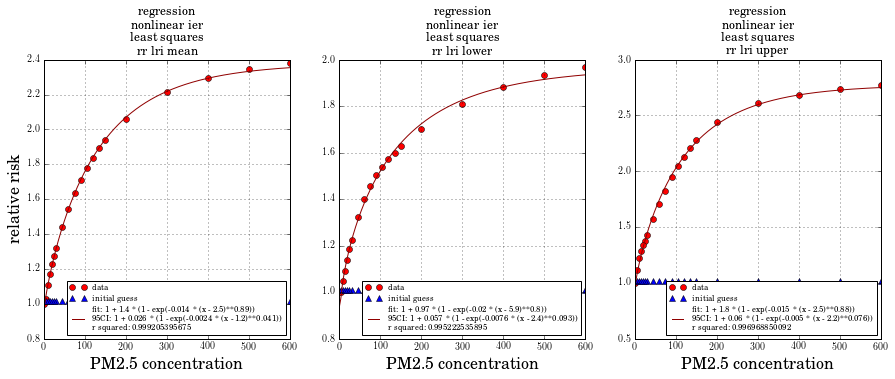

In [1383]:
# regression_nonlinear_ier

pm25 = df_gbd2017_lri['pm25'].values
pm25_0p1 = np.linspace(min(pm25), max(pm25), 6000) # max PM2.5 risk level = 600 ugm-3, at 0.1 ugm-3 spacing = 6000 points

fig1 = plt.figure(1, figsize=(15,5))

rr_lri_mean = df_gbd2017_lri['mean'].values
initialGuess = [np.nanmax(rr_lri_mean)-1, 0.01, 0.01, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_lri_mean, initialGuess,
                      bounds=((np.nanmax(rr_lri_mean)-1.0000000001, -np.inf, -np.inf, lcc_mean-0.0000000001),
                              (np.nanmax(rr_lri_mean)-1, np.inf, np.inf, lcc_mean)))
residuals = rr_lri_mean - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_lri_mean - np.mean(rr_lri_mean))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_lri_mean_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
ax=fig1.add_subplot(1,3,1)
ax.plot(pm25, rr_lri_mean, linestyle='', marker='o', color='r', label="data")
ax.plot(pm25, guess, linestyle='', marker='^', color='b', label="initial guess")
ax.plot(pm25_0p1, rr_lri_mean_0p1, linestyle='-', color='#900000', label="fit: 1 + {0:0.2g} * (1 - exp(-{1:0.2g} * (x - {3:0.2g})**{2:0.2g}))".format(*popt) + "\n95CI: 1 + {0:0.2g} * (1 - exp(-{1:0.2g} * (x - {3:0.2g})**{2:0.2g}))".format(*p_two_sd) + "\nr squared: " + str(r_squared))
ax.set_ylabel("relative risk")
ax.set_xlabel("PM2.5 concentration")
ax.legend(loc='bottom right', fontsize=8)
ax.grid()
ax.set_title("regression\nnonlinear ier\nleast squares\nrr lri mean")

rr_lri_lower = df_gbd2017_lri['lower'].values
initialGuess = [np.nanmax(rr_lri_lower)-1, 0.01, 0.01, lcc_lower] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_lri_lower, initialGuess,
                      bounds=((np.nanmax(rr_lri_lower)-1.0000000001, -np.inf, -np.inf, lcc_lower-0.0000000001),
                              (np.nanmax(rr_lri_lower)-1, np.inf, np.inf, lcc_lower)))
residuals = rr_lri_lower - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_lri_lower - np.mean(rr_lri_lower))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_lri_lower_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
ax=fig1.add_subplot(1,3,2)
ax.plot(pm25, rr_lri_lower, linestyle='', marker='o', color='r', label="data")
ax.plot(pm25, guess, linestyle='', marker='^', color='b', label="initial guess")
ax.plot(pm25_0p1, rr_lri_lower_0p1, linestyle='-', color='#900000', label="fit: 1 + {0:0.2g} * (1 - exp(-{1:0.2g} * (x - {3:0.2g})**{2:0.2g}))".format(*popt) + "\n95CI: 1 + {0:0.2g} * (1 - exp(-{1:0.2g} * (x - {3:0.2g})**{2:0.2g}))".format(*p_two_sd) + "\nr squared: " + str(r_squared))
ax.set_xlabel("PM2.5 concentration")
ax.legend(loc='bottom right', fontsize=8)
ax.grid()
ax.set_title("regression\nnonlinear ier\nleast squares\nrr lri lower")

rr_lri_upper = df_gbd2017_lri['upper'].values
initialGuess = [np.nanmax(rr_lri_upper)-1, 0.01, 0.01, lcc_upper] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_lri_upper, initialGuess,
                      bounds=((np.nanmax(rr_lri_upper)-1.0000000001, -np.inf, -np.inf, lcc_upper-0.0000000001),
                              (np.nanmax(rr_lri_upper)-1, np.inf, np.inf, lcc_upper)))
residuals = rr_lri_upper - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_lri_upper - np.mean(rr_lri_upper))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_lri_upper_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
ax=fig1.add_subplot(1,3,3)
ax.plot(pm25, rr_lri_upper, linestyle='', marker='o', color='r', label="data")
ax.plot(pm25, guess, linestyle='', marker='^', color='b', label="initial guess")
ax.plot(pm25_0p1, rr_lri_upper_0p1, linestyle='-', color='#900000', label="fit: 1 + {0:0.2g} * (1 - exp(-{1:0.2g} * (x - {3:0.2g})**{2:0.2g}))".format(*popt) + "\n95CI: 1 + {0:0.2g} * (1 - exp(-{1:0.2g} * (x - {3:0.2g})**{2:0.2g}))".format(*p_two_sd) + "\nr squared: " + str(r_squared))
ax.set_xlabel("PM2.5 concentration")
ax.legend(loc='bottom right', fontsize=8)
ax.grid()
ax.set_title("regression\nnonlinear ier\nleast squares\nrr lri upper")
plt.show()

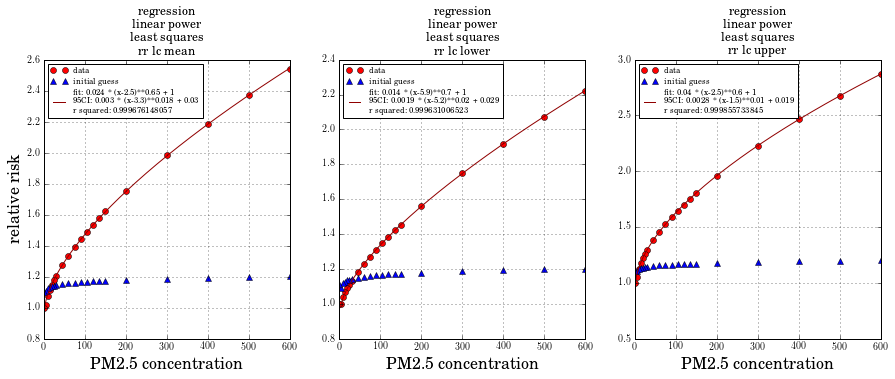

In [1387]:
# regression_linear_x_power

pm25 = df_gbd2017_lc['pm25'].values
pm25_0p1 = np.linspace(min(pm25), max(pm25), 6000) # max PM2.5 risk level = 600 ugm-3, at 0.1 ugm-3 spacing = 6000 points

fig1 = plt.figure(1, figsize=(15,5))

rr_lc_mean = df_gbd2017_lc['mean'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_mean] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_lc_mean, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_mean-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_mean))) # use -np.inf and np.inf to not bound certain parameters
rr_lc_mean_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_lc_mean - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_lc_mean - np.mean(rr_lc_mean))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
ax=fig1.add_subplot(1,3,1)
ax.plot(pm25, rr_lc_mean, linestyle='', marker='o', color='r', label="data")
ax.plot(pm25, guess, linestyle='', marker='^', color='b', label="initial guess")
ax.plot(pm25_0p1, rr_lc_mean_0p1, linestyle='-', color='#900000', label="fit: {0:0.2g} * (x-{3:0.2g})**{1:0.2g} + {2:0.2g}".format(*popt) + "\n95CI: {0:0.2g} * (x-{3:0.2g})**{1:0.2g} + {2:0.2g}".format(*p_two_sd) + "\nr squared: " + str(r_squared))
ax.set_ylabel("relative risk")
ax.set_xlabel("PM2.5 concentration")
ax.grid()
ax.set_title("regression\nlinear power\nleast squares\nrr lc mean")
ax.legend(loc='bottom right', fontsize=8)

rr_lc_lower = df_gbd2017_lc['lower'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_lower] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_lc_lower, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_lower-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_lower))) # use -np.inf and np.inf to not bound certain parameters
rr_lc_lower_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_lc_lower - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_lc_lower - np.mean(rr_lc_lower))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
ax=fig1.add_subplot(1,3,2)
ax.plot(pm25, rr_lc_lower, linestyle='', marker='o', color='r', label="data")
ax.plot(pm25, guess, linestyle='', marker='^', color='b', label="initial guess")
ax.plot(pm25_0p1, rr_lc_lower_0p1, linestyle='-', color='#900000',label="fit: {0:0.2g} * (x-{3:0.2g})**{1:0.2g} + {2:0.2g}".format(*popt) + "\n95CI: {0:0.2g} * (x-{3:0.2g})**{1:0.2g} + {2:0.2g}".format(*p_two_sd) + "\nr squared: " + str(r_squared))
ax.set_xlabel("PM2.5 concentration")
ax.grid()
ax.set_title("regression\nlinear power\nleast squares\nrr lc lower")
ax.legend(loc='bottom right', fontsize=8)

rr_lc_upper = df_gbd2017_lc['upper'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_upper] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_lc_upper, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_upper-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_upper))) # use -np.inf and np.inf to not bound certain parameters
rr_lc_upper_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_lc_upper - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_lc_upper - np.mean(rr_lc_upper))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
ax=fig1.add_subplot(1,3,3)
ax.plot(pm25, rr_lc_upper, linestyle='', marker='o', color='r', label="data")
ax.plot(pm25, guess, linestyle='', marker='^', color='b', label="initial guess")
ax.plot(pm25_0p1, rr_lc_upper_0p1, linestyle='-', color='#900000', label="fit: {0:0.2g} * (x-{3:0.2g})**{1:0.2g} + {2:0.2g}".format(*popt) + "\n95CI: {0:0.2g} * (x-{3:0.2g})**{1:0.2g} + {2:0.2g}".format(*p_two_sd) + "\nr squared: " + str(r_squared))
ax.set_xlabel("PM2.5 concentration")
ax.grid()
ax.set_title("regression\nlinear power\nleast squares\nrr lc upper")
ax.legend(loc='bottom right', fontsize=8)

plt.show()

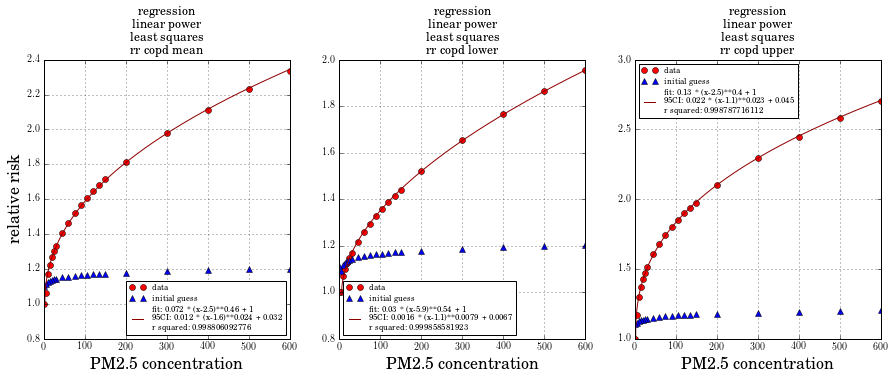

In [1389]:
# regression_linear_x_power

pm25 = df_gbd2017_copd['pm25'].values
pm25_0p1 = np.linspace(min(pm25), max(pm25), 6000) # max PM2.5 risk level = 600 ugm-3, at 0.1 ugm-3 spacing = 6000 points

fig1 = plt.figure(1, figsize=(15,5))

rr_copd_mean = df_gbd2017_copd['mean'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_mean] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_copd_mean, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_mean-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_mean))) # use -np.inf and np.inf to not bound certain parameters
rr_copd_mean_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_copd_mean - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_copd_mean - np.mean(rr_copd_mean))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
ax=fig1.add_subplot(1,3,1)
ax.plot(pm25, rr_copd_mean, linestyle='', marker='o', color='r', label="data")
ax.plot(pm25, guess, linestyle='', marker='^', color='b', label="initial guess")
ax.plot(pm25_0p1, rr_copd_mean_0p1, linestyle='-', color='#900000', label="fit: {0:0.2g} * (x-{3:0.2g})**{1:0.2g} + {2:0.2g}".format(*popt) + "\n95CI: {0:0.2g} * (x-{3:0.2g})**{1:0.2g} + {2:0.2g}".format(*p_two_sd) + "\nr squared: " + str(r_squared))
ax.set_ylabel("relative risk")
ax.set_xlabel("PM2.5 concentration")
ax.grid()
ax.set_title("regression\nlinear power\nleast squares\nrr copd mean")
ax.legend(loc='bottom right', fontsize=8)

rr_copd_lower = df_gbd2017_copd['lower'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_lower] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_copd_lower, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_lower-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_lower))) # use -np.inf and np.inf to not bound certain parameters
rr_copd_lower_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_copd_lower - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_copd_lower - np.mean(rr_copd_lower))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
ax=fig1.add_subplot(1,3,2)
ax.plot(pm25, rr_copd_lower, linestyle='', marker='o', color='r', label="data")
ax.plot(pm25, guess, linestyle='', marker='^', color='b', label="initial guess")
ax.plot(pm25_0p1, rr_copd_lower_0p1, linestyle='-', color='#900000',label="fit: {0:0.2g} * (x-{3:0.2g})**{1:0.2g} + {2:0.2g}".format(*popt) + "\n95CI: {0:0.2g} * (x-{3:0.2g})**{1:0.2g} + {2:0.2g}".format(*p_two_sd) + "\nr squared: " + str(r_squared))
ax.set_xlabel("PM2.5 concentration")
ax.grid()
ax.set_title("regression\nlinear power\nleast squares\nrr copd lower")
ax.legend(loc='bottom right', fontsize=8)

rr_copd_upper = df_gbd2017_copd['upper'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_upper] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_copd_upper, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_upper-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_upper))) # use -np.inf and np.inf to not bound certain parameters
rr_copd_upper_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_copd_upper - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_copd_upper - np.mean(rr_copd_upper))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
ax=fig1.add_subplot(1,3,3)
ax.plot(pm25, rr_copd_upper, linestyle='', marker='o', color='r', label="data")
ax.plot(pm25, guess, linestyle='', marker='^', color='b', label="initial guess")
ax.plot(pm25_0p1, rr_copd_upper_0p1, linestyle='-', color='#900000', label="fit: {0:0.2g} * (x-{3:0.2g})**{1:0.2g} + {2:0.2g}".format(*popt) + "\n95CI: {0:0.2g} * (x-{3:0.2g})**{1:0.2g} + {2:0.2g}".format(*p_two_sd) + "\nr squared: " + str(r_squared))
ax.set_xlabel("PM2.5 concentration")
ax.grid()
ax.set_title("regression\nlinear power\nleast squares\nrr copd upper")
ax.legend(loc='bottom right', fontsize=8)

plt.show()

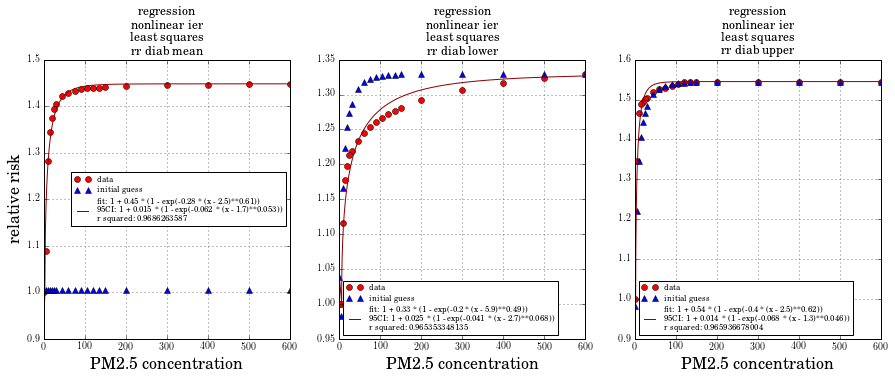

In [1411]:
# regression_nonlinear_ier

pm25 = df_gbd2017_diab['pm25'].values
pm25_0p1 = np.linspace(min(pm25), max(pm25), 6000) # max PM2.5 risk level = 600 ugm-3, at 0.1 ugm-3 spacing = 6000 points

fig1 = plt.figure(1, figsize=(15,5))

rr_diab_mean = df_gbd2017_diab['mean'].values
initialGuess = [np.nanmax(rr_diab_mean)-1, 0.01, 0.01, lcc_mean] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_diab_mean, initialGuess,
                      bounds=((np.nanmax(rr_diab_mean)-1.0000000001, -np.inf, -np.inf, lcc_mean-0.0000000001),
                              (np.nanmax(rr_diab_mean)-1, np.inf, np.inf, lcc_mean)))
residuals = rr_diab_mean - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_diab_mean - np.mean(rr_diab_mean))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_diab_mean_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
ax=fig1.add_subplot(1,3,1)
ax.plot(pm25, rr_diab_mean, linestyle='', marker='o', color='r', label="data")
ax.plot(pm25, guess, linestyle='', marker='^', color='b', label="initial guess")
ax.plot(pm25_0p1, rr_diab_mean_0p1, linestyle='-', color='#900000', label="fit: 1 + {0:0.2g} * (1 - exp(-{1:0.2g} * (x - {3:0.2g})**{2:0.2g}))".format(*popt) + "\n95CI: 1 + {0:0.2g} * (1 - exp(-{1:0.2g} * (x - {3:0.2g})**{2:0.2g}))".format(*p_two_sd) + "\nr squared: " + str(r_squared))
ax.set_ylabel("relative risk")
ax.set_xlabel("PM2.5 concentration")
ax.legend(loc='bottom right', fontsize=8)
ax.grid()
ax.set_title("regression\nnonlinear ier\nleast squares\nrr diab mean")

rr_diab_lower = df_gbd2017_diab['lower'].values
initialGuess = [np.nanmax(rr_diab_lower)-1, 0.3, 0.6, lcc_lower] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_diab_lower, initialGuess, 
                      bounds=((np.nanmax(rr_diab_lower)-1.0000000001, 0.2, 0.4, lcc_lower-0.0000000001),
                              (np.nanmax(rr_diab_lower)-1, 0.4, 0.8, lcc_lower)))
residuals = rr_diab_lower - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_diab_lower - np.mean(rr_diab_lower))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_diab_lower_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
ax=fig1.add_subplot(1,3,2)
ax.plot(pm25, rr_diab_lower, linestyle='', marker='o', color='r', label="data")
ax.plot(pm25, guess, linestyle='', marker='^', color='b', label="initial guess")
ax.plot(pm25_0p1, rr_diab_lower_0p1, linestyle='-', color='#900000', label="fit: 1 + {0:0.2g} * (1 - exp(-{1:0.2g} * (x - {3:0.2g})**{2:0.2g}))".format(*popt) + "\n95CI: 1 + {0:0.2g} * (1 - exp(-{1:0.2g} * (x - {3:0.2g})**{2:0.2g}))".format(*p_two_sd) + "\nr squared: " + str(r_squared))
ax.set_xlabel("PM2.5 concentration")
ax.legend(loc='bottom right', fontsize=8)
ax.grid()
ax.set_title("regression\nnonlinear ier\nleast squares\nrr diab lower")

rr_diab_upper = df_gbd2017_diab['upper'].values
initialGuess = [np.nanmax(rr_diab_upper)-1, 0.3, 0.6, lcc_upper] # this has to be in between bounds
guess = [regression_nonlinear_ier(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_ier, pm25, rr_diab_upper, initialGuess, 
                      bounds=((np.nanmax(rr_diab_upper)-1.0000000001, 0.2, 0.4, lcc_upper-0.0000000001),
                              (np.nanmax(rr_diab_upper)-1, 0.4, 0.8, lcc_upper)))
residuals = rr_diab_upper - regression_nonlinear_ier(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_diab_upper - np.mean(rr_diab_upper))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_diab_upper_0p1 = [regression_nonlinear_ier(x, *popt) for x in pm25_0p1]
ax=fig1.add_subplot(1,3,3)
ax.plot(pm25, rr_diab_upper, linestyle='', marker='o', color='r', label="data")
ax.plot(pm25, guess, linestyle='', marker='^', color='b', label="initial guess")
ax.plot(pm25_0p1, rr_diab_upper_0p1, linestyle='-', color='#900000', label="fit: 1 + {0:0.2g} * (1 - exp(-{1:0.2g} * (x - {3:0.2g})**{2:0.2g}))".format(*popt) + "\n95CI: 1 + {0:0.2g} * (1 - exp(-{1:0.2g} * (x - {3:0.2g})**{2:0.2g}))".format(*p_two_sd) + "\nr squared: " + str(r_squared))
ax.set_xlabel("PM2.5 concentration")
ax.legend(loc='bottom right', fontsize=8)
ax.grid()
ax.set_title("regression\nnonlinear ier\nleast squares\nrr diab upper")
plt.show()

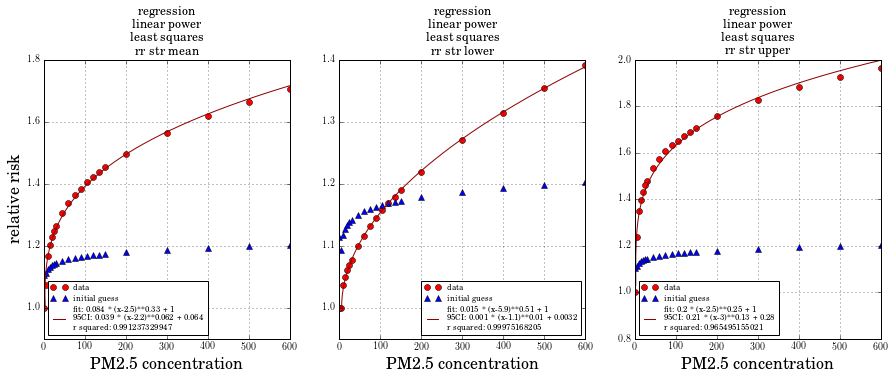

In [1420]:
# regression_linear_x_power

pm25 = df_gbd2017_str['pm25'].values
pm25_0p1 = np.linspace(min(pm25), max(pm25), 6000) # max PM2.5 risk level = 600 ugm-3, at 0.1 ugm-3 spacing = 6000 points

rr_str_mean_25_29 = df_gbd2017_str['mean_25_29'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_mean] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_str_mean_25_29, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_mean-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_mean))) # use -np.inf and np.inf to not bound certain parameters
rr_str_mean_25_29_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_str_mean_25_29 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_mean_25_29 - np.mean(rr_str_mean_25_29))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_str_lower_25_29 = df_gbd2017_str['lower_25_29'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_lower] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_str_lower_25_29, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_lower-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_lower))) # use -np.inf and np.inf to not bound certain parameters
rr_str_lower_25_29_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_str_lower_25_29 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_lower_25_29 - np.mean(rr_str_lower_25_29))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_str_upper_25_29 = df_gbd2017_str['upper_25_29'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_upper] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_str_upper_25_29, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_upper-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_upper))) # use -np.inf and np.inf to not bound certain parameters
rr_str_upper_25_29_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_str_upper_25_29 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_upper_25_29 - np.mean(rr_str_upper_25_29))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval


rr_str_mean_30_34 = df_gbd2017_str['mean_30_34'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_mean] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_str_mean_30_34, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_mean-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_mean))) # use -np.inf and np.inf to not bound certain parameters
rr_str_mean_30_34_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_str_mean_30_34 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_mean_30_34 - np.mean(rr_str_mean_30_34))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_str_lower_30_34 = df_gbd2017_str['lower_30_34'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_lower] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_str_lower_30_34, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_lower-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_lower))) # use -np.inf and np.inf to not bound certain parameters
rr_str_lower_30_34_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_str_lower_30_34 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_lower_30_34 - np.mean(rr_str_lower_30_34))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_str_upper_30_34 = df_gbd2017_str['upper_30_34'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_upper] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_str_upper_30_34, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_upper-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_upper))) # use -np.inf and np.inf to not bound certain parameters
rr_str_upper_30_34_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_str_upper_30_34 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_upper_30_34 - np.mean(rr_str_upper_30_34))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_str_mean_35_39 = df_gbd2017_str['mean_35_39'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_mean] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_str_mean_35_39, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_mean-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_mean))) # use -np.inf and np.inf to not bound certain parameters
rr_str_mean_35_39_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_str_mean_35_39 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_mean_35_39 - np.mean(rr_str_mean_35_39))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_str_lower_35_39 = df_gbd2017_str['lower_35_39'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_lower] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_str_lower_35_39, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_lower-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_lower))) # use -np.inf and np.inf to not bound certain parameters
rr_str_lower_35_39_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_str_lower_35_39 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_lower_35_39 - np.mean(rr_str_lower_35_39))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_str_upper_35_39 = df_gbd2017_str['upper_35_39'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_upper] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_str_upper_35_39, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_upper-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_upper))) # use -np.inf and np.inf to not bound certain parameters
rr_str_upper_35_39_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_str_upper_35_39 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_upper_35_39 - np.mean(rr_str_upper_35_39))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_str_mean_40_44 = df_gbd2017_str['mean_40_44'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_mean] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_str_mean_40_44, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_mean-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_mean))) # use -np.inf and np.inf to not bound certain parameters
rr_str_mean_40_44_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_str_mean_40_44 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_mean_40_44 - np.mean(rr_str_mean_40_44))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_str_lower_40_44 = df_gbd2017_str['lower_40_44'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_lower] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_str_lower_40_44, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_lower-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_lower))) # use -np.inf and np.inf to not bound certain parameters
rr_str_lower_40_44_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_str_lower_40_44 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_lower_40_44 - np.mean(rr_str_lower_40_44))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_str_upper_40_44 = df_gbd2017_str['upper_40_44'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_upper] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_str_upper_40_44, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_upper-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_upper))) # use -np.inf and np.inf to not bound certain parameters
rr_str_upper_40_44_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_str_upper_40_44 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_upper_40_44 - np.mean(rr_str_upper_40_44))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_str_mean_45_49 = df_gbd2017_str['mean_45_49'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_mean] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_str_mean_45_49, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_mean-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_mean))) # use -np.inf and np.inf to not bound certain parameters
rr_str_mean_45_49_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_str_mean_45_49 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_mean_45_49 - np.mean(rr_str_mean_45_49))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_str_lower_45_49 = df_gbd2017_str['lower_45_49'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_lower] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_str_lower_45_49, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_lower-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_lower))) # use -np.inf and np.inf to not bound certain parameters
rr_str_lower_45_49_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_str_lower_45_49 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_lower_45_49 - np.mean(rr_str_lower_45_49))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_str_upper_45_49 = df_gbd2017_str['upper_45_49'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_upper] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_str_upper_45_49, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_upper-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_upper))) # use -np.inf and np.inf to not bound certain parameters
rr_str_upper_45_49_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_str_upper_45_49 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_upper_45_49 - np.mean(rr_str_upper_45_49))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_str_mean_50_54 = df_gbd2017_str['mean_50_54'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_mean] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_str_mean_50_54, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_mean-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_mean))) # use -np.inf and np.inf to not bound certain parameters
rr_str_mean_50_54_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_str_mean_50_54 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_mean_50_54 - np.mean(rr_str_mean_50_54))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_str_lower_50_54 = df_gbd2017_str['lower_50_54'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_lower] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_str_lower_50_54, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_lower-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_lower))) # use -np.inf and np.inf to not bound certain parameters
rr_str_lower_50_54_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_str_lower_50_54 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_lower_50_54 - np.mean(rr_str_lower_50_54))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_str_upper_50_54 = df_gbd2017_str['upper_50_54'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_upper] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_str_upper_50_54, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_upper-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_upper))) # use -np.inf and np.inf to not bound certain parameters
rr_str_upper_50_54_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_str_upper_50_54 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_upper_50_54 - np.mean(rr_str_upper_50_54))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_str_mean_55_59 = df_gbd2017_str['mean_55_59'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_mean] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_str_mean_55_59, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_mean-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_mean))) # use -np.inf and np.inf to not bound certain parameters
rr_str_mean_55_59_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_str_mean_55_59 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_mean_55_59 - np.mean(rr_str_mean_55_59))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_str_lower_55_59 = df_gbd2017_str['lower_55_59'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_lower] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_str_lower_55_59, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_lower-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_lower))) # use -np.inf and np.inf to not bound certain parameters
rr_str_lower_55_59_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_str_lower_55_59 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_lower_55_59 - np.mean(rr_str_lower_55_59))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_str_upper_55_59 = df_gbd2017_str['upper_55_59'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_upper] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_str_upper_55_59, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_upper-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_upper))) # use -np.inf and np.inf to not bound certain parameters
rr_str_upper_55_59_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_str_upper_55_59 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_upper_55_59 - np.mean(rr_str_upper_55_59))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_str_mean_60_64 = df_gbd2017_str['mean_60_64'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_mean] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_str_mean_60_64, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_mean-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_mean))) # use -np.inf and np.inf to not bound certain parameters
rr_str_mean_60_64_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_str_mean_60_64 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_mean_60_64 - np.mean(rr_str_mean_60_64))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_str_lower_60_64 = df_gbd2017_str['lower_60_64'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_lower] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_str_lower_60_64, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_lower-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_lower))) # use -np.inf and np.inf to not bound certain parameters
rr_str_lower_60_64_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_str_lower_60_64 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_lower_60_64 - np.mean(rr_str_lower_60_64))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_str_upper_60_64 = df_gbd2017_str['upper_60_64'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_upper] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_str_upper_60_64, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_upper-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_upper))) # use -np.inf and np.inf to not bound certain parameters
rr_str_upper_60_64_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_str_upper_60_64 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_upper_60_64 - np.mean(rr_str_upper_60_64))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_str_mean_65_69 = df_gbd2017_str['mean_65_69'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_mean] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_str_mean_65_69, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_mean-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_mean))) # use -np.inf and np.inf to not bound certain parameters
rr_str_mean_65_69_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_str_mean_65_69 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_mean_65_69 - np.mean(rr_str_mean_65_69))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_str_lower_65_69 = df_gbd2017_str['lower_65_69'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_lower] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_str_lower_65_69, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_lower-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_lower))) # use -np.inf and np.inf to not bound certain parameters
rr_str_lower_65_69_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_str_lower_65_69 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_lower_65_69 - np.mean(rr_str_lower_65_69))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_str_upper_65_69 = df_gbd2017_str['upper_65_69'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_upper] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_str_upper_65_69, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_upper-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_upper))) # use -np.inf and np.inf to not bound certain parameters
rr_str_upper_65_69_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_str_upper_65_69 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_upper_65_69 - np.mean(rr_str_upper_65_69))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_str_mean_70_74 = df_gbd2017_str['mean_70_74'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_mean] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_str_mean_70_74, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_mean-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_mean))) # use -np.inf and np.inf to not bound certain parameters
rr_str_mean_70_74_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_str_mean_70_74 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_mean_70_74 - np.mean(rr_str_mean_70_74))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_str_lower_70_74 = df_gbd2017_str['lower_70_74'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_lower] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_str_lower_70_74, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_lower-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_lower))) # use -np.inf and np.inf to not bound certain parameters
rr_str_lower_70_74_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_str_lower_70_74 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_lower_70_74 - np.mean(rr_str_lower_70_74))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_str_upper_70_74 = df_gbd2017_str['upper_70_74'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_upper] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_str_upper_70_74, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_upper-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_upper))) # use -np.inf and np.inf to not bound certain parameters
rr_str_upper_70_74_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_str_upper_70_74 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_upper_70_74 - np.mean(rr_str_upper_70_74))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_str_mean_75_79 = df_gbd2017_str['mean_75_79'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_mean] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_str_mean_75_79, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_mean-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_mean))) # use -np.inf and np.inf to not bound certain parameters
rr_str_mean_75_79_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_str_mean_75_79 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_mean_75_79 - np.mean(rr_str_mean_75_79))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_str_lower_75_79 = df_gbd2017_str['lower_75_79'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_lower] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_str_lower_75_79, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_lower-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_lower))) # use -np.inf and np.inf to not bound certain parameters
rr_str_lower_75_79_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_str_lower_75_79 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_lower_75_79 - np.mean(rr_str_lower_75_79))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_str_upper_75_79 = df_gbd2017_str['upper_75_79'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_upper] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_str_upper_75_79, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_upper-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_upper))) # use -np.inf and np.inf to not bound certain parameters
rr_str_upper_75_79_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_str_upper_75_79 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_upper_75_79 - np.mean(rr_str_upper_75_79))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_str_mean_80_84 = df_gbd2017_str['mean_80_84'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_mean] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_str_mean_80_84, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_mean-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_mean))) # use -np.inf and np.inf to not bound certain parameters
rr_str_mean_80_84_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_str_mean_80_84 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_mean_80_84 - np.mean(rr_str_mean_80_84))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_str_lower_80_84 = df_gbd2017_str['lower_80_84'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_lower] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_str_lower_80_84, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_lower-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_lower))) # use -np.inf and np.inf to not bound certain parameters
rr_str_lower_80_84_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_str_lower_80_84 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_lower_80_84 - np.mean(rr_str_lower_80_84))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_str_upper_80_84 = df_gbd2017_str['upper_80_84'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_upper] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_str_upper_80_84, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_upper-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_upper))) # use -np.inf and np.inf to not bound certain parameters
rr_str_upper_80_84_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_str_upper_80_84 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_upper_80_84 - np.mean(rr_str_upper_80_84))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_str_mean_85_89 = df_gbd2017_str['mean_85_89'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_mean] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_str_mean_85_89, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_mean-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_mean))) # use -np.inf and np.inf to not bound certain parameters
rr_str_mean_85_89_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_str_mean_85_89 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_mean_85_89 - np.mean(rr_str_mean_85_89))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_str_lower_85_89 = df_gbd2017_str['lower_85_89'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_lower] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_str_lower_85_89, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_lower-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_lower))) # use -np.inf and np.inf to not bound certain parameters
rr_str_lower_85_89_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_str_lower_85_89 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_lower_85_89 - np.mean(rr_str_lower_85_89))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_str_upper_85_89 = df_gbd2017_str['upper_85_89'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_upper] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_str_upper_85_89, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_upper-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_upper))) # use -np.inf and np.inf to not bound certain parameters
rr_str_upper_85_89_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_str_upper_85_89 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_upper_85_89 - np.mean(rr_str_upper_85_89))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_str_mean_90_94 = df_gbd2017_str['mean_90_94'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_mean] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_str_mean_90_94, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_mean-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_mean))) # use -np.inf and np.inf to not bound certain parameters
rr_str_mean_90_94_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_str_mean_90_94 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_mean_90_94 - np.mean(rr_str_mean_90_94))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_str_lower_90_94 = df_gbd2017_str['lower_90_94'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_lower] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_str_lower_90_94, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_lower-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_lower))) # use -np.inf and np.inf to not bound certain parameters
rr_str_lower_90_94_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_str_lower_90_94 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_lower_90_94 - np.mean(rr_str_lower_90_94))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_str_upper_90_94 = df_gbd2017_str['upper_90_94'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_upper] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_str_upper_90_94, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_upper-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_upper))) # use -np.inf and np.inf to not bound certain parameters
rr_str_upper_90_94_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_str_upper_90_94 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_upper_90_94 - np.mean(rr_str_upper_90_94))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_str_mean_95up = df_gbd2017_str['mean_95up'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_mean] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_str_mean_95up, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_mean-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_mean))) # use -np.inf and np.inf to not bound certain parameters
rr_str_mean_95up_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_str_mean_95up - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_mean_95up - np.mean(rr_str_mean_95up))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_str_lower_95up = df_gbd2017_str['lower_95up'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_lower] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_str_lower_95up, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_lower-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_lower))) # use -np.inf and np.inf to not bound certain parameters
rr_str_lower_95up_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_str_lower_95up - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_lower_95up - np.mean(rr_str_lower_95up))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_str_upper_95up = df_gbd2017_str['upper_95up'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_upper] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_str_upper_95up, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_upper-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_upper))) # use -np.inf and np.inf to not bound certain parameters
rr_str_upper_95up_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_str_upper_95up - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_upper_95up - np.mean(rr_str_upper_95up))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

# plot version for 25_29

fig1 = plt.figure(1, figsize=(15,5))

rr_str_mean_25_29 = df_gbd2017_str['mean_25_29'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_mean] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_str_mean_25_29, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_mean-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_mean))) # use -np.inf and np.inf to not bound certain parameters
rr_str_mean_25_29_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_str_mean_25_29 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_mean_25_29 - np.mean(rr_str_mean_25_29))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
ax=fig1.add_subplot(1,3,1)
ax.plot(pm25, rr_str_mean_25_29, linestyle='', marker='o', color='r', label="data")
ax.plot(pm25, guess, linestyle='', marker='^', color='b', label="initial guess")
ax.plot(pm25_0p1, rr_str_mean_25_29_0p1, linestyle='-', color='#900000', label="fit: {0:0.2g} * (x-{3:0.2g})**{1:0.2g} + {2:0.2g}".format(*popt) + "\n95CI: {0:0.2g} * (x-{3:0.2g})**{1:0.2g} + {2:0.2g}".format(*p_two_sd) + "\nr squared: " + str(r_squared))
ax.set_ylabel("relative risk")
ax.set_xlabel("PM2.5 concentration")
ax.grid()
ax.set_title("regression\nlinear power\nleast squares\nrr str mean")
ax.legend(loc='bottom right', fontsize=8)

rr_str_lower_25_29 = df_gbd2017_str['lower_25_29'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_lower] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_str_lower_25_29, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_lower-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_lower))) # use -np.inf and np.inf to not bound certain parameters
rr_str_lower_25_29_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_str_lower_25_29 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_lower_25_29 - np.mean(rr_str_lower_25_29))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
ax=fig1.add_subplot(1,3,2)
ax.plot(pm25, rr_str_lower_25_29, linestyle='', marker='o', color='r', label="data")
ax.plot(pm25, guess, linestyle='', marker='^', color='b', label="initial guess")
ax.plot(pm25_0p1, rr_str_lower_25_29_0p1, linestyle='-', color='#900000',label="fit: {0:0.2g} * (x-{3:0.2g})**{1:0.2g} + {2:0.2g}".format(*popt) + "\n95CI: {0:0.2g} * (x-{3:0.2g})**{1:0.2g} + {2:0.2g}".format(*p_two_sd) + "\nr squared: " + str(r_squared))
ax.set_xlabel("PM2.5 concentration")
ax.grid()
ax.set_title("regression\nlinear power\nleast squares\nrr str lower")
ax.legend(loc='bottom right', fontsize=8)

rr_str_upper_25_29 = df_gbd2017_str['upper_25_29'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_upper] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_str_upper_25_29, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_upper-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_upper))) # use -np.inf and np.inf to not bound certain parameters
rr_str_upper_25_29_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_str_upper_25_29 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_str_upper_25_29 - np.mean(rr_str_upper_25_29))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
ax=fig1.add_subplot(1,3,3)
ax.plot(pm25, rr_str_upper_25_29, linestyle='', marker='o', color='r', label="data")
ax.plot(pm25, guess, linestyle='', marker='^', color='b', label="initial guess")
ax.plot(pm25_0p1, rr_str_upper_25_29_0p1, linestyle='-', color='#900000', label="fit: {0:0.2g} * (x-{3:0.2g})**{1:0.2g} + {2:0.2g}".format(*popt) + "\n95CI: {0:0.2g} * (x-{3:0.2g})**{1:0.2g} + {2:0.2g}".format(*p_two_sd) + "\nr squared: " + str(r_squared))
ax.set_xlabel("PM2.5 concentration")
ax.grid()
ax.set_title("regression\nlinear power\nleast squares\nrr str upper")
ax.legend(loc='bottom right', fontsize=8)

plt.show()

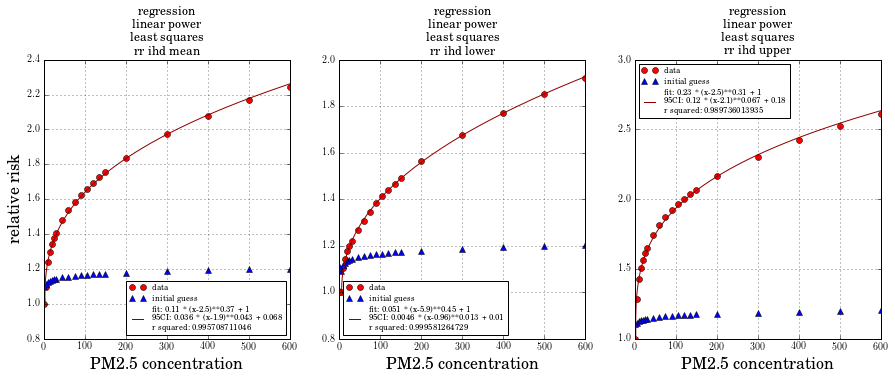

In [1423]:
# regression_linear_x_power

pm25 = df_gbd2017_ihd['pm25'].values
pm25_0p1 = np.linspace(min(pm25), max(pm25), 6000) # max PM2.5 risk level = 600 ugm-3, at 0.1 ugm-3 spacing = 6000 points

rr_ihd_mean_25_29 = df_gbd2017_ihd['mean_25_29'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_mean] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_ihd_mean_25_29, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_mean-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_mean))) # use -np.inf and np.inf to not bound certain parameters
rr_ihd_mean_25_29_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_mean_25_29 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_mean_25_29 - np.mean(rr_ihd_mean_25_29))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_ihd_lower_25_29 = df_gbd2017_ihd['lower_25_29'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_lower] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_ihd_lower_25_29, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_lower-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_lower))) # use -np.inf and np.inf to not bound certain parameters
rr_ihd_lower_25_29_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_lower_25_29 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_lower_25_29 - np.mean(rr_ihd_lower_25_29))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_ihd_upper_25_29 = df_gbd2017_ihd['upper_25_29'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_upper] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_ihd_upper_25_29, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_upper-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_upper))) # use -np.inf and np.inf to not bound certain parameters
rr_ihd_upper_25_29_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_upper_25_29 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_upper_25_29 - np.mean(rr_ihd_upper_25_29))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval


rr_ihd_mean_30_34 = df_gbd2017_ihd['mean_30_34'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_mean] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_ihd_mean_30_34, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_mean-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_mean))) # use -np.inf and np.inf to not bound certain parameters
rr_ihd_mean_30_34_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_mean_30_34 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_mean_30_34 - np.mean(rr_ihd_mean_30_34))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_ihd_lower_30_34 = df_gbd2017_ihd['lower_30_34'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_lower] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_ihd_lower_30_34, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_lower-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_lower))) # use -np.inf and np.inf to not bound certain parameters
rr_ihd_lower_30_34_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_lower_30_34 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_lower_30_34 - np.mean(rr_ihd_lower_30_34))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_ihd_upper_30_34 = df_gbd2017_ihd['upper_30_34'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_upper] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_ihd_upper_30_34, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_upper-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_upper))) # use -np.inf and np.inf to not bound certain parameters
rr_ihd_upper_30_34_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_upper_30_34 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_upper_30_34 - np.mean(rr_ihd_upper_30_34))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_ihd_mean_35_39 = df_gbd2017_ihd['mean_35_39'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_mean] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_ihd_mean_35_39, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_mean-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_mean))) # use -np.inf and np.inf to not bound certain parameters
rr_ihd_mean_35_39_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_mean_35_39 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_mean_35_39 - np.mean(rr_ihd_mean_35_39))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_ihd_lower_35_39 = df_gbd2017_ihd['lower_35_39'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_lower] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_ihd_lower_35_39, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_lower-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_lower))) # use -np.inf and np.inf to not bound certain parameters
rr_ihd_lower_35_39_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_lower_35_39 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_lower_35_39 - np.mean(rr_ihd_lower_35_39))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_ihd_upper_35_39 = df_gbd2017_ihd['upper_35_39'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_upper] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_ihd_upper_35_39, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_upper-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_upper))) # use -np.inf and np.inf to not bound certain parameters
rr_ihd_upper_35_39_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_upper_35_39 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_upper_35_39 - np.mean(rr_ihd_upper_35_39))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_ihd_mean_40_44 = df_gbd2017_ihd['mean_40_44'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_mean] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_ihd_mean_40_44, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_mean-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_mean))) # use -np.inf and np.inf to not bound certain parameters
rr_ihd_mean_40_44_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_mean_40_44 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_mean_40_44 - np.mean(rr_ihd_mean_40_44))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_ihd_lower_40_44 = df_gbd2017_ihd['lower_40_44'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_lower] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_ihd_lower_40_44, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_lower-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_lower))) # use -np.inf and np.inf to not bound certain parameters
rr_ihd_lower_40_44_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_lower_40_44 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_lower_40_44 - np.mean(rr_ihd_lower_40_44))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_ihd_upper_40_44 = df_gbd2017_ihd['upper_40_44'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_upper] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_ihd_upper_40_44, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_upper-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_upper))) # use -np.inf and np.inf to not bound certain parameters
rr_ihd_upper_40_44_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_upper_40_44 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_upper_40_44 - np.mean(rr_ihd_upper_40_44))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_ihd_mean_45_49 = df_gbd2017_ihd['mean_45_49'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_mean] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_ihd_mean_45_49, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_mean-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_mean))) # use -np.inf and np.inf to not bound certain parameters
rr_ihd_mean_45_49_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_mean_45_49 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_mean_45_49 - np.mean(rr_ihd_mean_45_49))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_ihd_lower_45_49 = df_gbd2017_ihd['lower_45_49'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_lower] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_ihd_lower_45_49, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_lower-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_lower))) # use -np.inf and np.inf to not bound certain parameters
rr_ihd_lower_45_49_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_lower_45_49 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_lower_45_49 - np.mean(rr_ihd_lower_45_49))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_ihd_upper_45_49 = df_gbd2017_ihd['upper_45_49'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_upper] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_ihd_upper_45_49, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_upper-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_upper))) # use -np.inf and np.inf to not bound certain parameters
rr_ihd_upper_45_49_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_upper_45_49 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_upper_45_49 - np.mean(rr_ihd_upper_45_49))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_ihd_mean_50_54 = df_gbd2017_ihd['mean_50_54'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_mean] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_ihd_mean_50_54, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_mean-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_mean))) # use -np.inf and np.inf to not bound certain parameters
rr_ihd_mean_50_54_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_mean_50_54 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_mean_50_54 - np.mean(rr_ihd_mean_50_54))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_ihd_lower_50_54 = df_gbd2017_ihd['lower_50_54'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_lower] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_ihd_lower_50_54, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_lower-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_lower))) # use -np.inf and np.inf to not bound certain parameters
rr_ihd_lower_50_54_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_lower_50_54 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_lower_50_54 - np.mean(rr_ihd_lower_50_54))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_ihd_upper_50_54 = df_gbd2017_ihd['upper_50_54'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_upper] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_ihd_upper_50_54, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_upper-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_upper))) # use -np.inf and np.inf to not bound certain parameters
rr_ihd_upper_50_54_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_upper_50_54 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_upper_50_54 - np.mean(rr_ihd_upper_50_54))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_ihd_mean_55_59 = df_gbd2017_ihd['mean_55_59'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_mean] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_ihd_mean_55_59, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_mean-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_mean))) # use -np.inf and np.inf to not bound certain parameters
rr_ihd_mean_55_59_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_mean_55_59 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_mean_55_59 - np.mean(rr_ihd_mean_55_59))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_ihd_lower_55_59 = df_gbd2017_ihd['lower_55_59'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_lower] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_ihd_lower_55_59, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_lower-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_lower))) # use -np.inf and np.inf to not bound certain parameters
rr_ihd_lower_55_59_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_lower_55_59 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_lower_55_59 - np.mean(rr_ihd_lower_55_59))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_ihd_upper_55_59 = df_gbd2017_ihd['upper_55_59'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_upper] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_ihd_upper_55_59, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_upper-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_upper))) # use -np.inf and np.inf to not bound certain parameters
rr_ihd_upper_55_59_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_upper_55_59 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_upper_55_59 - np.mean(rr_ihd_upper_55_59))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_ihd_mean_60_64 = df_gbd2017_ihd['mean_60_64'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_mean] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_ihd_mean_60_64, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_mean-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_mean))) # use -np.inf and np.inf to not bound certain parameters
rr_ihd_mean_60_64_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_mean_60_64 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_mean_60_64 - np.mean(rr_ihd_mean_60_64))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_ihd_lower_60_64 = df_gbd2017_ihd['lower_60_64'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_lower] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_ihd_lower_60_64, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_lower-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_lower))) # use -np.inf and np.inf to not bound certain parameters
rr_ihd_lower_60_64_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_lower_60_64 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_lower_60_64 - np.mean(rr_ihd_lower_60_64))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_ihd_upper_60_64 = df_gbd2017_ihd['upper_60_64'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_upper] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_ihd_upper_60_64, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_upper-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_upper))) # use -np.inf and np.inf to not bound certain parameters
rr_ihd_upper_60_64_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_upper_60_64 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_upper_60_64 - np.mean(rr_ihd_upper_60_64))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_ihd_mean_65_69 = df_gbd2017_ihd['mean_65_69'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_mean] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_ihd_mean_65_69, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_mean-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_mean))) # use -np.inf and np.inf to not bound certain parameters
rr_ihd_mean_65_69_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_mean_65_69 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_mean_65_69 - np.mean(rr_ihd_mean_65_69))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_ihd_lower_65_69 = df_gbd2017_ihd['lower_65_69'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_lower] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_ihd_lower_65_69, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_lower-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_lower))) # use -np.inf and np.inf to not bound certain parameters
rr_ihd_lower_65_69_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_lower_65_69 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_lower_65_69 - np.mean(rr_ihd_lower_65_69))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_ihd_upper_65_69 = df_gbd2017_ihd['upper_65_69'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_upper] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_ihd_upper_65_69, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_upper-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_upper))) # use -np.inf and np.inf to not bound certain parameters
rr_ihd_upper_65_69_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_upper_65_69 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_upper_65_69 - np.mean(rr_ihd_upper_65_69))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_ihd_mean_70_74 = df_gbd2017_ihd['mean_70_74'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_mean] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_ihd_mean_70_74, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_mean-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_mean))) # use -np.inf and np.inf to not bound certain parameters
rr_ihd_mean_70_74_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_mean_70_74 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_mean_70_74 - np.mean(rr_ihd_mean_70_74))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_ihd_lower_70_74 = df_gbd2017_ihd['lower_70_74'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_lower] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_ihd_lower_70_74, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_lower-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_lower))) # use -np.inf and np.inf to not bound certain parameters
rr_ihd_lower_70_74_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_lower_70_74 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_lower_70_74 - np.mean(rr_ihd_lower_70_74))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_ihd_upper_70_74 = df_gbd2017_ihd['upper_70_74'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_upper] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_ihd_upper_70_74, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_upper-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_upper))) # use -np.inf and np.inf to not bound certain parameters
rr_ihd_upper_70_74_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_upper_70_74 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_upper_70_74 - np.mean(rr_ihd_upper_70_74))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_ihd_mean_75_79 = df_gbd2017_ihd['mean_75_79'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_mean] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_ihd_mean_75_79, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_mean-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_mean))) # use -np.inf and np.inf to not bound certain parameters
rr_ihd_mean_75_79_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_mean_75_79 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_mean_75_79 - np.mean(rr_ihd_mean_75_79))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_ihd_lower_75_79 = df_gbd2017_ihd['lower_75_79'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_lower] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_ihd_lower_75_79, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_lower-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_lower))) # use -np.inf and np.inf to not bound certain parameters
rr_ihd_lower_75_79_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_lower_75_79 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_lower_75_79 - np.mean(rr_ihd_lower_75_79))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_ihd_upper_75_79 = df_gbd2017_ihd['upper_75_79'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_upper] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_ihd_upper_75_79, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_upper-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_upper))) # use -np.inf and np.inf to not bound certain parameters
rr_ihd_upper_75_79_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_upper_75_79 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_upper_75_79 - np.mean(rr_ihd_upper_75_79))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_ihd_mean_80_84 = df_gbd2017_ihd['mean_80_84'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_mean] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_ihd_mean_80_84, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_mean-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_mean))) # use -np.inf and np.inf to not bound certain parameters
rr_ihd_mean_80_84_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_mean_80_84 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_mean_80_84 - np.mean(rr_ihd_mean_80_84))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_ihd_lower_80_84 = df_gbd2017_ihd['lower_80_84'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_lower] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_ihd_lower_80_84, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_lower-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_lower))) # use -np.inf and np.inf to not bound certain parameters
rr_ihd_lower_80_84_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_lower_80_84 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_lower_80_84 - np.mean(rr_ihd_lower_80_84))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_ihd_upper_80_84 = df_gbd2017_ihd['upper_80_84'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_upper] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_ihd_upper_80_84, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_upper-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_upper))) # use -np.inf and np.inf to not bound certain parameters
rr_ihd_upper_80_84_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_upper_80_84 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_upper_80_84 - np.mean(rr_ihd_upper_80_84))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_ihd_mean_85_89 = df_gbd2017_ihd['mean_85_89'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_mean] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_ihd_mean_85_89, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_mean-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_mean))) # use -np.inf and np.inf to not bound certain parameters
rr_ihd_mean_85_89_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_mean_85_89 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_mean_85_89 - np.mean(rr_ihd_mean_85_89))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_ihd_lower_85_89 = df_gbd2017_ihd['lower_85_89'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_lower] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_ihd_lower_85_89, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_lower-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_lower))) # use -np.inf and np.inf to not bound certain parameters
rr_ihd_lower_85_89_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_lower_85_89 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_lower_85_89 - np.mean(rr_ihd_lower_85_89))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_ihd_upper_85_89 = df_gbd2017_ihd['upper_85_89'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_upper] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_ihd_upper_85_89, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_upper-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_upper))) # use -np.inf and np.inf to not bound certain parameters
rr_ihd_upper_85_89_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_upper_85_89 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_upper_85_89 - np.mean(rr_ihd_upper_85_89))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_ihd_mean_90_94 = df_gbd2017_ihd['mean_90_94'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_mean] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_ihd_mean_90_94, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_mean-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_mean))) # use -np.inf and np.inf to not bound certain parameters
rr_ihd_mean_90_94_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_mean_90_94 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_mean_90_94 - np.mean(rr_ihd_mean_90_94))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_ihd_lower_90_94 = df_gbd2017_ihd['lower_90_94'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_lower] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_ihd_lower_90_94, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_lower-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_lower))) # use -np.inf and np.inf to not bound certain parameters
rr_ihd_lower_90_94_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_lower_90_94 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_lower_90_94 - np.mean(rr_ihd_lower_90_94))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_ihd_upper_90_94 = df_gbd2017_ihd['upper_90_94'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_upper] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_ihd_upper_90_94, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_upper-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_upper))) # use -np.inf and np.inf to not bound certain parameters
rr_ihd_upper_90_94_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_upper_90_94 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_upper_90_94 - np.mean(rr_ihd_upper_90_94))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

rr_ihd_mean_95up = df_gbd2017_ihd['mean_95up'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_mean] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_ihd_mean_95up, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_mean-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_mean))) # use -np.inf and np.inf to not bound certain parameters
rr_ihd_mean_95up_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_mean_95up - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_mean_95up - np.mean(rr_ihd_mean_95up))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_ihd_lower_95up = df_gbd2017_ihd['lower_95up'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_lower] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_ihd_lower_95up, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_lower-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_lower))) # use -np.inf and np.inf to not bound certain parameters
rr_ihd_lower_95up_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_lower_95up - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_lower_95up - np.mean(rr_ihd_lower_95up))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_ihd_upper_95up = df_gbd2017_ihd['upper_95up'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_upper] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_ihd_upper_95up, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_upper-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_upper))) # use -np.inf and np.inf to not bound certain parameters
rr_ihd_upper_95up_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_upper_95up - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_upper_95up - np.mean(rr_ihd_upper_95up))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval

# plot version for 25_29

fig1 = plt.figure(1, figsize=(15,5))

rr_ihd_mean_25_29 = df_gbd2017_ihd['mean_25_29'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_mean] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_ihd_mean_25_29, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_mean-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_mean))) # use -np.inf and np.inf to not bound certain parameters
rr_ihd_mean_25_29_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_mean_25_29 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_mean_25_29 - np.mean(rr_ihd_mean_25_29))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
ax=fig1.add_subplot(1,3,1)
ax.plot(pm25, rr_ihd_mean_25_29, linestyle='', marker='o', color='r', label="data")
ax.plot(pm25, guess, linestyle='', marker='^', color='b', label="initial guess")
ax.plot(pm25_0p1, rr_ihd_mean_25_29_0p1, linestyle='-', color='#900000', label="fit: {0:0.2g} * (x-{3:0.2g})**{1:0.2g} + {2:0.2g}".format(*popt) + "\n95CI: {0:0.2g} * (x-{3:0.2g})**{1:0.2g} + {2:0.2g}".format(*p_two_sd) + "\nr squared: " + str(r_squared))
ax.set_ylabel("relative risk")
ax.set_xlabel("PM2.5 concentration")
ax.grid()
ax.set_title("regression\nlinear power\nleast squares\nrr ihd mean")
ax.legend(loc='bottom right', fontsize=8)

rr_ihd_lower_25_29 = df_gbd2017_ihd['lower_25_29'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_lower] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_ihd_lower_25_29, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_lower-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_lower))) # use -np.inf and np.inf to not bound certain parameters
rr_ihd_lower_25_29_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_lower_25_29 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_lower_25_29 - np.mean(rr_ihd_lower_25_29))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
ax=fig1.add_subplot(1,3,2)
ax.plot(pm25, rr_ihd_lower_25_29, linestyle='', marker='o', color='r', label="data")
ax.plot(pm25, guess, linestyle='', marker='^', color='b', label="initial guess")
ax.plot(pm25_0p1, rr_ihd_lower_25_29_0p1, linestyle='-', color='#900000',label="fit: {0:0.2g} * (x-{3:0.2g})**{1:0.2g} + {2:0.2g}".format(*popt) + "\n95CI: {0:0.2g} * (x-{3:0.2g})**{1:0.2g} + {2:0.2g}".format(*p_two_sd) + "\nr squared: " + str(r_squared))
ax.set_xlabel("PM2.5 concentration")
ax.grid()
ax.set_title("regression\nlinear power\nleast squares\nrr ihd lower")
ax.legend(loc='bottom right', fontsize=8)

rr_ihd_upper_25_29 = df_gbd2017_ihd['upper_25_29'].values
initialGuess = [0.1, 0.11, 1.00000005, lcc_upper] # this has to be in between bounds
guess = [regression_linear_x_power(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_linear_x_power, pm25, rr_ihd_upper_25_29, initialGuess,
                      bounds=((-np.inf, -np.inf, 1.0, lcc_upper-0.0000001),
                              (np.inf, np.inf, 1.0000001, lcc_upper))) # use -np.inf and np.inf to not bound certain parameters
rr_ihd_upper_25_29_0p1 = [regression_linear_x_power(x, *popt) for x in pm25_0p1]
residuals = rr_ihd_upper_25_29 - regression_linear_x_power(pm25, popt[0], popt[1], popt[2], popt[3])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_ihd_upper_25_29 - np.mean(rr_ihd_upper_25_29))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
ax=fig1.add_subplot(1,3,3)
ax.plot(pm25, rr_ihd_upper_25_29, linestyle='', marker='o', color='r', label="data")
ax.plot(pm25, guess, linestyle='', marker='^', color='b', label="initial guess")
ax.plot(pm25_0p1, rr_ihd_upper_25_29_0p1, linestyle='-', color='#900000', label="fit: {0:0.2g} * (x-{3:0.2g})**{1:0.2g} + {2:0.2g}".format(*popt) + "\n95CI: {0:0.2g} * (x-{3:0.2g})**{1:0.2g} + {2:0.2g}".format(*p_two_sd) + "\nr squared: " + str(r_squared))
ax.set_xlabel("PM2.5 concentration")
ax.grid()
ax.set_title("regression\nlinear power\nleast squares\nrr ihd upper")
ax.legend(loc='bottom right', fontsize=8)

plt.show()

In [1435]:
df_ier = pd.concat([pd.DataFrame(np.round(pm25_0p1, 2)),
                    pd.DataFrame(rr_lri_mean_0p1), pd.DataFrame(rr_lri_lower_0p1), pd.DataFrame(rr_lri_upper_0p1), 
                    pd.DataFrame(rr_lc_mean_0p1), pd.DataFrame(rr_lc_lower_0p1), pd.DataFrame(rr_lc_upper_0p1),
                   pd.DataFrame(rr_copd_mean_0p1), pd.DataFrame(rr_copd_lower_0p1), pd.DataFrame(rr_copd_upper_0p1),
                   pd.DataFrame(rr_diab_mean_0p1), pd.DataFrame(rr_diab_lower_0p1), pd.DataFrame(rr_diab_upper_0p1),
                   pd.DataFrame(rr_ihd_mean_25_29_0p1), pd.DataFrame(rr_ihd_lower_25_29_0p1), pd.DataFrame(rr_ihd_upper_25_29_0p1), pd.DataFrame(rr_ihd_mean_30_34_0p1), pd.DataFrame(rr_ihd_lower_30_34_0p1), pd.DataFrame(rr_ihd_upper_30_34_0p1), pd.DataFrame(rr_ihd_mean_35_39_0p1), pd.DataFrame(rr_ihd_lower_35_39_0p1), pd.DataFrame(rr_ihd_upper_35_39_0p1), pd.DataFrame(rr_ihd_mean_40_44_0p1), pd.DataFrame(rr_ihd_lower_40_44_0p1), pd.DataFrame(rr_ihd_upper_40_44_0p1), pd.DataFrame(rr_ihd_mean_45_49_0p1), pd.DataFrame(rr_ihd_lower_45_49_0p1), pd.DataFrame(rr_ihd_upper_45_49_0p1), pd.DataFrame(rr_ihd_mean_50_54_0p1), pd.DataFrame(rr_ihd_lower_50_54_0p1), pd.DataFrame(rr_ihd_upper_50_54_0p1), pd.DataFrame(rr_ihd_mean_55_59_0p1), pd.DataFrame(rr_ihd_lower_55_59_0p1), pd.DataFrame(rr_ihd_upper_55_59_0p1), pd.DataFrame(rr_ihd_mean_60_64_0p1), pd.DataFrame(rr_ihd_lower_60_64_0p1), pd.DataFrame(rr_ihd_upper_60_64_0p1), pd.DataFrame(rr_ihd_mean_65_69_0p1), pd.DataFrame(rr_ihd_lower_65_69_0p1), pd.DataFrame(rr_ihd_upper_65_69_0p1), pd.DataFrame(rr_ihd_mean_70_74_0p1), pd.DataFrame(rr_ihd_lower_70_74_0p1), pd.DataFrame(rr_ihd_upper_70_74_0p1), pd.DataFrame(rr_ihd_mean_75_79_0p1), pd.DataFrame(rr_ihd_lower_75_79_0p1), pd.DataFrame(rr_ihd_upper_75_79_0p1), pd.DataFrame(rr_ihd_mean_80_84_0p1), pd.DataFrame(rr_ihd_lower_80_84_0p1), pd.DataFrame(rr_ihd_upper_80_84_0p1), pd.DataFrame(rr_ihd_mean_85_89_0p1), pd.DataFrame(rr_ihd_lower_85_89_0p1), pd.DataFrame(rr_ihd_upper_85_89_0p1), pd.DataFrame(rr_ihd_mean_90_94_0p1), pd.DataFrame(rr_ihd_lower_90_94_0p1), pd.DataFrame(rr_ihd_upper_90_94_0p1), pd.DataFrame(rr_ihd_mean_95up_0p1), pd.DataFrame(rr_ihd_lower_95up_0p1), pd.DataFrame(rr_ihd_upper_95up_0p1),
                   pd.DataFrame(rr_str_mean_25_29_0p1), pd.DataFrame(rr_str_lower_25_29_0p1), pd.DataFrame(rr_str_upper_25_29_0p1), pd.DataFrame(rr_str_mean_30_34_0p1), pd.DataFrame(rr_str_lower_30_34_0p1), pd.DataFrame(rr_str_upper_30_34_0p1), pd.DataFrame(rr_str_mean_35_39_0p1), pd.DataFrame(rr_str_lower_35_39_0p1), pd.DataFrame(rr_str_upper_35_39_0p1), pd.DataFrame(rr_str_mean_40_44_0p1), pd.DataFrame(rr_str_lower_40_44_0p1), pd.DataFrame(rr_str_upper_40_44_0p1), pd.DataFrame(rr_str_mean_45_49_0p1), pd.DataFrame(rr_str_lower_45_49_0p1), pd.DataFrame(rr_str_upper_45_49_0p1), pd.DataFrame(rr_str_mean_50_54_0p1), pd.DataFrame(rr_str_lower_50_54_0p1), pd.DataFrame(rr_str_upper_50_54_0p1), pd.DataFrame(rr_str_mean_55_59_0p1), pd.DataFrame(rr_str_lower_55_59_0p1), pd.DataFrame(rr_str_upper_55_59_0p1), pd.DataFrame(rr_str_mean_60_64_0p1), pd.DataFrame(rr_str_lower_60_64_0p1), pd.DataFrame(rr_str_upper_60_64_0p1), pd.DataFrame(rr_str_mean_65_69_0p1), pd.DataFrame(rr_str_lower_65_69_0p1), pd.DataFrame(rr_str_upper_65_69_0p1), pd.DataFrame(rr_str_mean_70_74_0p1), pd.DataFrame(rr_str_lower_70_74_0p1), pd.DataFrame(rr_str_upper_70_74_0p1), pd.DataFrame(rr_str_mean_75_79_0p1), pd.DataFrame(rr_str_lower_75_79_0p1), pd.DataFrame(rr_str_upper_75_79_0p1), pd.DataFrame(rr_str_mean_80_84_0p1), pd.DataFrame(rr_str_lower_80_84_0p1), pd.DataFrame(rr_str_upper_80_84_0p1), pd.DataFrame(rr_str_mean_85_89_0p1), pd.DataFrame(rr_str_lower_85_89_0p1), pd.DataFrame(rr_str_upper_85_89_0p1), pd.DataFrame(rr_str_mean_90_94_0p1), pd.DataFrame(rr_str_lower_90_94_0p1), pd.DataFrame(rr_str_upper_90_94_0p1), pd.DataFrame(rr_str_mean_95up_0p1), pd.DataFrame(rr_str_lower_95up_0p1), pd.DataFrame(rr_str_upper_95up_0p1)],
                   axis=1)
df_ier.columns = ['pm25',
                  'rr_lri_mean', 'rr_lri_lower', 'rr_lri_upper',
                  'rr_lc_mean', 'rr_lc_lower', 'rr_lc_upper',
                  'rr_copd_mean', 'rr_copd_lower', 'rr_copd_upper',
                  'rr_diab_mean', 'rr_diab_lower', 'rr_diab_upper',
                  'rr_ihd_mean_25_29', 'rr_ihd_lower_25_29', 'rr_ihd_upper_25_29', 'rr_ihd_mean_30_34', 'rr_ihd_lower_30_34', 'rr_ihd_upper_30_34', 'rr_ihd_mean_35_39', 'rr_ihd_lower_35_39', 'rr_ihd_upper_35_39', 'rr_ihd_mean_40_44', 'rr_ihd_lower_40_44', 'rr_ihd_upper_40_44', 'rr_ihd_mean_45_49', 'rr_ihd_lower_45_49', 'rr_ihd_upper_45_49', 'rr_ihd_mean_50_54', 'rr_ihd_lower_50_54', 'rr_ihd_upper_50_54', 'rr_ihd_mean_55_59', 'rr_ihd_lower_55_59', 'rr_ihd_upper_55_59', 'rr_ihd_mean_60_64', 'rr_ihd_lower_60_64', 'rr_ihd_upper_60_64', 'rr_ihd_mean_65_69', 'rr_ihd_lower_65_69', 'rr_ihd_upper_65_69', 'rr_ihd_mean_70_74', 'rr_ihd_lower_70_74', 'rr_ihd_upper_70_74', 'rr_ihd_mean_75_79', 'rr_ihd_lower_75_79', 'rr_ihd_upper_75_79', 'rr_ihd_mean_80_84', 'rr_ihd_lower_80_84', 'rr_ihd_upper_80_84', 'rr_ihd_mean_85_89', 'rr_ihd_lower_85_89', 'rr_ihd_upper_85_89', 'rr_ihd_mean_90_94', 'rr_ihd_lower_90_94', 'rr_ihd_upper_90_94', 'rr_ihd_mean_95up', 'rr_ihd_lower_95up', 'rr_ihd_upper_95up',
                  'rr_str_mean_25_29', 'rr_str_lower_25_29', 'rr_str_upper_25_29', 'rr_str_mean_30_34', 'rr_str_lower_30_34', 'rr_str_upper_30_34', 'rr_str_mean_35_39', 'rr_str_lower_35_39', 'rr_str_upper_35_39', 'rr_str_mean_40_44', 'rr_str_lower_40_44', 'rr_str_upper_40_44', 'rr_str_mean_45_49', 'rr_str_lower_45_49', 'rr_str_upper_45_49', 'rr_str_mean_50_54', 'rr_str_lower_50_54', 'rr_str_upper_50_54', 'rr_str_mean_55_59', 'rr_str_lower_55_59', 'rr_str_upper_55_59', 'rr_str_mean_60_64', 'rr_str_lower_60_64', 'rr_str_upper_60_64', 'rr_str_mean_65_69', 'rr_str_lower_65_69', 'rr_str_upper_65_69', 'rr_str_mean_70_74', 'rr_str_lower_70_74', 'rr_str_upper_70_74', 'rr_str_mean_75_79', 'rr_str_lower_75_79', 'rr_str_upper_75_79', 'rr_str_mean_80_84', 'rr_str_lower_80_84', 'rr_str_upper_80_84', 'rr_str_mean_85_89', 'rr_str_lower_85_89', 'rr_str_upper_85_89', 'rr_str_mean_90_94', 'rr_str_lower_90_94', 'rr_str_upper_90_94', 'rr_str_mean_95up', 'rr_str_lower_95up', 'rr_str_upper_95up']
# for copd/ihd/str the regression values between 0-2.4 and 0-5.8 increase again so need to set back to 1.0
df_ier.loc[0:24] = 1.0 # replace first 25 rows with risk of 1.0 - for mean and upper
df_ier.loc[0:58, df_ier.columns.str.contains('lower')] = 1.0 # replace first 58 rows with risk of 1.0 - for lower
df_ier = df_ier.astype('float') # reset to floats
df_ier['pm25'] = pd.DataFrame(np.round(pm25_0p1, 2)) # replace the pm2.5 values below 1
#df_ier[0:61]
df_ier

,pm25,rr_lri_mean,rr_lri_lower,rr_lri_upper,rr_lc_mean,rr_lc_lower,rr_lc_upper,rr_copd_mean,rr_copd_lower,rr_copd_upper,...,rr_str_upper_80_84,rr_str_mean_85_89,rr_str_lower_85_89,rr_str_upper_85_89,rr_str_mean_90_94,rr_str_lower_90_94,rr_str_upper_90_94,rr_str_mean_95up,rr_str_lower_95up,rr_str_upper_95up
0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,0.2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,0.3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,0.4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
5,0.5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
6,0.6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
7,0.7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
8,0.8,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
9,0.9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1436]:
df_ier.to_csv('/nfs/a68/earlacoa/health/GBD2017/GBD2017_PM2.5_IER.csv')

In [ ]:
plt.figure(1, figsize=(8,8))
plt.subplot(1,1,1)
ax = plt.gca()
ax.set_facecolor('whitesmoke')
plt.xlabel('Ambient PM$_{2.5}$ concentration $({\mu}g$ $m^{-3})$', fontsize=16)
plt.ylabel('Relative risk', fontsize=16)
ax.set_xlim((0.0, 211.0))
ax.set_ylim((1.0, 2.1))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot(rr_gbd2017_conc, rr_gbd2017_copd_mean, color='#8c510a', label='GBD2016 COPD', linewidth=2)
plt.plot(rr_gbd2017_conc, rr_gbd2017_lc_mean, color='#01665e', label='GBD2016 LC', linewidth=2)
plt.plot(rr_gbd2017_conc, rr_gbd2017_lri_mean, color='#762a83', label='GBD2016 LRI', linewidth=2)
plt.plot(rr_gbd2017_conc, rr_gbd2017_ihd_mean_25_29, color='#1b7837', label='GBD2016 IHD', linewidth=2, linestyle='--')
plt.plot(rr_gbd2017_conc, rr_gbd2017_str_mean_25_29, color='#b2182b', label='GBD2016 STR', linewidth=2, linestyle='--')
plt.plot(rr_gbd2017_conc, rr_gbd2017_ihd_mean_95up, color='#1b7837', label='GBD2016 IHD', linewidth=2, linestyle='-.')
plt.plot(rr_gbd2017_conc, rr_gbd2017_str_mean_95up, color='#b2182b', label='GBD2016 STR', linewidth=2, linestyle='-.')
plt.fill_between(rr_gbd2017_conc, rr_gbd2017_ihd_mean_25_29, rr_gbd2017_ihd_mean_95up, alpha=.3, facecolor='#1b7837')
plt.fill_between(rr_gbd2017_conc, rr_gbd2017_str_mean_25_29, rr_gbd2017_str_mean_95up, alpha=.3, facecolor='#b2182b')
plt.plot(rr_gbd2017_conc, rr_gbd2017_diab_mean, color='#0c2c84', label='GBD2016 DIAB', linewidth=2)
gbd2017_leg_copd = mlines.Line2D([], [], color='#8c510a', marker='_', markeredgewidth=0, markersize=5, label='COPD', linewidth=2)
gbd2017_leg_lc = mlines.Line2D([], [], color='#01665e', marker='_', markeredgewidth=0, markersize=5, label='LC', linewidth=2)
gbd2017_leg_lri = mlines.Line2D([], [], color='#762a83', marker='_', markeredgewidth=0, markersize=5, label='LRI', linewidth=2)
gbd2017_leg_ihd_25_29 = mlines.Line2D([], [], color='#1b7837', marker='_', markeredgewidth=0, markersize=5, label='IHD 25-29', linewidth=2, linestyle='--')
gbd2017_leg_str_25_29 = mlines.Line2D([], [], color='#b2182b', marker='_', markeredgewidth=0, markersize=5, label='STR 25-29', linewidth=2, linestyle='--')
gbd2017_leg_ihd_95up = mlines.Line2D([], [], color='#1b7837', marker='_', markeredgewidth=0, markersize=5, label='IHD 95up', linewidth=2, linestyle='-.')
gbd2017_leg_str_95up = mlines.Line2D([], [], color='#b2182b', marker='_', markeredgewidth=0, markersize=5, label='STR 95up', linewidth=2, linestyle='-.')
gbd2017_leg_diab = mlines.Line2D([], [], color='#0c2c84', marker='_', markeredgewidth=0, markersize=5, label='DIAB', linewidth=2)
plt.legend(fontsize=12, fancybox=True, loc='upper center', bbox_to_anchor=(0.12, 1.01), ncol=1, frameon=False,
           handles=[gbd2017_leg_copd, gbd2017_leg_lc, gbd2017_leg_lri, gbd2017_leg_ihd_25_29, gbd2017_leg_str_25_29, gbd2017_leg_ihd_95up, gbd2017_leg_str_95up, gbd2017_leg_diab])
plt.savefig('/nfs/a68/earlacoa/png/gbd2017_risks.png', dpi=700, alpha=True, bbox_inches='tight')
plt.show()

### GEMM

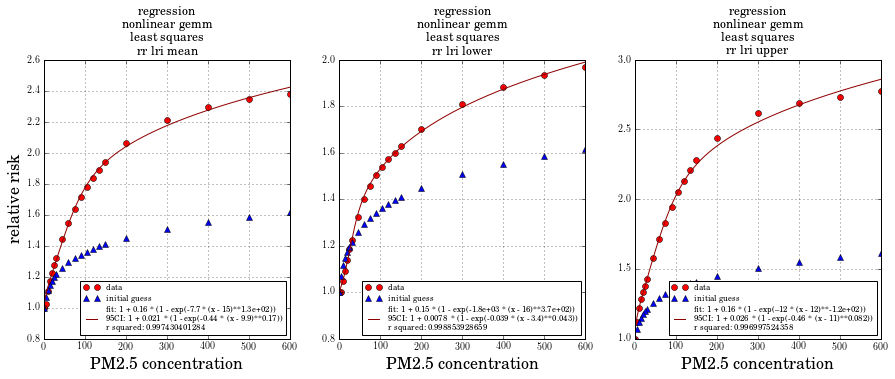

In [1384]:
# regression_nonlinear_gemm

pm25 = df_gbd2017_lri['pm25'].values
pm25_0p1 = np.linspace(min(pm25), max(pm25), 6000) # max PM2.5 risk level = 600 ugm-3, at 0.1 ugm-3 spacing = 6000 points

fig1 = plt.figure(1, figsize=(15,5))

rr_lri_mean = df_gbd2017_lri['mean'].values
initialGuess = [0.1, 0.1, 0.1, 0.1, 0.3, 5.0, 5.0] # this has to be in between bounds
guess = [regression_nonlinear_gemm(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_gemm, pm25, rr_lri_mean, initialGuess,
                      bounds=((-np.inf, -np.inf, -np.inf, -np.inf, 0.1, 0.0, 1.0),
                              (np.inf, np.inf, np.inf, np.inf, 0.6, 600.0, 9.0)))
residuals = rr_lri_mean - regression_nonlinear_gemm(pm25, popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], popt[6])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_lri_mean - np.mean(rr_lri_mean))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_lri_mean_0p1 = [regression_nonlinear_gemm(x, *popt) for x in pm25_0p1]
ax=fig1.add_subplot(1,3,1)
ax.plot(pm25, rr_lri_mean, linestyle='', marker='o', color='r', label="data")
ax.plot(pm25, guess, linestyle='', marker='^', color='b', label="initial guess")
ax.plot(pm25_0p1, rr_lri_mean_0p1, linestyle='-', color='#900000', label="fit: 1 + {0:0.2g} * (1 - exp(-{1:0.2g} * (x - {3:0.2g})**{2:0.2g}))".format(*popt) + "\n95CI: 1 + {0:0.2g} * (1 - exp(-{1:0.2g} * (x - {3:0.2g})**{2:0.2g}))".format(*p_two_sd) + "\nr squared: " + str(r_squared))
ax.set_ylabel("relative risk")
ax.set_xlabel("PM2.5 concentration")
ax.legend(loc='bottom right', fontsize=8)
ax.grid()
ax.set_title("regression\nnonlinear gemm\nleast squares\nrr lri mean")

rr_lri_lower = df_gbd2017_lri['lower'].values
initialGuess = [0.1, 0.1, 0.1, 0.1, 0.3, 5.0, 5.0] # this has to be in between bounds
guess = [regression_nonlinear_gemm(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_gemm, pm25, rr_lri_lower, initialGuess,
                      bounds=((-np.inf, -np.inf, -np.inf, -np.inf, 0.1, 0.0, 1.0),
                              (np.inf, np.inf, np.inf, np.inf, 0.6, 600.0, 9.0)))
residuals = rr_lri_lower - regression_nonlinear_gemm(pm25, popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], popt[6])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_lri_lower - np.mean(rr_lri_lower))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_lri_lower_0p1 = [regression_nonlinear_gemm(x, *popt) for x in pm25_0p1]
ax=fig1.add_subplot(1,3,2)
ax.plot(pm25, rr_lri_lower, linestyle='', marker='o', color='r', label="data")
ax.plot(pm25, guess, linestyle='', marker='^', color='b', label="initial guess")
ax.plot(pm25_0p1, rr_lri_lower_0p1, linestyle='-', color='#900000', label="fit: 1 + {0:0.2g} * (1 - exp(-{1:0.2g} * (x - {3:0.2g})**{2:0.2g}))".format(*popt) + "\n95CI: 1 + {0:0.2g} * (1 - exp(-{1:0.2g} * (x - {3:0.2g})**{2:0.2g}))".format(*p_two_sd) + "\nr squared: " + str(r_squared))
ax.set_xlabel("PM2.5 concentration")
ax.legend(loc='bottom right', fontsize=8)
ax.grid()
ax.set_title("regression\nnonlinear gemm\nleast squares\nrr lri lower")

rr_lri_upper = df_gbd2017_lri['upper'].values
initialGuess = [0.1, 0.1, 0.1, 0.1, 0.3, 5.0, 5.0] # this has to be in between bounds
guess = [regression_nonlinear_gemm(x,*initialGuess) for x in pm25]
popt,pcov = curve_fit(regression_nonlinear_gemm, pm25, rr_lri_upper, initialGuess,
                      bounds=((-np.inf, -np.inf, -np.inf, -np.inf, 0.1, 0.0, 1.0),
                              (np.inf, np.inf, np.inf, np.inf, 0.6, 600.0, 9.0)))
residuals = rr_lri_upper - regression_nonlinear_gemm(pm25, popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], popt[6])
ss_res = np.sum(residuals**2)
ss_tot = np.sum((rr_lri_upper - np.mean(rr_lri_upper))**2)
r_squared = 1 - (ss_res / ss_tot)
perr = np.sqrt(np.diag(pcov)) # one standard deviation error
p_two_sd = 1.96 * perr # 95% confidence interval
rr_lri_upper_0p1 = [regression_nonlinear_gemm(x, *popt) for x in pm25_0p1]
ax=fig1.add_subplot(1,3,3)
ax.plot(pm25, rr_lri_upper, linestyle='', marker='o', color='r', label="data")
ax.plot(pm25, guess, linestyle='', marker='^', color='b', label="initial guess")
ax.plot(pm25_0p1, rr_lri_upper_0p1, linestyle='-', color='#900000', label="fit: 1 + {0:0.2g} * (1 - exp(-{1:0.2g} * (x - {3:0.2g})**{2:0.2g}))".format(*popt) + "\n95CI: 1 + {0:0.2g} * (1 - exp(-{1:0.2g} * (x - {3:0.2g})**{2:0.2g}))".format(*p_two_sd) + "\nr squared: " + str(r_squared))
ax.set_xlabel("PM2.5 concentration")
ax.legend(loc='bottom right', fontsize=8)
ax.grid()
ax.set_title("regression\nnonlinear gemm\nleast squares\nrr lri upper")
plt.show()

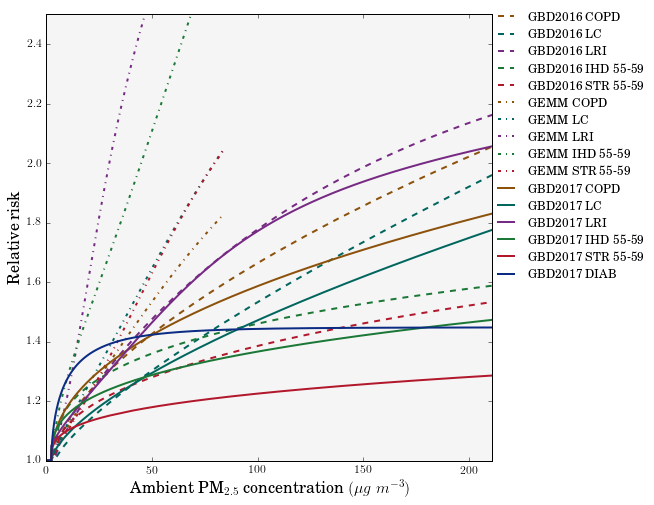

In [1454]:
plt.figure(1, figsize=(8,8))
plt.subplot(1,1,1)
ax = plt.gca()
ax.set_facecolor('whitesmoke')
plt.xlabel('Ambient PM$_{2.5}$ concentration $({\mu}g$ $m^{-3})$', fontsize=16)
plt.ylabel('Relative risk', fontsize=16)
ax.set_xlim((0.0, 211.0))
ax.set_ylim((1.0, 2.5))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot(rr_gbd2016_conc, rr_gbd2016_copd, color='#8c510a', label='GBD2016 COPD', linestyle='--', linewidth=2)
plt.plot(rr_gbd2016_conc, rr_gbd2016_lc, color='#01665e', label='GBD2016 LC', linestyle='--', linewidth=2)
plt.plot(rr_gbd2016_conc, rr_gbd2016_lri, color='#762a83', label='GBD2016 LRI', linestyle='--', linewidth=2)
plt.plot(rr_gbd2016_conc, rr_gbd2016_ihd_55_59, color='#1b7837', label='GBD2016 IHD', linestyle='--', linewidth=2)
plt.plot(rr_gbd2016_conc, rr_gbd2016_str_55_59, color='#b2182b', label='GBD2016 STR', linestyle='--', linewidth=2)
plt.plot(rr_gemm_conc, rr_gemm_copd_mean, color='#8c510a', label='GEMM COPD', linestyle='-.', linewidth=2)
plt.plot(rr_gemm_conc, rr_gemm_lc_mean, color='#01665e', label='GEMM LC', linestyle='-.', linewidth=2)
plt.plot(rr_gemm_conc, rr_gemm_lri_mean, color='#762a83', label='GEMM LRI', linestyle='-.', linewidth=2)
plt.plot(rr_gemm_conc, rr_gemm_ihd_mean_55_59, color='#1b7837', label='GEMM IHD', linestyle='-.', linewidth=2)
plt.plot(rr_gemm_conc, rr_gemm_str_mean_55_59, color='#b2182b', label='GEMM STR', linestyle='-.', linewidth=2)
plt.plot(rr_gbd2017_conc, rr_gbd2017_copd_mean, color='#8c510a', label='GBD2016 COPD', linewidth=2)
plt.plot(rr_gbd2017_conc, rr_gbd2017_lc_mean, color='#01665e', label='GBD2016 LC', linewidth=2)
plt.plot(rr_gbd2017_conc, rr_gbd2017_lri_mean, color='#762a83', label='GBD2016 LRI', linewidth=2)
plt.plot(rr_gbd2017_conc, rr_gbd2017_ihd_mean_55_59, color='#1b7837', label='GBD2016 IHD', linewidth=2)
plt.plot(rr_gbd2017_conc, rr_gbd2017_str_mean_55_59, color='#b2182b', label='GBD2016 STR', linewidth=2)
plt.plot(rr_gbd2017_conc, rr_gbd2017_diab_mean, color='#0c2c84', label='GBD2016 DIAB', linewidth=2)
gbd2016_leg_copd = mlines.Line2D([], [], color='#8c510a', linestyle='--', markeredgewidth=0, markersize=5, label='GBD2016 COPD', linewidth=2)
gbd2016_leg_lc = mlines.Line2D([], [], color='#01665e', linestyle='--', markeredgewidth=0, markersize=5, label='GBD2016 LC', linewidth=2)
gbd2016_leg_lri = mlines.Line2D([], [], color='#762a83', linestyle='--', markeredgewidth=0, markersize=5, label='GBD2016 LRI', linewidth=2)
gbd2016_leg_ihd = mlines.Line2D([], [], color='#1b7837', linestyle='--', markeredgewidth=0, markersize=5, label='GBD2016 IHD 55-59', linewidth=2)
gbd2016_leg_str = mlines.Line2D([], [], color='#b2182b', linestyle='--', markeredgewidth=0, markersize=5, label='GBD2016 STR 55-59', linewidth=2)
gemm_leg_copd = mlines.Line2D([], [], color='#8c510a', linestyle='-.', markeredgewidth=0, markersize=5, label='GEMM COPD', linewidth=2)
gemm_leg_lc = mlines.Line2D([], [], color='#01665e', linestyle='-.', markeredgewidth=0, markersize=5, label='GEMM LC', linewidth=2)
gemm_leg_lri = mlines.Line2D([], [], color='#762a83', linestyle='-.', markeredgewidth=0, markersize=5, label='GEMM LRI', linewidth=2)
gemm_leg_ihd = mlines.Line2D([], [], color='#1b7837', linestyle='-.', markeredgewidth=0, markersize=5, label='GEMM IHD 55-59', linewidth=2)
gemm_leg_str = mlines.Line2D([], [], color='#b2182b', linestyle='-.', markeredgewidth=0, markersize=5, label='GEMM STR 55-59', linewidth=2)
gbd2017_leg_copd = mlines.Line2D([], [], color='#8c510a', marker='_', markeredgewidth=0, markersize=5, label='GBD2017 COPD', linewidth=2)
gbd2017_leg_lc = mlines.Line2D([], [], color='#01665e', marker='_', markeredgewidth=0, markersize=5, label='GBD2017 LC', linewidth=2)
gbd2017_leg_lri = mlines.Line2D([], [], color='#762a83', marker='_', markeredgewidth=0, markersize=5, label='GBD2017 LRI', linewidth=2)
gbd2017_leg_ihd = mlines.Line2D([], [], color='#1b7837', marker='_', markeredgewidth=0, markersize=5, label='GBD2017 IHD 55-59', linewidth=2)
gbd2017_leg_str = mlines.Line2D([], [], color='#b2182b', marker='_', markeredgewidth=0, markersize=5, label='GBD2017 STR 55-59', linewidth=2)
gbd2017_leg_diab = mlines.Line2D([], [], color='#0c2c84', marker='_', markeredgewidth=0, markersize=5, label='GBD2017 DIAB', linewidth=2)
plt.legend(fontsize=12, fancybox=True, loc='upper center', bbox_to_anchor=(1.17, 1.03), ncol=1, frameon=False,
           handles=[gbd2016_leg_copd, gbd2016_leg_lc, gbd2016_leg_lri, gbd2016_leg_ihd, gbd2016_leg_str, gemm_leg_copd, gemm_leg_lc, gemm_leg_lri, gemm_leg_ihd, gemm_leg_str, gbd2017_leg_copd, gbd2017_leg_lc, gbd2017_leg_lri, gbd2017_leg_ihd, gbd2017_leg_str, gbd2017_leg_diab])
plt.savefig('/nfs/a68/earlacoa/png/compare_gbd2017_gbd2016_gemm.png', dpi=700, alpha=True, bbox_inches='tight')
plt.show()